# Prepare

## Import

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm
from copy import deepcopy

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
# sys.path.append('C:\\_Lib\\python\\multimode')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, get_current_filename, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
import json
import os
# path = os.getcwd()
# path = r'H:\Shared drives\SLab\Multimode\experiment\250812_qsim' # for data 
path = r'D:\experiments\251031_qsim' # for data 

print("path: ", path)

path:  D:\experiments\251031_qsim


## Setup experiment hardware

In [3]:
expt_path=os.path.join(path, 'data')

print('Data will be stored in', expt_path)

Data will be stored in D:\experiments\251031_qsim\data


In [4]:
curr_path = os.getcwd()
# config_file = curr_path+'\\configs\\config_rfsoc_ziqian.yml'
config_file = curr_path+'\\configs\\hardware_config_202505.yml'
config_path = config_file
print('Config will be', config_path)

exp_param_file = curr_path+'\\configs\\experiment_config.yml'
exp_param_path = exp_param_file
print('Exp Param will be', exp_param_path)

Config will be c:\_Lib\python\multimode_expts\configs\hardware_config_202505.yml
Exp Param will be c:\_Lib\python\multimode_expts\configs\experiment_config.yml


In [5]:
qubit_i = 0
import yaml
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

In [6]:
im = InstrumentManager(ns_address='192.168.137.25') # SLAC lab

In [7]:
im.keys()

dict_keys(['Pyro.NameServer', 'Qick101'])

In [8]:
print(im['Qick101'])

<Pyro4.core.Proxy at 0x261a820b9d0; not connected; for PYRO:obj_4f066ceea3d046a5a61680e4000e77ed@192.168.137.101:42039>


In [9]:
soc = QickConfig(im[yaml_cfg['aliases']['soc']].get_cfg())
print(soc)

QICK running on ZCU216, software version 0.2.291

Firmware configuration (built Tue Oct 15 12:06:51 2024):

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	7 signal generator channels:
	0:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 0 is 0_230, on JHC3
	1:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 1 is 1_230, on JHC4
	2:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 2 is 2_230, on JHC3
	3:	axis_signal_gen_v6 - envelope memory 32768 samples (5.128 us)
		fs=6389.760 MHz, fabric=399.360 MHz, 32-bit DDS, range=6389.760 MHz
		DAC tile 2, blk 3 is 3_230, on JHC4
	4:	axis_signal_gen_v6 - envelope memory 32768 samples (4.762 us)
		fs=6881.280 MHz, fabric=430.080 MH

## Choose experiment name

In [10]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
# if expts_path not in sys.path:
sys.path.insert(0, expts_path)
print('Path added at highest priority')

# Verify the path is added
print(sys.path)

# Import the experiments module from multimode
import experiments as meas

# Verify the module is imported from the correct path
print(meas.__file__)

Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\Pythonwin', '/home/xilinx/jupyter_notebooks/', 'C:\\_Lib\\pytho

In [11]:
from multimode_expts.experiments.qsim.qsim_base import QsimBaseExperiment


importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qsim
imported experiments.qsim.deprecated
imported experiments.qsim.floquet_chevron
imported experiments.qsim.floquet_offdiag_phasecal
imported experiments.qsim.kerr
imported experiments.qsim.qsim_base
imported experiments.qsim.sideband_amp_rabi
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_scramble
imported experiments.qsim.sideband_stark
imported experiments.qsim.utils
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_c

## Datset for Sidebands

In [12]:
from dataset import *
from dataset import FloquetStorageSwapDataset
import os 

file_path = os.path.join(expts_path, 'floquet_storage_swap_dataset.csv')
# print(os.makedirs(file_path, exist_ok=True))
ds = FloquetStorageSwapDataset(file_path)

ds_thisrun = FloquetStorageSwapDataset(ds.create_copy())
ds_thisrun_file_path = os.path.join(expts_path, ds_thisrun.filename)
ds_thisrun.df

Creating a copy of the dataset at path: floquet_storage_swap_dataset_copy.csv


stor_name  pi_frac   freq (MHz)  gain (DAC units)  len (mus)  \
0     M1-S1       12   348.712413              1006   0.302298   
1     M1-S2       12   519.951968              1341   0.310000   
2     M1-S3       12   696.041673              1157   0.310000   
3     M1-S4       12   873.467193              3026   0.250550   
4     M1-S5       12  1052.583825              2371   0.459513   
5     M1-S6       12  1244.545889              4458   0.339900   
6     M1-S7       12  1422.094111              3151   0.604046   

   ramp_sigma (mus)  phase_from_M1-S1 (deg)  phase_from_M1-S2 (deg)  \
0          0.005008                0.000000                0.739681   
1          0.005008               -1.064086                0.000000   
2          0.005008                1.375704                4.560000   
3          0.005008                0.000000                0.000000   
4          0.005008                0.000000                0.000000   
5          0.005008                0.000000                0.000000   
6          0.005008                0.000000                0.600000   

   phase_from_M1-S3 (deg)  phase_from_M1-S4 (deg)  phase_from_M1-S5 (deg)  \
0               -0.732612                     0.0                     0.0   
1               -3.810000                     0.0                     0.0   
2                0.000000                     0.0                     0.0   
3                0.000000                     0.0                     0.0   
4                0.000000                     0.0                     0.0   
5                0.000000                     0.0                     0.0   
6               -3.020000                     0.0                     0.0   

   phase_from_M1-S6 (deg)  phase_from_M1-S7 (deg)                 last_update  
0                     0.0                    0.00  2025-09-01 16:01:42.932357  
1                     0.0                  -13.26  2025-09-03 12:48:03.624911  
2                     0.0                    7.64  2025-09-03 12:48:03.627903  
3                     0.0                    0.00  2025-08-21 13:30:48.136503  
4                     0.0                    0.00  2025-08-21 13:30:48.146499  
5                     0.0                    0.00  2025-08-21 13:30:48.156493  
6                     0.0                    0.00  2025-09-03 12:48:03.630894

In [13]:
file_path = os.path.join(expts_path, 'man1_storage_swap_dataset.csv')
# print(os.makedirs(file_path, exist_ok=True))
ds_storage = StorageManSwapDataset(file_path)
ds_storage.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   352.928894              NaN   2.019972    1.009986   
1      M1-S2   524.781973              NaN   2.016207    1.008103   
2      M1-S3   700.932974              NaN   1.757421    0.878711   
3      M1-S4   880.891197              NaN   1.516301    0.758151   
4      M1-S5  1057.198793              NaN   2.364360    1.182180   
5      M1-S6  1248.854297              NaN   1.896487    0.948244   
6      M1-S7  1427.043431              NaN   3.338041    1.669020   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  2013.517719              NaN   0.583585    0.286350   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D1  2373.600000             0.01  10.000000    0.000000   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   973.230000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               3320  2025-11-21 13:26:22.903271  
1               4214  2025-11-21 13:30:25.241298  
2               4809  2025-11-21 13:20:19.382565  
3               9146  2025-11-21 13:34:27.818351  
4               7674  2025-11-21 13:38:30.825784  
5              13584  2025-11-21 13:42:33.085310  
6               9397  2025-11-21 13:46:37.284773  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12              8000  2025-11-11 11:20:08.346767  
13             15000  2025-04-30 11:22:11.432806  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              4000  2025-10-28 16:37:57.400701  
23              8000  2025-01-23 17:22:53.776061  
24              1000  2025-01-20 09:34:00.029234  
25             15000  2025-01-20 09:52:35.311227

In [14]:
ds_thisrun.get_columns()

['stor_name',
 'pi_frac',
 'freq (MHz)',
 'gain (DAC units)',
 'len (mus)',
 'ramp_sigma (mus)',
 'phase_from_M1-S1 (deg)',
 'phase_from_M1-S2 (deg)',
 'phase_from_M1-S3 (deg)',
 'phase_from_M1-S4 (deg)',
 'phase_from_M1-S5 (deg)',
 'phase_from_M1-S6 (deg)',
 'phase_from_M1-S7 (deg)',
 'last_update']

In [15]:
# # Initializing this run dataset to some guess values based on standard storage pulses

# for s in range(1, 8, 1):
#     stor_name = f'M1-S{s}'
#     pi_frac = 12
#     freq = ds_storage.get_freq(f'M1-S{s}')
#     gain = ds_storage.get_gain(f'M1-S{s}') / 3
#     length = ds_storage.get_h_pi(f'M1-S{s}') / 2
#     ramp_sigma = soc.cycles2us(2, gen_ch=1)
#     ds_thisrun.update_freq(stor_name, freq)
#     ds_thisrun.update_pi_frac(stor_name, pi_frac)
#     ds_thisrun.update_gain(stor_name, gain)
#     ds_thisrun.update_len(stor_name, length)
#     ds_thisrun.update_ramp_sigma(stor_name, ramp_sigma)

# # Save dataset to file
# ds.df = ds_thisrun.df.copy()
# ds.save_to_file(ds.filename)

In [16]:
# file_path_old = os.path.join(expts_path, 'floquet_storage_swap_dataset_backup.csv')
# # print(os.makedirs(file_path, exist_ok=True))
# ds_backup = floquet_storage_swap_dataset(file_path_old)
# ds_backup.df

In [17]:
# # Initializing this run dataset to some values from another csv with different columns

# for s in range(1, 8, 1):
#     stor_name = f'M1-S{s}'
#     for col in ds_thisrun.df.columns:
#         if col in ds_backup.df.columns:
#             ds_thisrun.df[col] = ds_backup.df[col].copy()
#     # ds_thisrun.update_all(stor_name, pi_frac, freq, gain, length, ramp_sigma, stark_shift) 
# ds_thisrun.df
# # Save dataset to file
# ds.df = ds_thisrun.df.copy()
# ds.save_to_file(ds.filename)

In [18]:
config_thisrun = AttrDict(deepcopy(yaml_cfg))
config_thisrun.device.storage.floquet_man_stor_file = ds_thisrun_file_path

In [19]:
from MM_dual_rail_base import MM_dual_rail_base
def get_floquet_parameters(ds_thisrun, config_thisrun, man_mode_no, stor_mode_no):
    """
    Get pulse parameters for a given storage mode. 
    Also returns prepulse and postpulse (single photon prep and meas for ge meas)

    Args:
        ds_thisrun: Dataset object for managing frequency data.
        config_thisrun: Configuration dictionary for the current run.
        man_mode_no: Manipulation mode number.
        stor_mode_no: Storage mode number.

    Returns:
        A tuple containing freq, gain, ch, prepulse, and postpulse.
    """
    stor_name = 'M' + str(man_mode_no) + '-S' + str(stor_mode_no)
    freq = ds_thisrun.get_freq(stor_name)
    gain = ds_thisrun.get_gain(stor_name)
    length = ds_thisrun.get_len(stor_name)
    pi_frac = ds_thisrun.get_pi_frac(stor_name)
    ch = 'low' if freq < 1000 else 'high'

    mm_base_dummy = MM_dual_rail_base(config_thisrun, soc)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    postpulse = mm_base_dummy.get_prepulse_creator(prep_man_pi[-1:-3:-1]).pulse.tolist() # for ge meas, only do f0g1 and ef pi

    return freq, gain, length, pi_frac, ch, prepulse, postpulse


# Floquet pulse calibrations

In [54]:
ds_thisrun.import_from_swap_dataset(ds_storage, gain_div=1, pi_div=50)

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or 

## Freq chevron

In [55]:
ds_thisrun.df

stor_name  pi_frac   freq (MHz)  gain (DAC units)  len (mus)  \
0     M1-S1       50   352.928894              3320   0.040399   
1     M1-S2       50   524.781973              4214   0.040324   
2     M1-S3       50   700.932974              4809   0.035148   
3     M1-S4       50   880.891197              9146   0.030326   
4     M1-S5       50  1057.198793              7674   0.047287   
5     M1-S6       50  1248.854297             13584   0.037930   
6     M1-S7       50  1427.043431              9397   0.066761   

   ramp_sigma (mus)  phase_from_M1-S1 (deg)  phase_from_M1-S2 (deg)  \
0          0.005008                0.000000                0.739681   
1          0.005008               -1.064086                0.000000   
2          0.005008                1.375704                4.560000   
3          0.005008                0.000000                0.000000   
4          0.005008                0.000000                0.000000   
5          0.005008                0.000000                0.000000   
6          0.005008                0.000000                0.600000   

   phase_from_M1-S3 (deg)  phase_from_M1-S4 (deg)  phase_from_M1-S5 (deg)  \
0               -0.732612                     0.0                     0.0   
1               -3.810000                     0.0                     0.0   
2                0.000000                     0.0                     0.0   
3                0.000000                     0.0                     0.0   
4                0.000000                     0.0                     0.0   
5                0.000000                     0.0                     0.0   
6               -3.020000                     0.0                     0.0   

   phase_from_M1-S6 (deg)  phase_from_M1-S7 (deg)                 last_update  
0                     0.0                    0.00  2025-11-21 21:23:38.048957  
1                     0.0                  -13.26  2025-11-21 21:23:38.058958  
2                     0.0                    7.64  2025-11-21 21:23:38.067957  
3                     0.0                    0.00  2025-11-21 21:23:38.075957  
4                     0.0                    0.00  2025-11-21 21:23:38.085957  
5                     0.0                    0.00  2025-11-21 21:23:38.095957  
6                     0.0                    0.00  2025-11-21 21:23:38.104956

  0%|          | 0/11 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00002_FloquetChevron_S1.h5


  0%|          | 0/11 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00011_FloquetChevron_S2.h5


  0%|          | 0/11 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00000_FloquetChevron_S3.h5


  0%|          | 0/11 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00003_FloquetChevron_S4.h5


  0%|          | 0/11 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00000_FloquetChevron_S5.h5


  0%|          | 0/11 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00000_FloquetChevron_S6.h5


  0%|          | 0/11 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00006_FloquetChevron_S7.h5


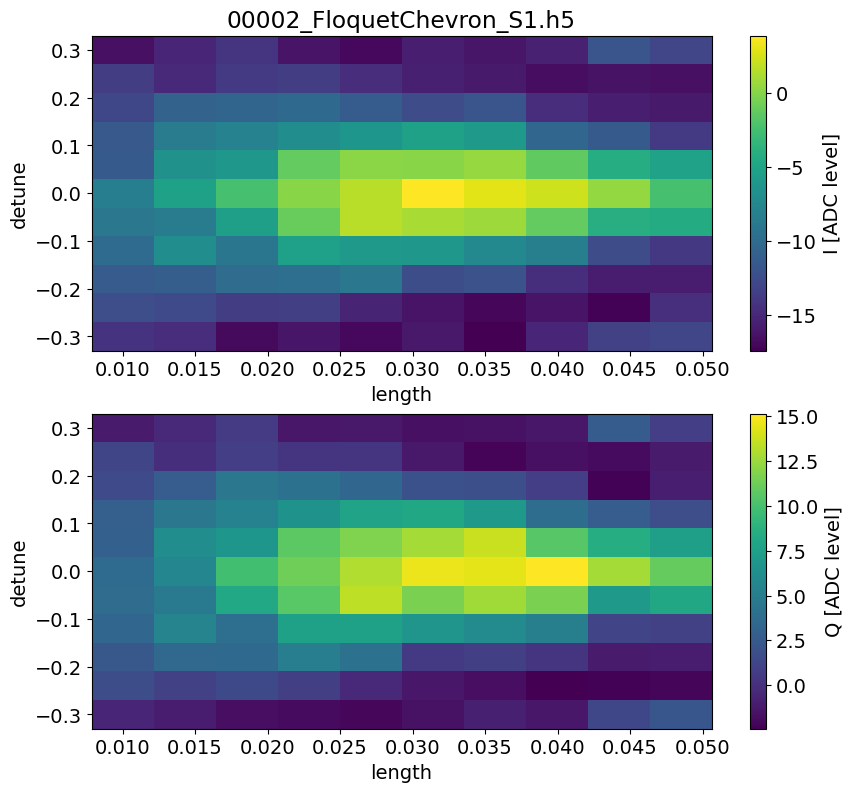

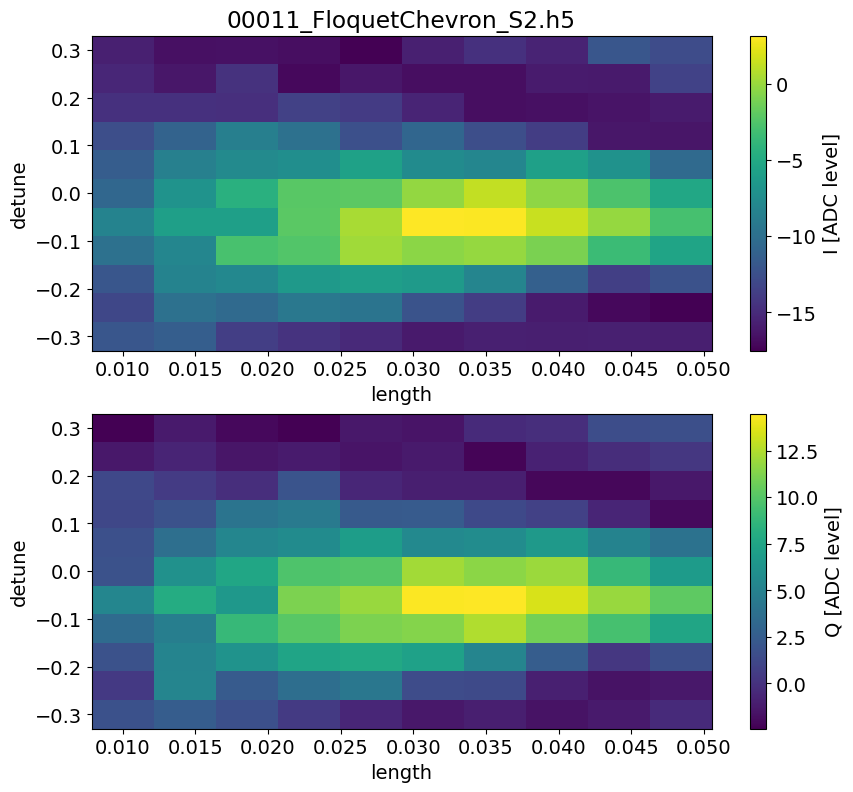

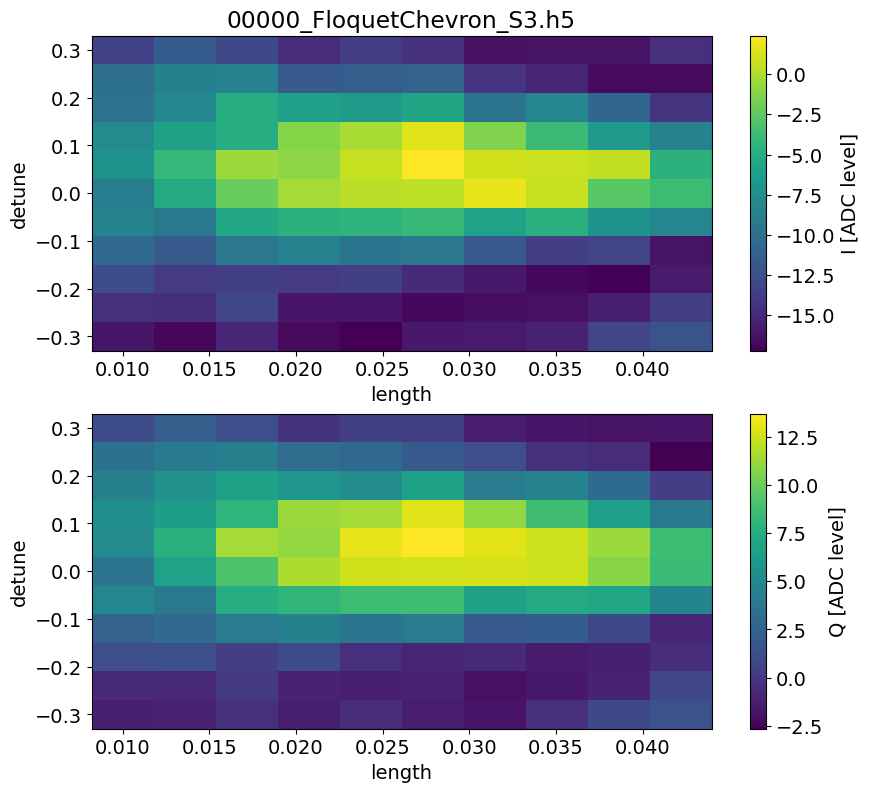

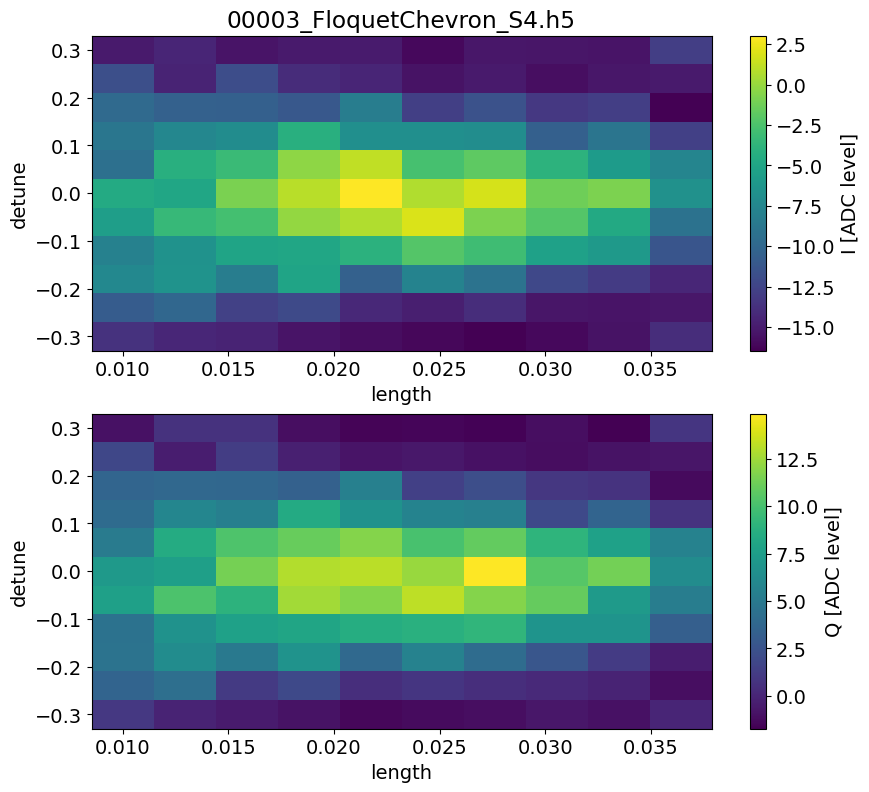

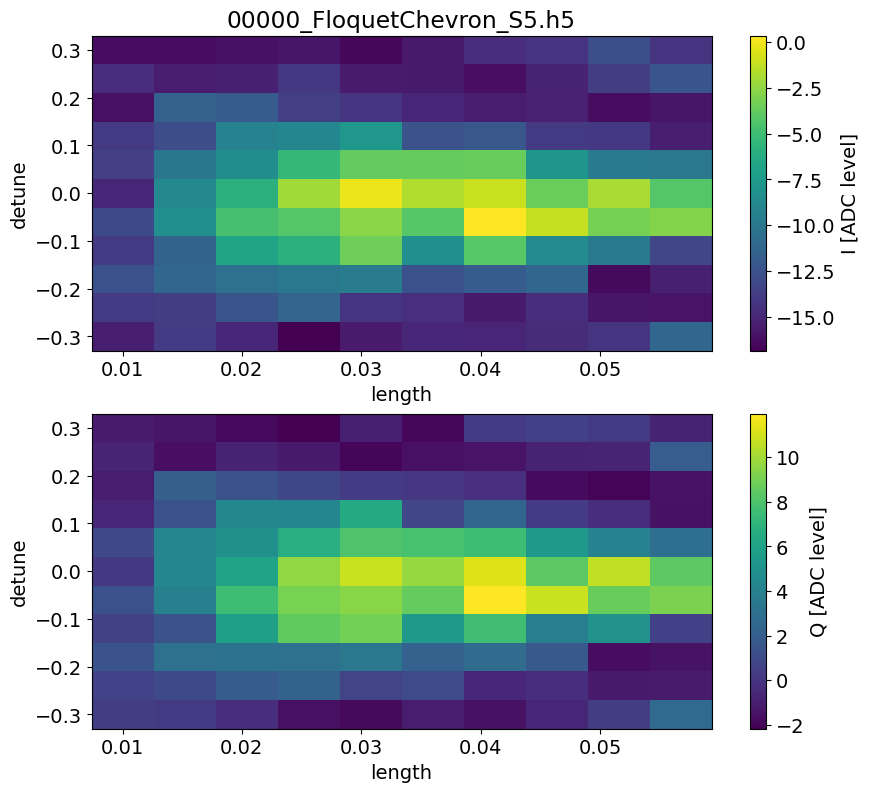

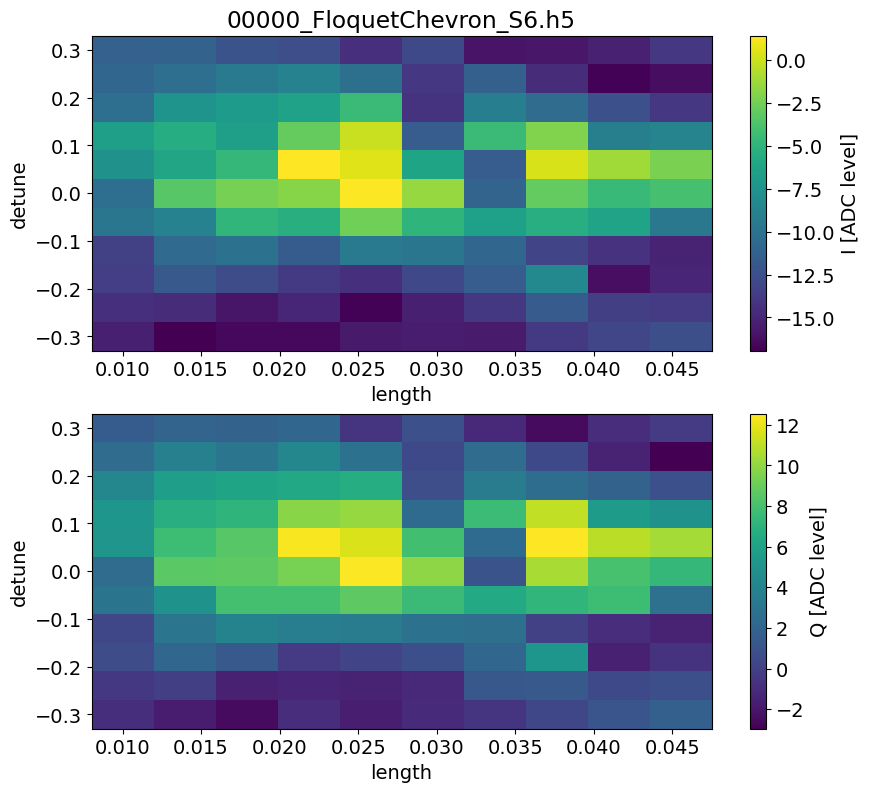

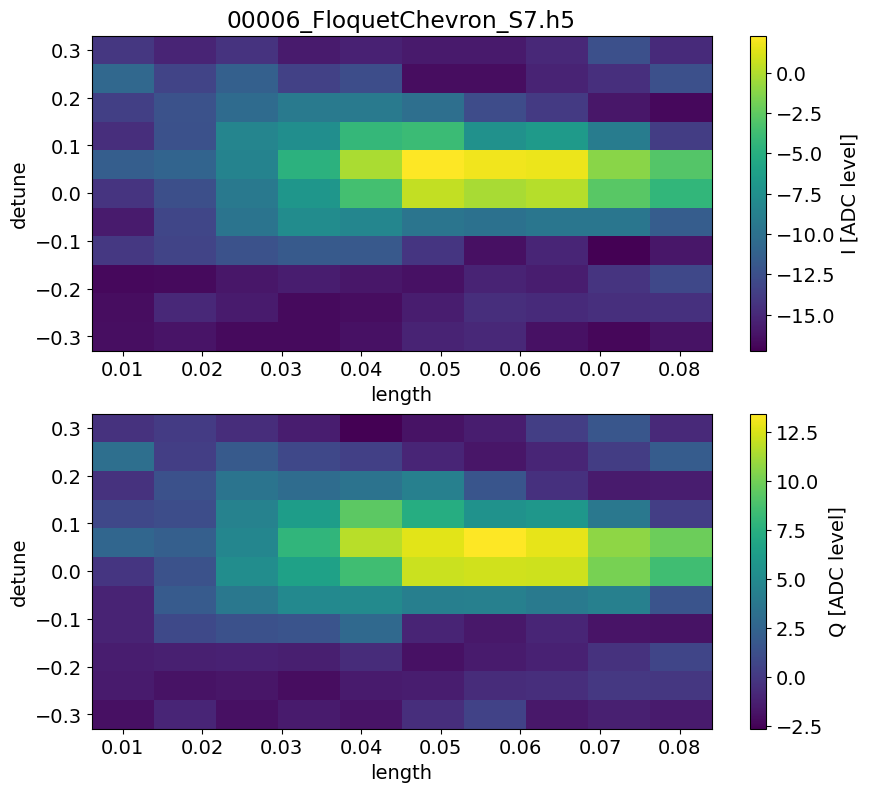

In [58]:
stor_modes_to_run = list(range(1,8))
freq_len_expt = [None] * len(stor_modes_to_run)

for i, init_stor in enumerate(stor_modes_to_run):
    ro_stor = 0

    # ds_thisrun.update_gain(f'M1-S{init_stor}', ds_thisrun.get_gain(f'M1-S{init_stor}') * 0.75)
    # print(f'Updating gain for M1-S{init_stor} to {ds_thisrun.get_gain(f"M1-S{init_stor}")}')

    expt_params = dict(
        expts = 1,
        reps = 100,
        rounds = 1,
        qubits = [0],
        f0g1_cavity = 1,  #  1/2 name of manipulate cavity
        init_stor = init_stor, # storage mode number to initialize to n=1 Fock state
        ro_stor = ro_stor, # storage mode number that gets read out in the end
        # if 0, this means to read out man instead
        detunes=np.linspace(-0.3, 0.3, 11).tolist(),
        lengths=np.linspace(0.01, 1.2 * ds_thisrun.get_len(f'M1-S{init_stor}'), 10).tolist(),
        swept_params = ['detune', 'length'],
        # detune = 0,
        # swept_params = ['length'],
        normalize = False,
        active_reset = False,
        man_reset = True, 
        storage_reset = True, 
        ds_thisrun=ds_thisrun,
        prepulse=True,
        postpulse=True,
    )
    
    qbe = meas.FloquetChevronExperiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"FloquetChevron_S{expt_params['init_stor']}",
        config_file=config_path,
        expt_params=expt_params,
        program=meas.FloquetChevronProgram,
        progress=True)
    
    qbe.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
    qbe.go(analyze=False, display=True, progress=True, save=True)
    freq_len_expt[i] = qbe

In [ ]:
qbe.prog.us2cycles(2, gen_ch=1)

799

In [43]:
qbe = freq_len_expt[0]
# qbe.analyze()

stor_name = f'M1-S{qbe.cfg.expt.init_stor}'
print(stor_name, ds_thisrun.get_len(stor_name))
# ds_thisrun.update_len(stor_name, 0.300)
ds_thisrun.update_freq(stor_name, ds_thisrun.get_freq(stor_name) - 0.05)

M1-S7 0.6040455746506244
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv


In [47]:
ds_thisrun.update_freq('M1-S2', ds_thisrun.get_freq('M1-S2') - 0.03)
# ds_thisrun.update_freq('M1-S4', ds_thisrun.get_freq('M1-S4') - 0.03)
ds_thisrun.update_freq('M1-S7', ds_thisrun.get_freq('M1-S7') - 0.015)

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv


In [38]:
# Save dataset to file
ds.df = ds_thisrun.df.copy()
ds.save_to_file(ds.filename)

Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv


## Error amplification on floquet pulses

In [48]:
def do_error_amp_floquet(
    config_thisrun,
    ds_thisrun,
    expt_path,
    config_path,
    reps=100,
    rounds=1,
    qubit=0,
    n_pulses=10,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500, 
    span = 1.0, # in units of either freq or gain depending on parameter_to_test
    expts = 25,
    parameter_to_test = 'frequency',
    man_mode_no=1,
    stor_mode_no=1,
    stor_is_dump=False,
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    freq, gain, length, pi_frac, ch, prepulse, postpulse = get_floquet_parameters(ds_thisrun, config_thisrun, man_mode_no, stor_mode_no)

    pulse_type = ['floquet', f'M{man_mode_no}-{"D" if stor_is_dump else "S"}{stor_mode_no}', f'pi/{pi_frac}', 0]


    if parameter_to_test == 'frequency':
        start = freq - span / 2
        step = span / (expts - 1)
    elif parameter_to_test == 'gain':
        start = int(gain - span / 2)
        step = int(span / (expts - 1))
    else:
        raise ValueError("parameter_to_test must be either 'frequency' or 'gain'.")
    
    expt_cfg = {
        'reps': reps,
        'qubit': qubit,
        'qubits': [qubit],
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'start': start,
        'expts': expts,
        'step': step,
        'n_pulses': n_pulses,
        'pulse_type': pulse_type,
        'parameter_to_test': parameter_to_test,
        'rounds': rounds,
    }

    error_amp_exp = meas.single_qubit.error_amplification.ErrorAmplificationExperiment(
    soccfg=soc, path=expt_path,
      prefix='ErrorAmplificationExperiment', config_file=config_path)
    error_amp_exp.cfg = AttrDict(deepcopy(config_thisrun))
    error_amp_exp.cfg.expt = expt_cfg
    error_amp_exp.go(analyze=False, display=False, progress=True, save=True)
    return error_amp_exp

In [59]:
stor_modes_to_run = list(range(1,8))
error_amp_gain1 = [None] * len(stor_modes_to_run)
error_amp_freq1 = [None] * len(stor_modes_to_run)
error_amp_gain2 = [None] * len(stor_modes_to_run)
error_amp_freq2 = [None] * len(stor_modes_to_run)

In [52]:
ds_thisrun.update_gain('M1-S7', 3140)

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv


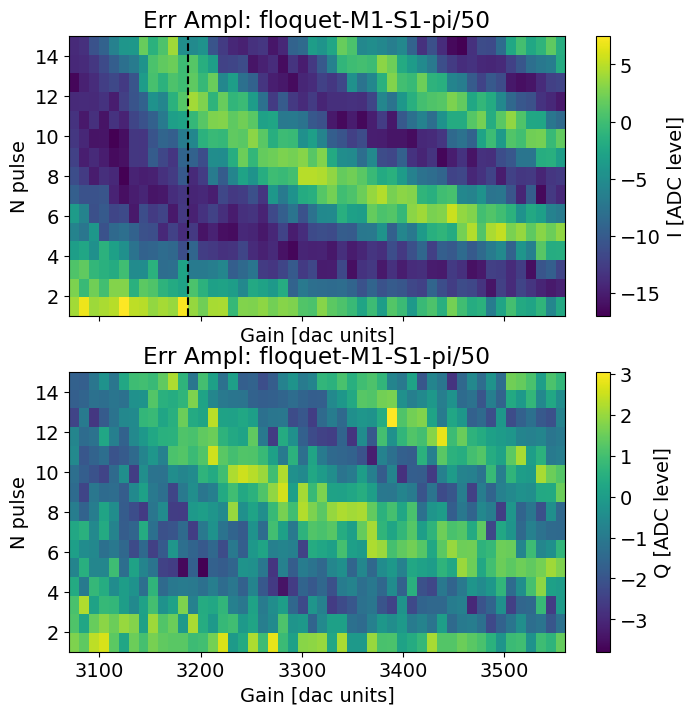

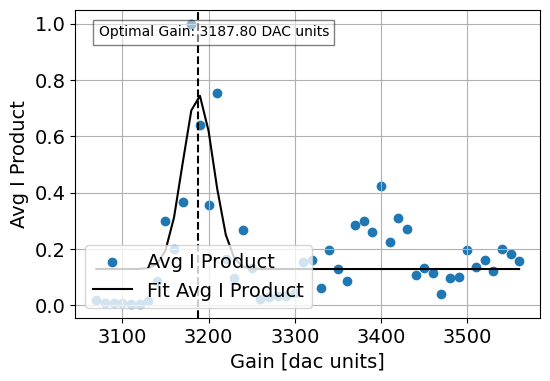

In [ ]:
error_amp_gain1[0].display()

In [73]:
tdata.keys()

dict_keys(['npts', 'x_pts', 'avgi', 'avgq', 'amp', 'phase', 'N_pts', 'prod_avgi', 'prod_avgi_fit', 'fit_avgi', 'fit_prod_avgi_err'])

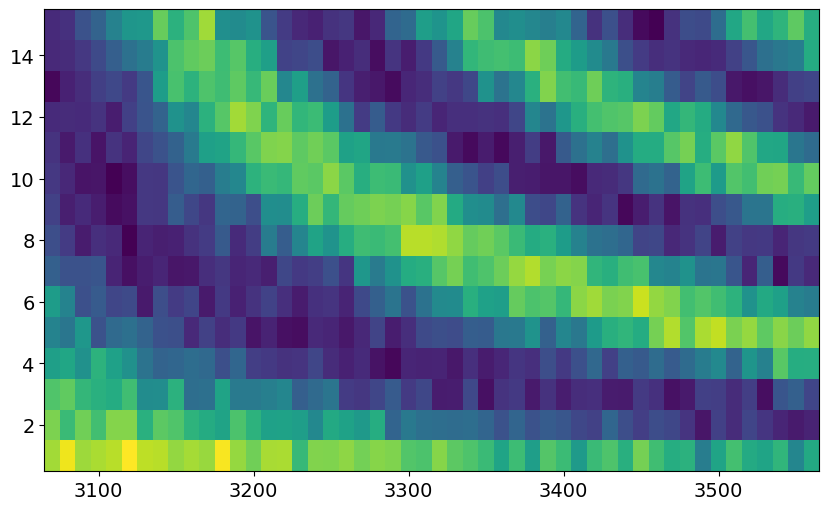

In [74]:
tdata = error_amp_gain1[0].data
plt.pcolormesh(tdata['x_pts'], tdata['N_pts'], tdata['avgi'])

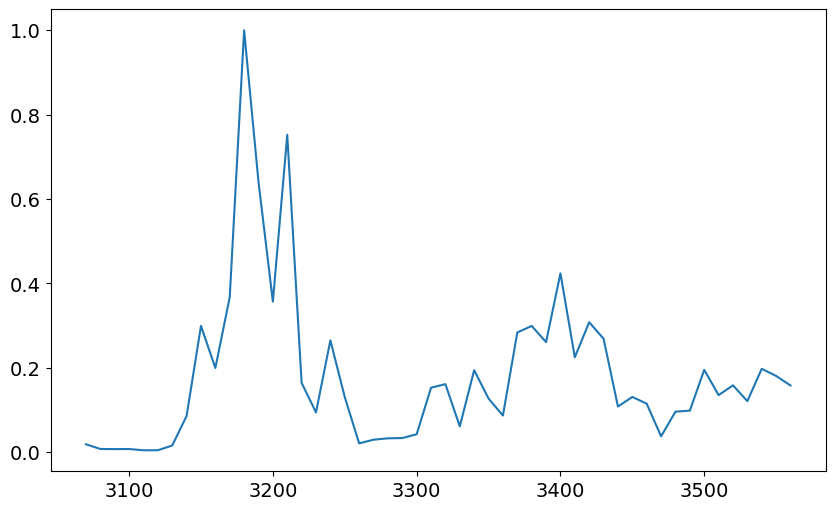

In [76]:
tdata = error_amp_gain1[0].data
plt.plot(tdata['x_pts'], tdata['prod_avgi'])

Running M1-S1
cfg at start of acquire {'reps': 50, 'qubit': 0, 'qubits': [0], 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'start': 3070, 'expts': 50, 'step': 10, 'n_pulses': 15, 'pulse_type': ['floquet', 'M1-S1', 'pi/50', 0], 'parameter_to_test': 'gain', 'rounds': 1}
n_pts [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


  0%|          | 0/15 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00015_ErrorAmplificationExperiment.h5
fitparams [0.004734850756830667, 0.9952651492431693, 3180, 49.0]


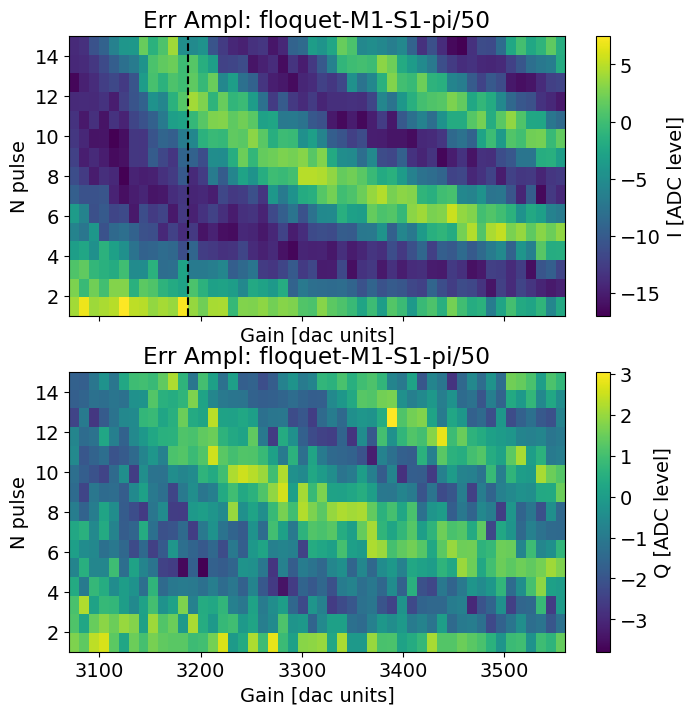

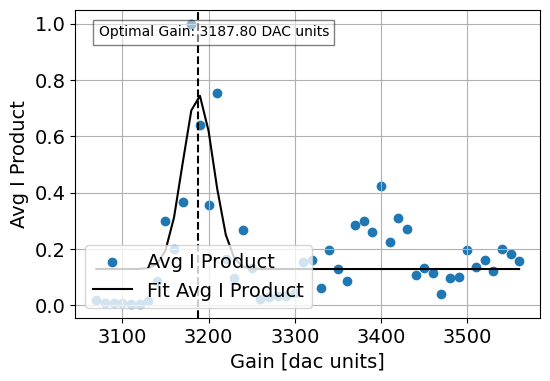

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
cfg at start of acquire {'reps': 50, 'qubit': 0, 'qubits': [0], 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'start': 352.903893749093, 'expts': 50, 'step': 0.0010204081632653062, 'n_pulses': 10, 'pulse_type': ['floquet', 'M1-S1', 'pi/50', 0], 'parameter_to_test': 'frequency', 'rounds': 1}
n_pts [ 1  2  3  4  5  6  7  8  9 10]


  0%|          | 0/10 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00016_ErrorAmplificationExperiment.h5
fitparams [0.00022761174082170147, 0.9997723882591782, 352.92940395317464, 0.005000000000001137]


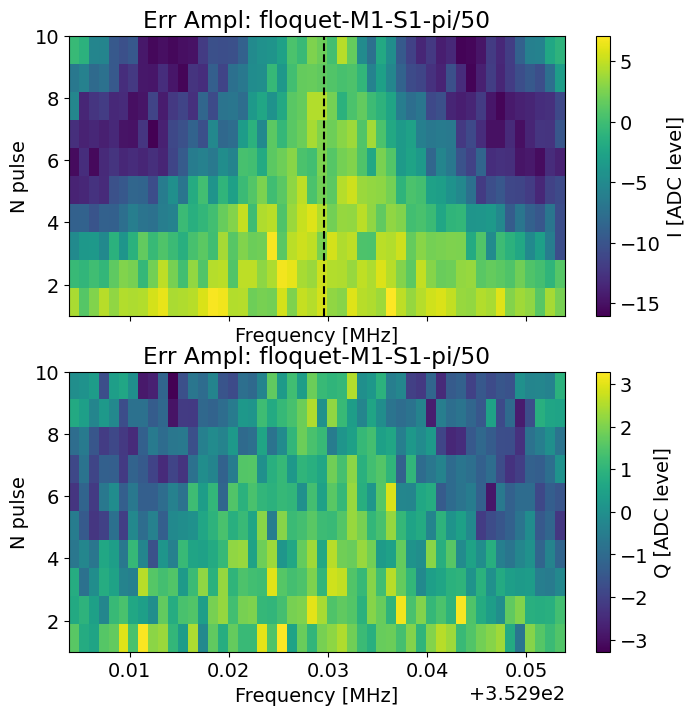

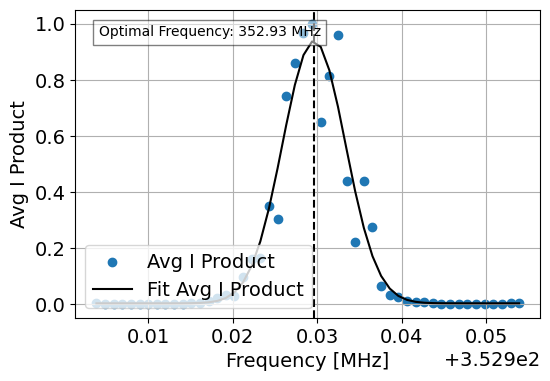

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
Running M1-S2
cfg at start of acquire {'reps': 50, 'qubit': 0, 'qubits': [0], 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'start': 3964, 'expts': 50, 'step': 10, 'n_pulses': 15, 'pulse_type': ['floquet', 'M1-S2', 'pi/50', 0], 'parameter_to_test': 'gain', 'rounds': 1}
n_pts [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


  0%|          | 0/15 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [60]:
for i, stor_i in enumerate(stor_modes_to_run):
    stor_name = 'M1-S' + str(stor_i)
    print("Running", stor_name)

    error_amp_exp = do_error_amp_floquet(
        config_thisrun=config_thisrun,
        ds_thisrun=ds_thisrun,
        expt_path=expt_path,
        config_path=config_path,
        reps=50,
        rounds=1,
        qubit=0,
        n_pulses=15,
        active_reset=False,
        man_mode_no=1,
        stor_mode_no=stor_i,
        stor_is_dump=False,
        parameter_to_test='gain',
        span=500,
        expts=50,
    )
    error_amp_gain1[i] = error_amp_exp

    error_amp_exp.analyze(state_fin='e')
    error_amp_exp.display()
    opt_gain = error_amp_exp.data['fit_avgi'][2]
    ds_thisrun.update_gain(stor_name, opt_gain)


    error_amp_exp = do_error_amp_floquet(
        config_thisrun=config_thisrun,
        ds_thisrun=ds_thisrun,
        expt_path=expt_path,
        config_path=config_path,
        reps=50,
        rounds=1,
        qubit=0,
        n_pulses=10,
        active_reset=False,
        man_mode_no=1,
        stor_mode_no=stor_i,
        stor_is_dump=False,
        parameter_to_test='frequency',
        span=0.05,
        expts=50,
    )
    error_amp_freq1[i] = error_amp_exp

    error_amp_exp.analyze(state_fin='e')
    error_amp_exp.display()
    opt_freq = error_amp_exp.data['fit_avgi'][2]
    ds_thisrun.update_freq(stor_name, opt_freq)

fitparams [-1.3658220698989558, 2.3658220698989556, 1214, 49.0]


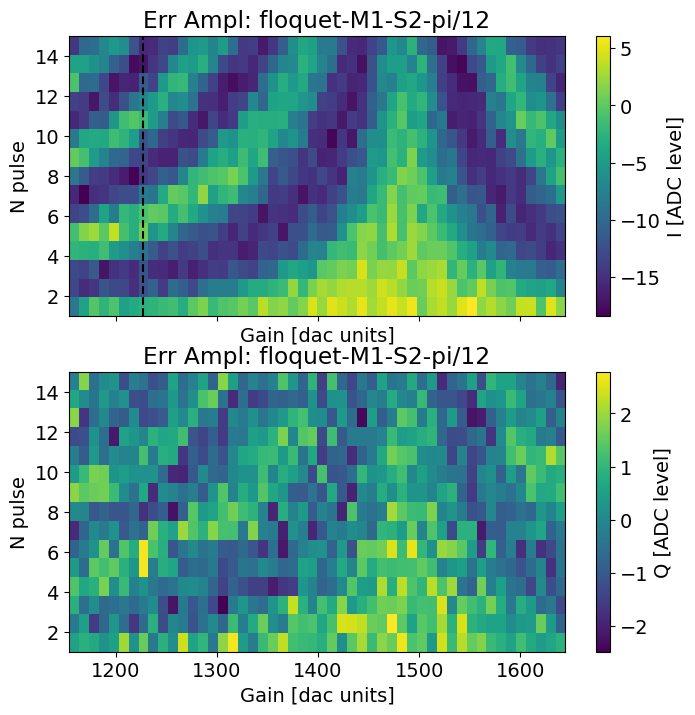

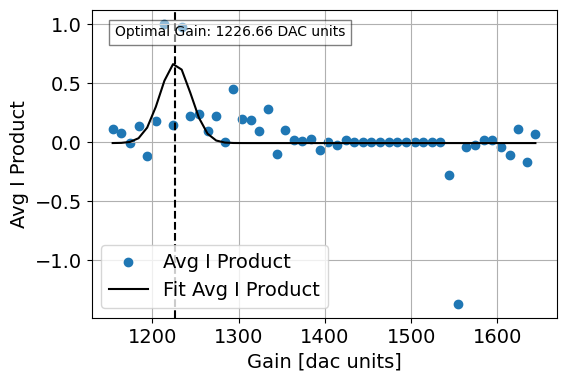

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [0.0007317365968584281, 0.9992682634031416, 524.656565130822, 0.0049999999999954525]


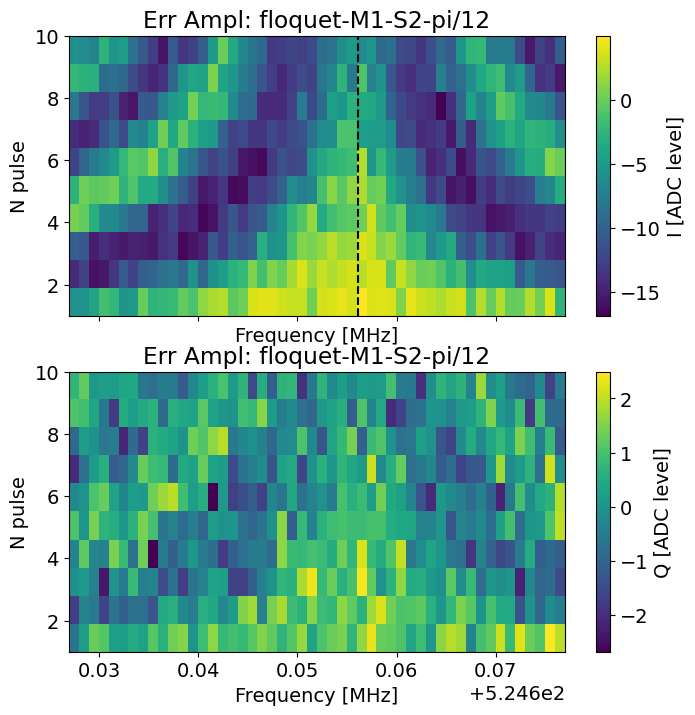

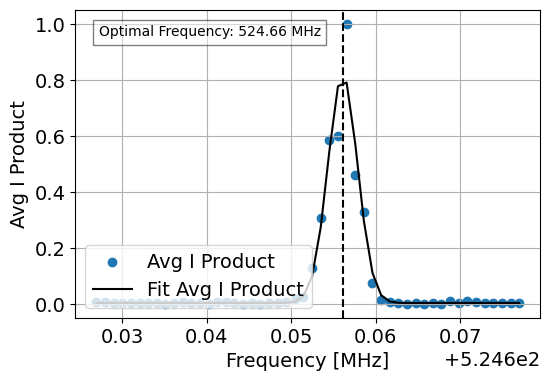

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [-2.8012006378454433, 3.8012006378454433, 3078, 49.0]


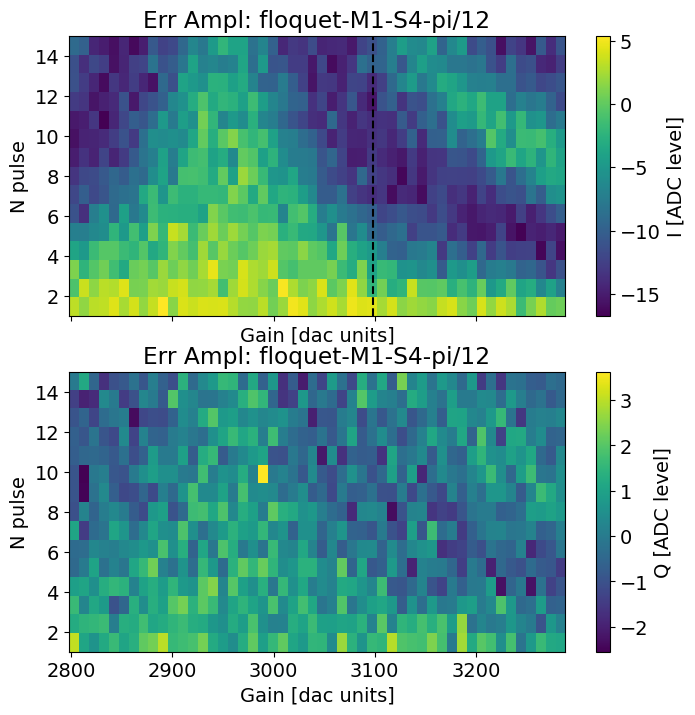

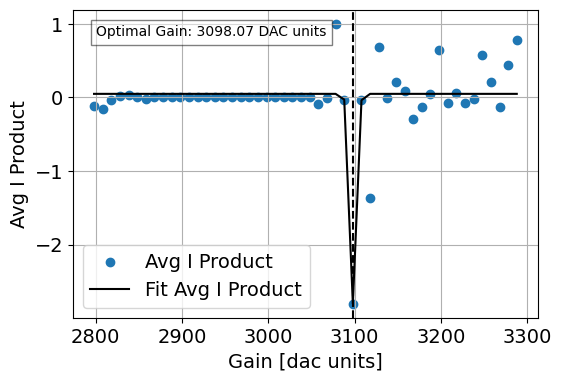

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [0.000555562362441624, 0.9994444376375584, 880.8627274168641, 0.0049999999999954525]


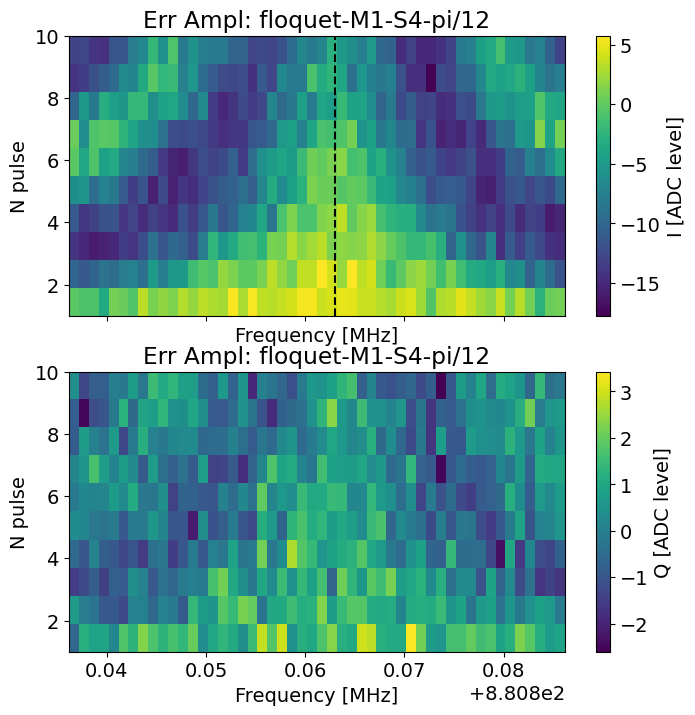

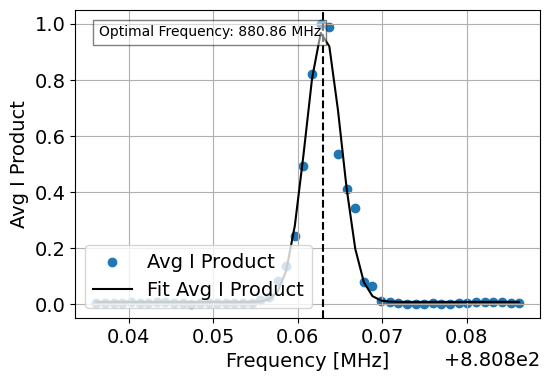

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [-1.846187645563967, 2.846187645563967, 2912, 49.0]


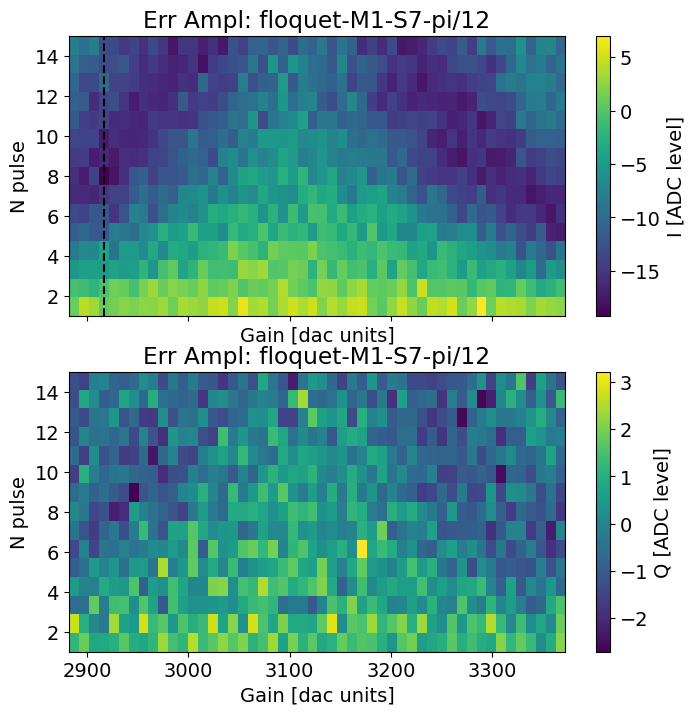

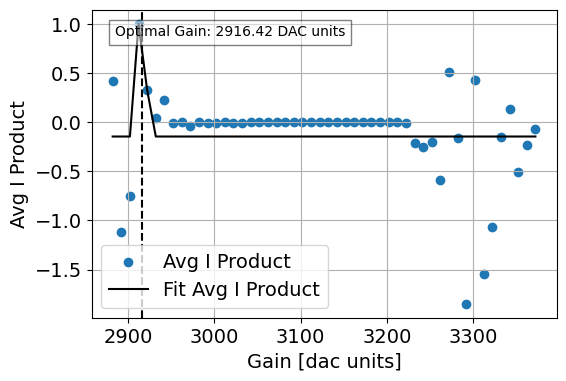

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [0.0021833965529803943, 0.9978166034470196, 1427.1950632171786, 0.0049999999999954525]


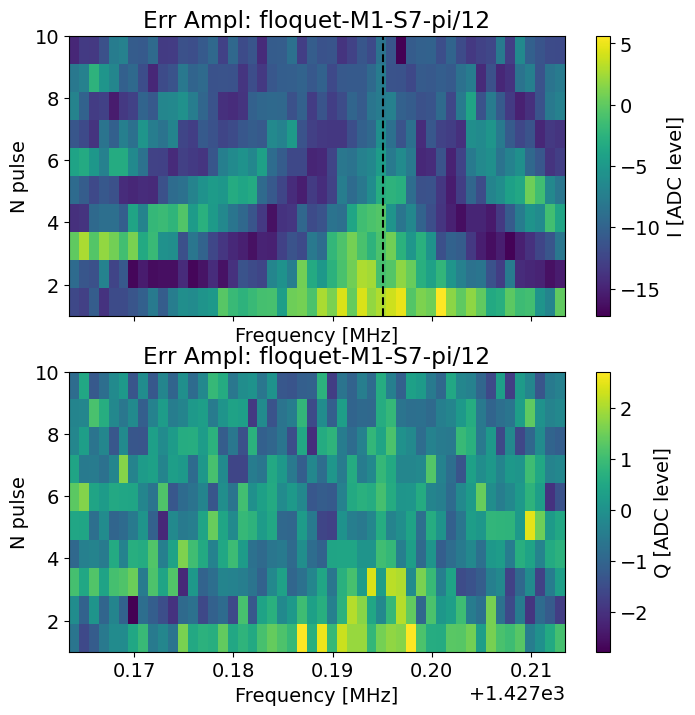

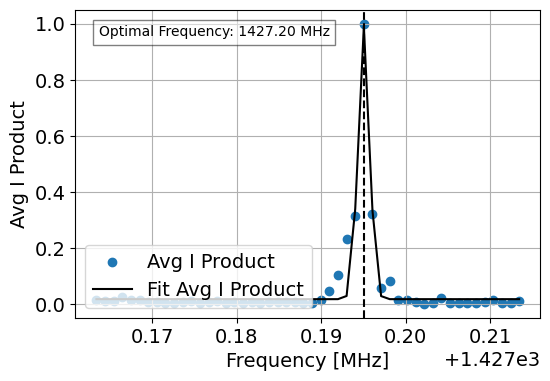

Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv


In [51]:
for i, stor_i in enumerate(stor_modes_to_run):
    stor_name = 'M1-S' + str(stor_i)

    error_amp_exp = error_amp_gain1[i]
    error_amp_exp.analyze(state_fin='g')
    error_amp_exp.display()
    opt_gain = error_amp_exp.data['fit_avgi'][2]
    ds_thisrun.update_gain(stor_name, opt_gain)

    error_amp_exp = error_amp_freq1[i]
    error_amp_exp.analyze(state_fin='e')
    error_amp_exp.display()
    opt_freq = error_amp_exp.data['fit_avgi'][2]
    ds_thisrun.update_freq(stor_name, opt_freq)

In [54]:
# Save dataset to file
ds.df = ds_thisrun.df.copy()
ds.save_to_file(ds.filename)

Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv


## Phase accumulation matrix from stark shifts

In [55]:
phase_expts = [[None for _ in range(7)] for _ in range(7)]

Starting experiment for storage modes: 1 from 2
phase sweep [-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


  0%|          | 0/6 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00003_SidebandStarkAmplification_S1_S2.h5


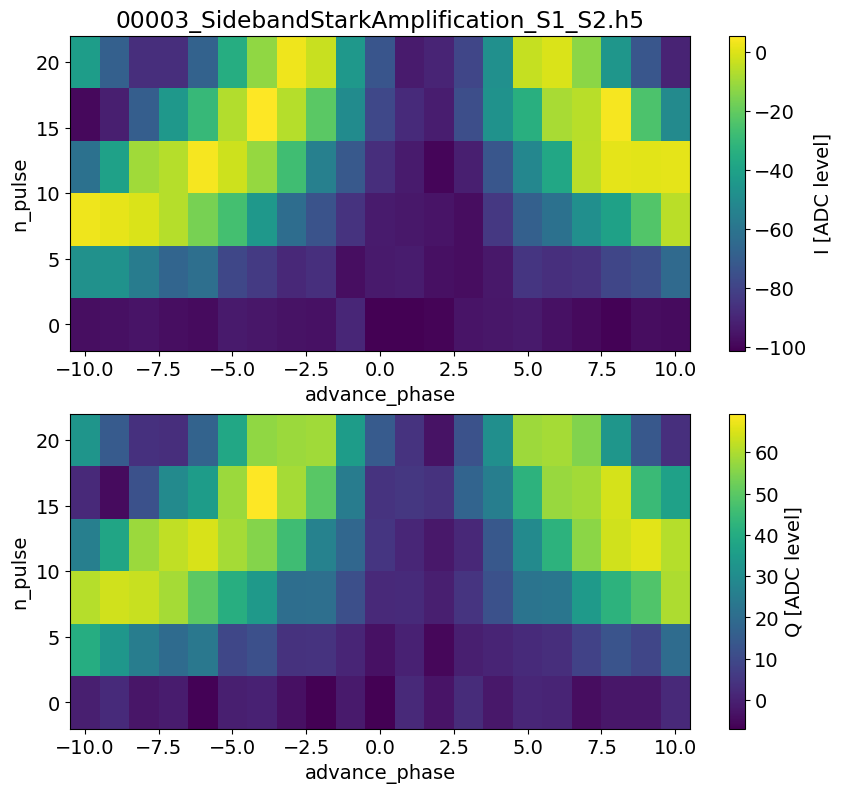

Starting experiment for storage modes: 2 from 1
phase sweep [-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


  0%|          | 0/6 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00002_SidebandStarkAmplification_S2_S1.h5


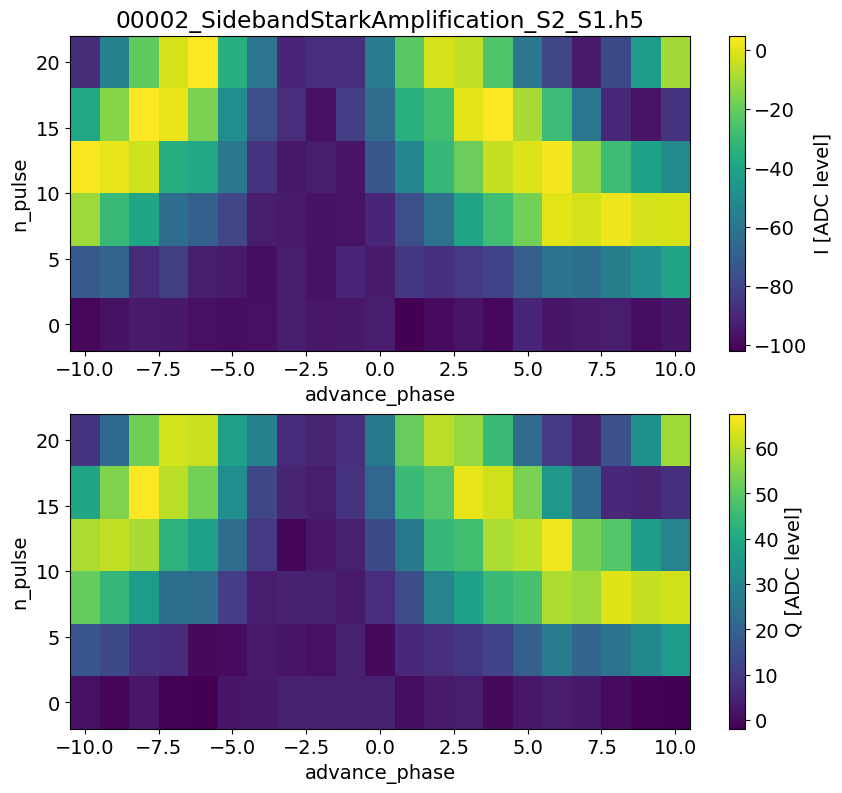

In [61]:
stor_modes_to_run = [1, 2]

for iA, init_storA in enumerate(stor_modes_to_run): #range(1,8):
    for iB, init_storB in enumerate(stor_modes_to_run): #range(1,8):
        if init_storA == init_storB:
            continue
        print("Starting experiment for storage modes:", init_storA, "from", init_storB)
        expt_params = dict(
            expts = 1,
            reps = 100,
            rounds = 1,
            qubits = [0],
            f0g1_cavity = 1,  #  1/2 name of manipulate cavity
            init_stor = 0, # storage mode number to initialize to n=1 Fock state (0 = man)
            ro_stor = 0, # storage mode number that gets read out in the end (0 = man)
            stor_A = init_storA, # storage mode on whose phase accumulation we will evaluate (relative to the stark shifted frequency)
            stor_B = init_storB, # storage mode on which a drive is applied which contributes the phase accumulation
            advance_phases = np.linspace(-10, 10, 21).tolist(),
            n_pulses = np.arange(0, 24, 4).tolist(),
            swept_params = ['n_pulse', 'advance_phase'],
            # usage: if you want to sweep cfg.expt.paramName, 
            # include paramName here in this list 
            # AND include cfg.expt.paramNames (note the s) as a list of values to step thru.
            # (You want a list instead of numpy array for better yaml export.)
            # Currently handles 1D and 2D sweeps and plots only.
            # For 2D, order is [outer (y), inner (x)].
            normalize = False, # not sure what this does
            active_reset = False,
            man_reset = True, 
            storage_reset = True, 
            ds_thisrun=ds_thisrun,
        )
        print("phase sweep", expt_params["advance_phases"])
    
        qbe = meas.SidebandStarkAmplificationExperiment(
            soccfg=soc,
            path=expt_path,
            prefix=f"SidebandStarkAmplification_S{expt_params['stor_A']}_S{expt_params['stor_B']}",
            config_file=config_path,
            expt_params=expt_params,
            program=meas.SidebandStarkAmplificationProgram,
            progress=True)
    
        qbe.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
        qbe.go(analyze=False, display=True, progress=True, save=True)
        phase_expts[init_storA - 1][init_storB - 1] = qbe

In [28]:
for iA, init_storA in enumerate(stor_modes_to_run): #range(1,8):
    for iB, init_storB in enumerate(stor_modes_to_run): #range(1,8):
        if init_storA == init_storB:
            continue
        stor_name = 'M1-S' + str(init_storA)
        from_stor_name = 'M1-S' + str(init_storB)
        qbe = phase_expts[init_storA - 1][init_storB - 1]
        qbe.analyze(fit=True)
        # qbe.display(fit=True)
        opt_phase = qbe.data['fit_avgi'][2] / 2 # divide by 2 since did pi/12, -pi/12 on the from_stor swap
        print("Opt phase on", stor_name, "from", from_stor_name, ":", opt_phase)
        ds_thisrun.update_phase_from(stor_name, from_stor_name, opt_phase)

fitparams [0.0012624003412228272, 0.9987375996587772, 1.5, 2.0]
Opt phase on M1-S1 from M1-S2 : 0.7396808820085534
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [0.004608970313470526, 0.9953910296865295, -1.0, 2.0]
Opt phase on M1-S1 from M1-S3 : -0.7326123737440323
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [0.008832596741336459, 0.9911674032586636, -2.5, 2.0]
Opt phase on M1-S2 from M1-S1 : -1.0640860485479129
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [0.0012016125630761314, 0.9987983874369238, -4.5, 2.0]
Opt phase on M1-S2 from M1-S3 : -1.8747449201378947
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [0.004669903766276481, 0.9953300962337235, 2.0, 2.0]
Opt phase on M1-S3 from M1-S1 : 1.3757035116688536
Creating or updating new csv at path: floquet_storage_swap_dataset_copy.csv
fitparams [0.0049264894335033435, 0.995073

In [45]:
# Save dataset to file
ds.df = ds_thisrun.df.copy()
ds.save_to_file(ds.filename)

Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv


In [1]:
ds_thisrun.df

NameError: name 'ds_thisrun' is not defined

In [63]:
ds.df

stor_name  pi_frac   freq (MHz)  gain (DAC units)  len (mus)  \
0     M1-S1       12   348.712413              1006   0.302298   
1     M1-S2       12   519.951968              1341   0.310000   
2     M1-S3       12   696.041673              1157   0.310000   
3     M1-S4       12   873.467193              3026   0.250550   
4     M1-S5       12  1052.583825              2371   0.459513   
5     M1-S6       12  1244.545889              4458   0.339900   
6     M1-S7       12  1422.094111              3151   0.604046   

   ramp_sigma (mus)  phase_from_M1-S1 (deg)  phase_from_M1-S2 (deg)  \
0          0.005008                0.000000                0.739681   
1          0.005008               -1.064086                0.000000   
2          0.005008                1.375704                2.287871   
3          0.005008                0.000000                0.000000   
4          0.005008                0.000000                0.000000   
5          0.005008                0.000000                0.000000   
6          0.005008                0.000000                0.000000   

   phase_from_M1-S3 (deg)  phase_from_M1-S4 (deg)  phase_from_M1-S5 (deg)  \
0               -0.732612                     0.0                     0.0   
1               -1.874745                     0.0                     0.0   
2                0.000000                     0.0                     0.0   
3                0.000000                     0.0                     0.0   
4                0.000000                     0.0                     0.0   
5                0.000000                     0.0                     0.0   
6                0.000000                     0.0                     0.0   

   phase_from_M1-S6 (deg)  phase_from_M1-S7 (deg)                 last_update  
0                     0.0                     0.0  2025-09-01 16:01:42.932357  
1                     0.0                     0.0  2025-09-01 16:01:42.937373  
2                     0.0                     0.0  2025-09-01 16:01:42.941360  
3                     0.0                     0.0  2025-08-21 13:30:48.136503  
4                     0.0                     0.0  2025-08-21 13:30:48.146499  
5                     0.0                     0.0  2025-08-21 13:30:48.156493  
6                     0.0                     0.0  2025-09-02 13:50:46.466370

In [70]:
ds.update_phase_from('M1-S2', 'M1-S3', -3.81)
ds.update_phase_from('M1-S2', 'M1-S7', -13.26)
ds.update_phase_from('M1-S3', 'M1-S2', 4.56)
ds.update_phase_from('M1-S3', 'M1-S7', 7.64)
ds.update_phase_from('M1-S7', 'M1-S2', 0.6)
ds.update_phase_from('M1-S7', 'M1-S3', -3.02)
ds.save_to_file('floquet_storage_1Derramp.csv')

Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: floquet_storage_1Derramp.csv


In [69]:
ds.update_phase_from('M1-S2', 'M1-S3', -4.4)
ds.update_phase_from('M1-S2', 'M1-S7', -12.34)
ds.update_phase_from('M1-S3', 'M1-S2', 4.07)
ds.update_phase_from('M1-S3', 'M1-S7', 8.56)
ds.update_phase_from('M1-S7', 'M1-S2', 1.24)
ds.update_phase_from('M1-S7', 'M1-S3', -3.02)
ds.save_to_file('floquet_storage_2Derramp.csv')

Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: C:\_Lib\python\multimode_expts\floquet_storage_swap_dataset.csv
Creating or updating new csv at path: floquet_storage_2Derramp.csv


# AC Stark calibration with pi/2 dual rail

  0%|          | 0/31 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00000_FloquetPhaseCal_2on3_via1.h5
('Error in saving cfg into datafile (experiment.py):', TypeError('Object of type floquet_storage_swap_dataset is not JSON serializable'))


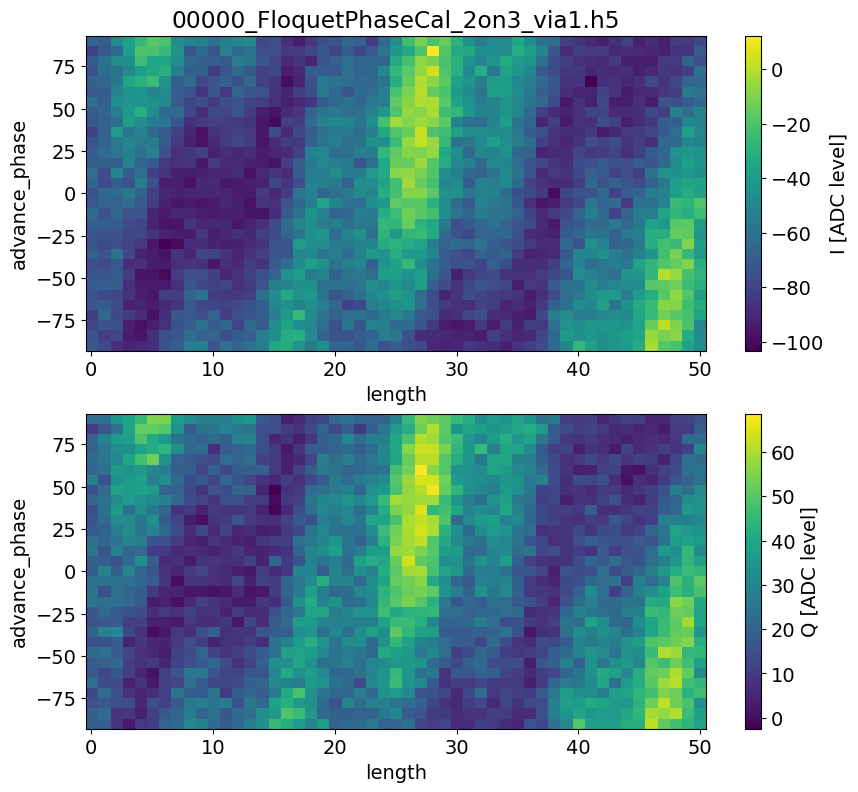

In [25]:
expt_params = dict(
    expts = 1,
    reps = 100,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = 0, # storage mode number to initialize to n=1 Fock state
    ro_stor = 0, # storage mode number that gets read out in the end
    stor_row = 3,
    stor_col = 2,
    stor_idle = 1,
    # if 0, this means to read out man instead
    # detunes=np.linspace(-0.2, 0.2, 10).tolist(),
    # lengths=np.linspace(0, 1.5 * ds_thisrun.get_len(f'M1-S{init_stor}'), 10).tolist(),
    # swept_params = ['detune', 'length'],
    advance_phases=np.linspace(-90,90,31).tolist(),
    lengths=np.linspace(0.1, 50, 51).tolist(),
    swept_params = ['advance_phase', 'length'],
    # usage: if you want to sweep cfg.expt.paramName, 
    # include paramName here in this list 
    # AND include cfg.expt.paramNames (note the s) as a list of values to step thru.
    # (You want a list instead of numpy array for better yaml export.)
    # Currently handles 1D and 2D sweeps and plots only.
    # For 2D, order is [outer, inner].
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    ds_thisrun=ds_thisrun,
)

qbe = meas.FloquetPhaseCalExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"FloquetPhaseCal_{expt_params['stor_col']}on{expt_params['stor_row']}_via{expt_params['stor_idle']}",
    config_file=config_path,
    expt_params=expt_params,
    program=meas.FloquetPhaseCalProgram,
    progress=True)

qbe.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
qbe.go(analyze=False, display=True, progress=True, save=True)
# freq_len_expt[i] = qbe

## Use the period of the 2 storage + M1 random walk to error amplify the phase calibration

Starting experiment for storage modes: 2 from 7
n_scramble_cycles [0, 1, 2, 3]
phase sweep A [-15.0, -14.5, -14.0, -13.5, -13.0, -12.5, -12.0, -11.5, -11.0, -10.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]
phase sweep B [-15.0, -14.5, -14.0, -13.5, -13.0, -12.5, -12.0, -11.5, -11.0, -10.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]
Starting experiment for n_scramble_cycle 0 with total floquet cycles 17


  0%|          | 0/61 [00:00<?, ?it/s]

Starting experiment for n_scramble_cycle 1 with total floquet cycles 51


  0%|          | 0/61 [00:00<?, ?it/s]

Starting experiment for n_scramble_cycle 2 with total floquet cycles 85


  0%|          | 0/61 [00:00<?, ?it/s]

Starting experiment for n_scramble_cycle 3 with total floquet cycles 119


  0%|          | 0/61 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00000_FloquetCalibrationAmplificationExperiment_S2_S7.h5
Starting experiment for storage modes: 3 from 7
n_scramble_cycles [0, 1, 2, 3]
phase sweep A [-15.0, -14.5, -14.0, -13.5, -13.0, -12.5, -12.0, -11.5, -11.0, -10.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]
phase sweep B [-15.0, -14.5, -14.0, -13.5, -13.0, -12.5, -12.0, -11.5, -11.0, -10.5, -10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]
Starting experiment for n_scramble_cycle 0 with total

  0%|          | 0/61 [00:00<?, ?it/s]

Starting experiment for n_scramble_cycle 1 with total floquet cycles 51


  0%|          | 0/61 [00:00<?, ?it/s]

Starting experiment for n_scramble_cycle 2 with total floquet cycles 85


  0%|          | 0/61 [00:00<?, ?it/s]

Starting experiment for n_scramble_cycle 3 with total floquet cycles 119


  0%|          | 0/61 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00000_FloquetCalibrationAmplificationExperiment_S3_S7.h5


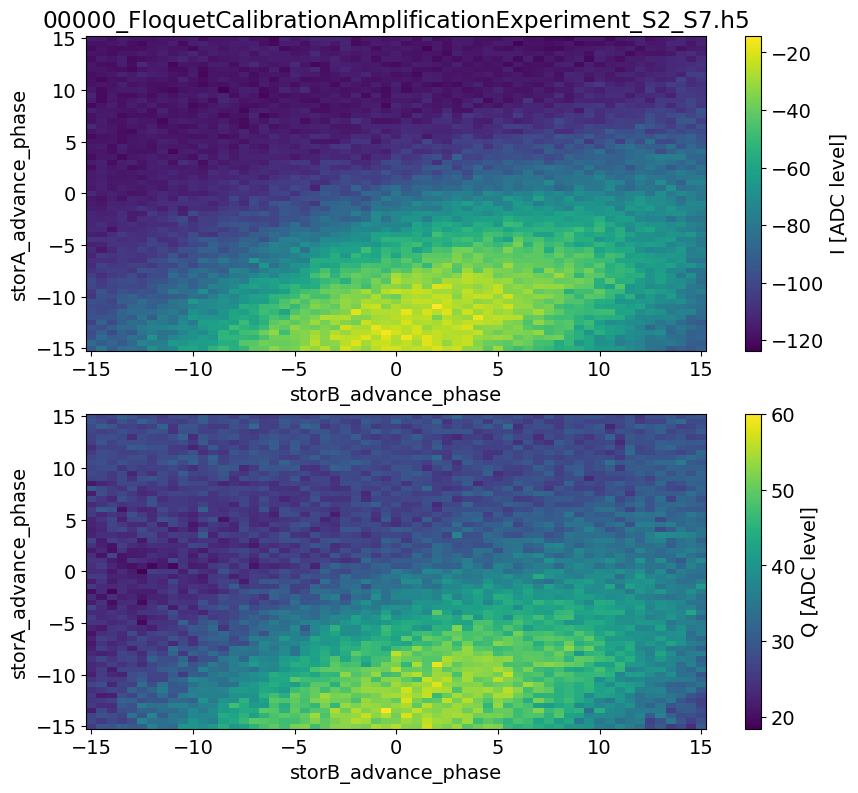

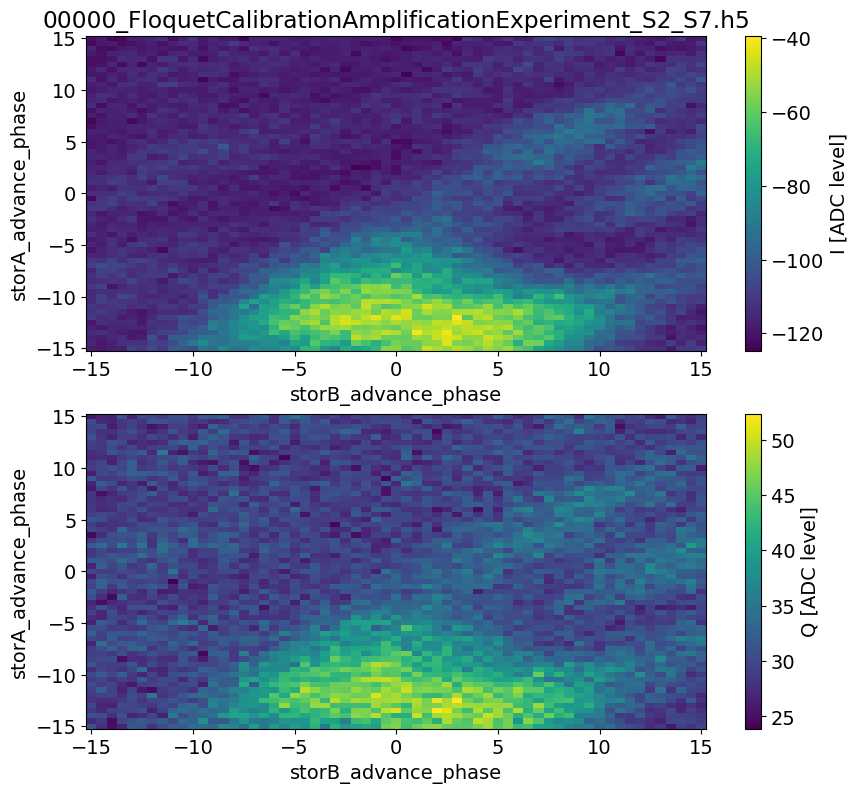

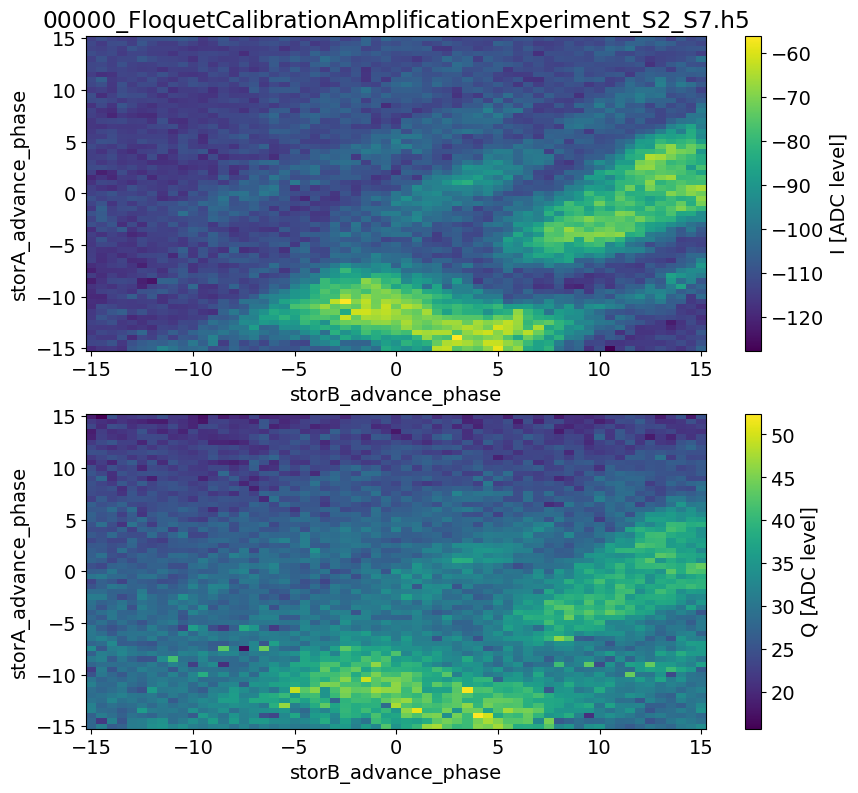

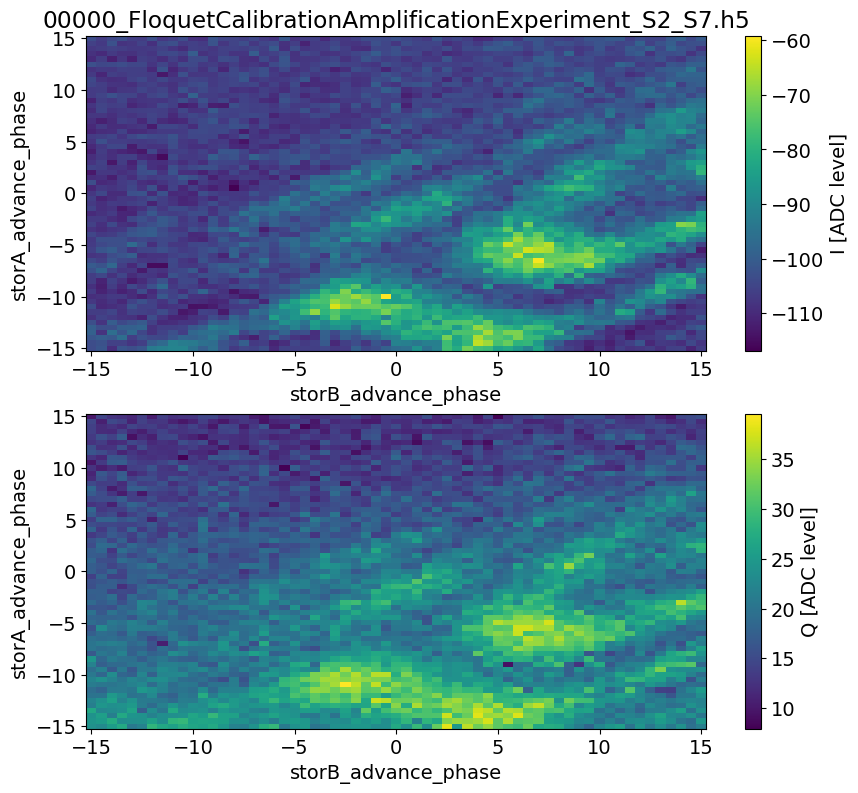

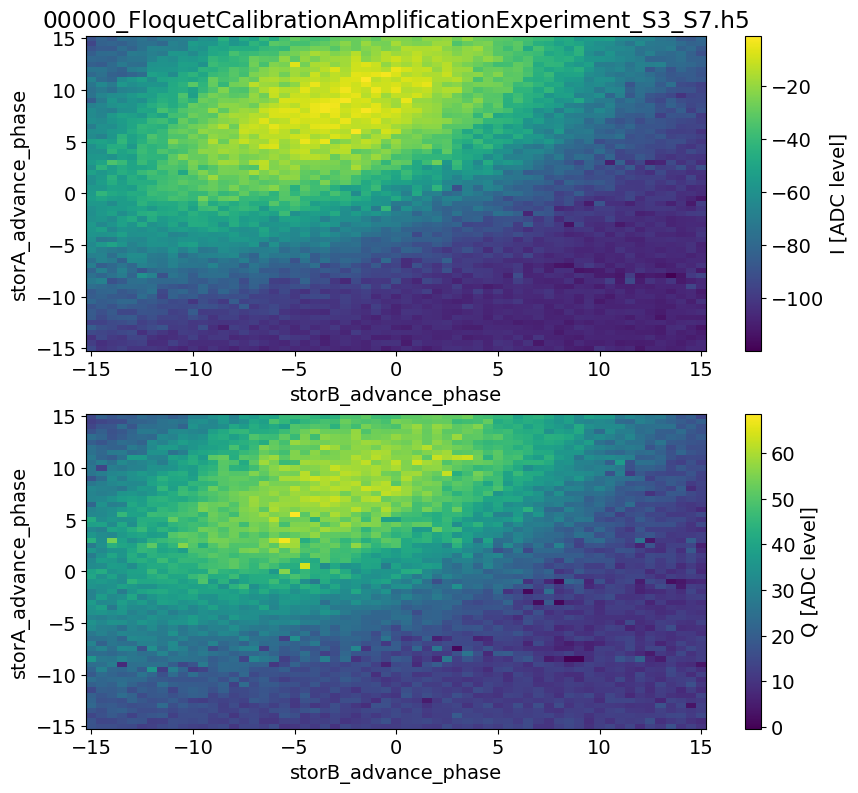

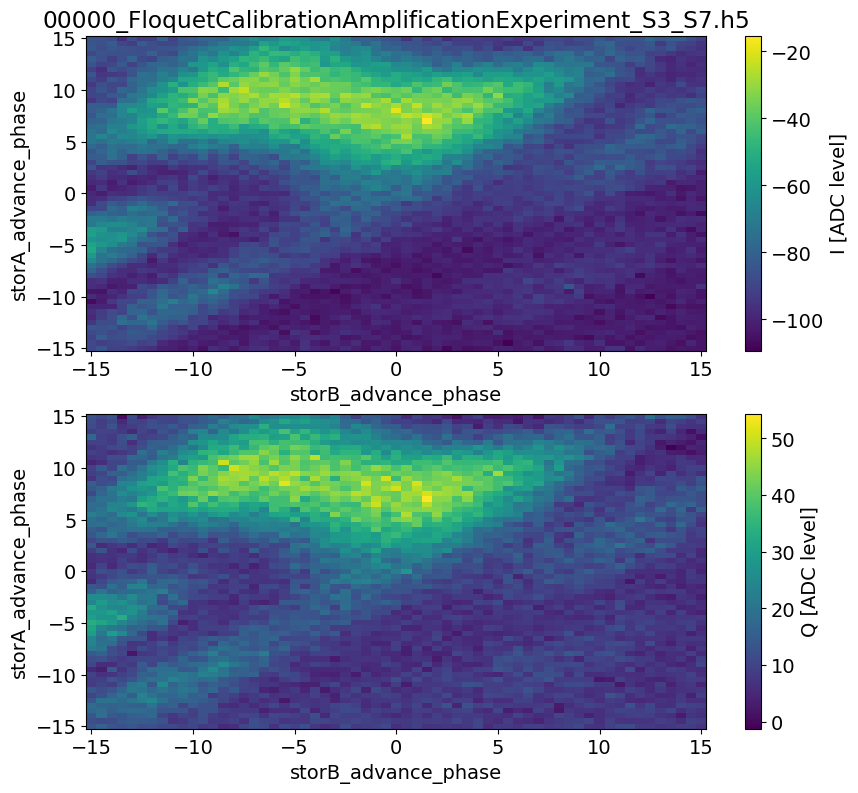

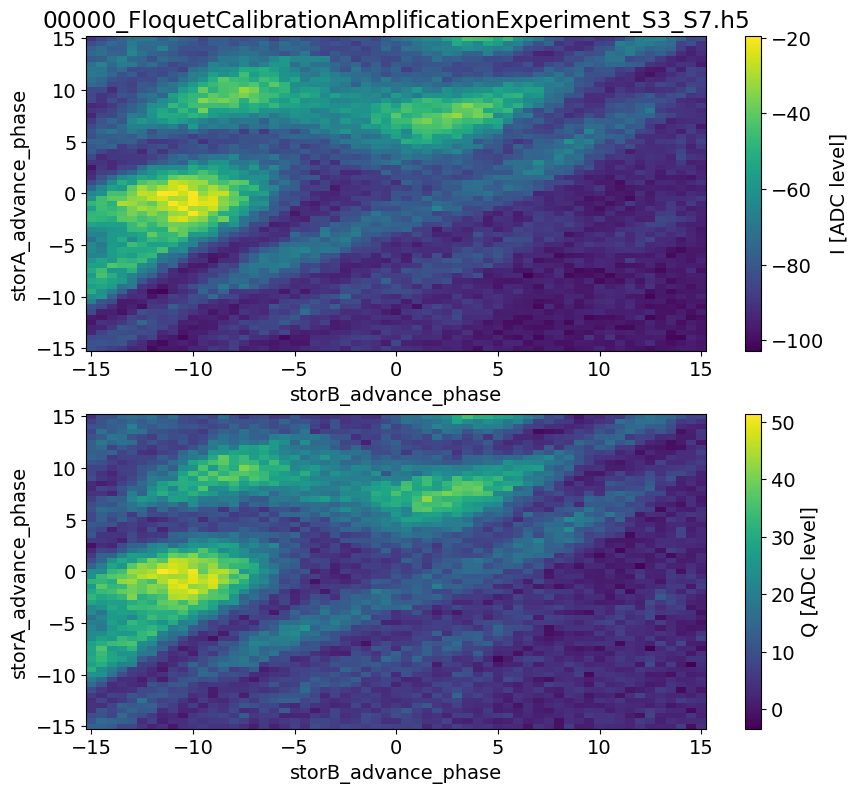

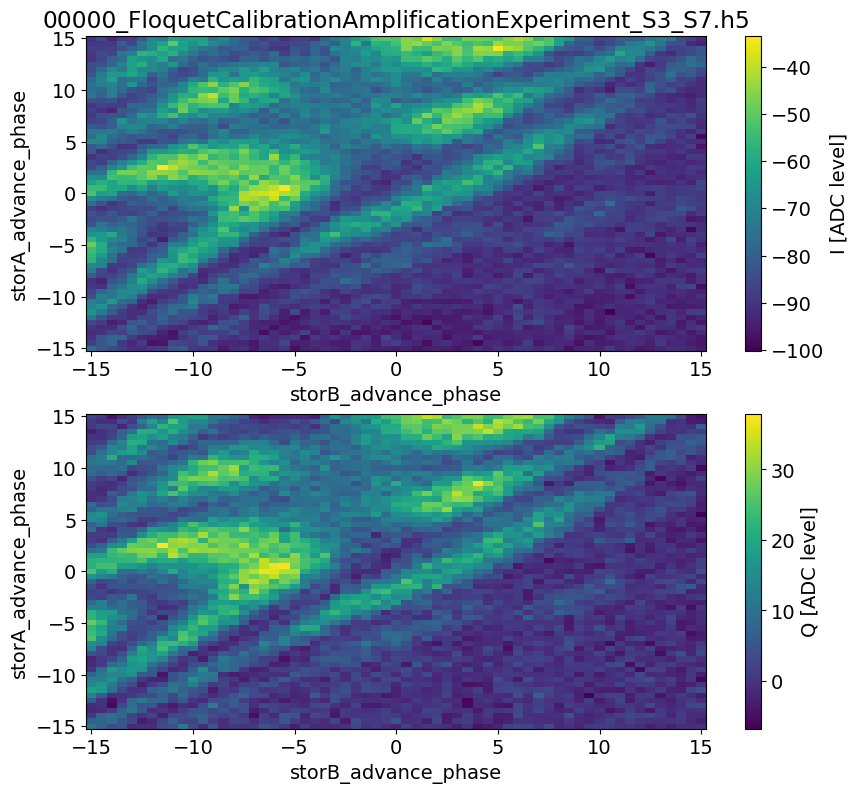

In [59]:
# storA = 2
# storB = 3

for storA, storB in [(2,7),(3,7)]:
    print("Starting experiment for storage modes:", storA, "from", storB)
    n_scramble_cycles = [0,1,2,3]
    n_floquet_per_scramble = 17 # = for omega1=omega2 the period is 2sqrt(2) * pi_frac

    floquet_cycles = n_floquet_per_scramble * n_scramble_cycles

    expt_params = dict(
        expts = 1,
        reps = 200,
        rounds = 1,
        qubits = [0],
        f0g1_cavity = 1,  #  1/2 name of manipulate cavity
        init_stor = storA, # storage mode number to initialize to n=1 Fock state (0 = man)
        ro_stor = storB, # storage mode number that gets read out in the end (0 = man)
        storA = storA, # storage mode on whose phase accumulation we will evaluate (relative to the stark shifted frequency)
        storB = storB, # storage mode on which a drive is applied which contributes the phase accumulation
        storA_advance_phases = np.linspace(-15, 15, 61).tolist(),
        storB_advance_phases = np.linspace(-15, 15, 61).tolist(),
        n_scramble_cycles = n_scramble_cycles,
        n_floquet_per_scramble = n_floquet_per_scramble,
        # usage: if you want to sweep cfg.expt.paramName, 
        # include paramName here in this list 
        # AND include cfg.expt.paramNames (note the s) as a list of values to step thru.
        # (You want a list instead of numpy array for better yaml export.)
        # Currently handles 1D and 2D sweeps and plots only.
        # For 2D, order is [outer (y), inner (x)].
        normalize = False, # not sure what this does
        active_reset = False,
        man_reset = True, 
        storage_reset = True, 
        ds_thisrun=ds_thisrun,
    )
    print("n_scramble_cycles", expt_params["n_scramble_cycles"])
    print("phase sweep A", expt_params["storA_advance_phases"])
    print("phase sweep B", expt_params["storB_advance_phases"])

    qbe = meas.FloquetCalibrationAmplificationExperiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"FloquetCalibrationAmplificationExperiment_S{expt_params['storA']}_S{expt_params['storB']}",
        config_file=config_path,
        expt_params=expt_params,
        program=meas.FloquetCalibrationProgram,
        progress=True)

    qbe.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
    qbe.acquire(progress=True, debug=True)
    qbe.save_data()

In [ ]:
qbe.save_data()
# qbe.analyze()

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00000_FloquetCalibrationAmplificationExperiment_S1_S2.h5


array([1])

# Qsim

## Initial random try

In [24]:
import multimode_expts.experiments.qsim.qsim_experiments as qsim_exp

experiment_name = 'storage_sweep'

flqSwap = qsim_exp.floquet_swap_class(
    soccfg=soc, 
    path=expt_path, 
    prefix=experiment_name, 
    config_file=config_path, 
    exp_param_file=os.path.join(curr_path, 'configs', 'qsim_exp_cfg.yml')
)

flqSwap.run_sweep( sweep_experiment_name = experiment_name)

Loaded:  {'init_storage': 4, 'start': 0.007, 'step': 60, 'qubits': [0], 'expts': 100, 'reps': 100, 'rounds': 1, 'flux_drive': ['low', 874, 9000, 0.05], 'prepulse': True, 'postpulse': True, 'active_reset': False, 'man_reset': False, 'storage_reset': False, 'update_post_pulse_phase': [False, 1.07], 'floquet_cycles': 1}
Config is:  {'init_storage': 4, 'start': 0.007, 'step': 60, 'qubits': [0], 'expts': 100, 'reps': 100, 'rounds': 1, 'flux_drive': ['low', 874, 9000, 0.05], 'prepulse': True, 'postpulse': True, 'active_reset': False, 'man_reset': False, 'storage_reset': False, 'update_post_pulse_phase': [False, 1.07], 'floquet_cycles': 1}


  0%|          | 0/7 [00:00<?, ?it/s]

[[3569.4780438937673, 3426.2579958470365, 2009.03, 349.1], [11161, 8483, 15000, 3000], [0.0, 0.0, 0.6312695353859414, 0.7865725563918275], [0, 0, 0, 0], [2, 2, 0, 1], ['g', 'g', 'flat_top', 'flat_top'], [0.035, 0.035, 0.005, 0.005]]
[[3569.4780438937673, 3426.2579958470365, 2009.03, 349.1], [11161, 8483, 15000, 3000], [0.0, 0.0, 0.6312695353859414, 0.7865725563918275], [0, 0, 0, 0], [2, 2, 0, 1], ['g', 'g', 'flat_top', 'flat_top'], [0.035, 0.035, 0.005, 0.005]]
[[3569.4780438937673, 3426.2579958470365, 2009.03, 349.1], [11161, 8483, 15000, 3000], [0.0, 0.0, 0.6312695353859414, 0.7865725563918275], [0, 0, 0, 0], [2, 2, 0, 1], ['g', 'g', 'flat_top', 'flat_top'], [0.035, 0.035, 0.005, 0.005]]
[[3569.4780438937673, 3426.2579958470365, 2009.03, 349.1], [11161, 8483, 15000, 3000], [0.0, 0.0, 0.6312695353859414, 0.7865725563918275], [0, 0, 0, 0], [2, 2, 0, 1], ['g', 'g', 'flat_top', 'flat_top'], [0.035, 0.035, 0.005, 0.005]]
[[3569.4780438937673, 3426.2579958470365, 2009.03, 349.1], [11161, 8

## Sideband Ramsey

This is starting to test our channel phases: when we switch from one channel generator freq to diff freq (activating different storage swaps), does our code preserve phase coherence between the successive (partial) pulses. 

We start from a simple M1-Sx Ramsey: qubit ge, qubit ef, f0g1 to initialize man1 into |1>, then do pi/2 on the beam splitter and wait and another pi/2.

In [72]:
from multimode_expts.experiments.qsim.sideband_ramsey_scramble import SidebandRamseyExperiment

In [24]:
from multimode_expts.experiments.qsim.sideband_ramsey import SidebandRamseyExperiment

  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00001_SidebandRamsey_M1S1.h5
Current pi pulse frequency: 3571.709750355705
Fit frequency from I [MHz]: 0.3089569532058502 +/- 0.0008688187687284037
Suggested new pi pulse frequency from fit I [MHz]:
 	3571.600793402499
 	3572.2187073089112
T2 Ramsey from fit I [us]: 151.35019342478705
Fit frequency from Q [MHz]: 0.3081087340680849 +/- 0.0012433866916204631
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3571.601641621637
 	3572.2178590897734
T2 Ramsey from fit Q [us]: 91.19102876798401


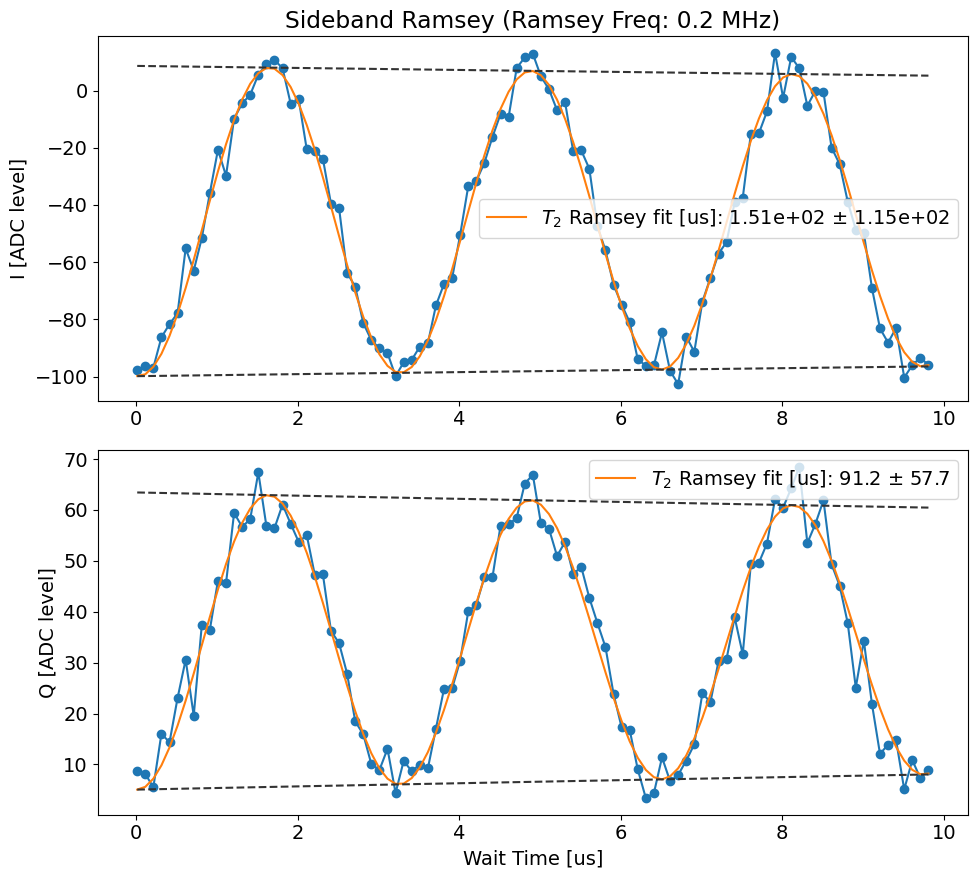

In [27]:
expt_params = dict(
    start = 0.01, # wait time tau [us]
    step = 0.1,  # [us] 1 cycle is 0.0023251488095238095 [us], 2.7901785714285716 # [us]=1200 cycles
    expts = 100,
    ramsey_freq = 0.2, # [MHz]
    detune = 0,
    ac_stark=0.5, # [MHz] not sure how to define sign yet
    # but in any case this needs to be smaller than ramsey_freq
    # because qick can't handle negative numbers
    reps = 100,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    stor_no = 1, # storage mode number, 1 to 7
    normalize = False,
    active_reset = True,
    man_reset = True, 
    storage_reset = True, 
    advance_phase = 0, # advance phase of second pi/2 by this much [degrees]
    echoes = [False, 0], # [on/off, number of echoes]
)

sbr = SidebandRamseyExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"SidebandRamsey_M1S{expt_params['stor_no']}",
    config_file=config_path,
    expt_params = expt_params,
    progress=True)

sbr.cfg.device.readout.relax_delay = [200]  # Wait time between experiments [us]
# sbr.acquire()
sbr.go(analyze=True, display=True, progress=True, save=True)

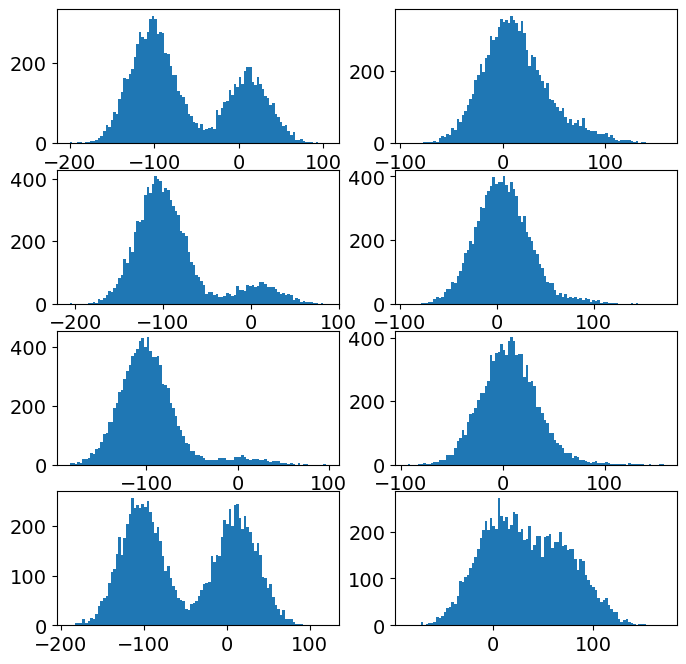

In [28]:
idata = sbr.data['idata']
idata = idata.reshape((len(idata)//4,4))

qdata = sbr.data['qdata']
qdata = qdata.reshape((len(qdata)//4,4))

fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(8,8))
for kk in range(4):
    axs[kk,0].hist(idata[:,kk], bins=100)
    axs[kk,1].hist(qdata[:,kk], bins=100)
None

In [ ]:
0.327922332524605 # current reset version
0.32806373843420333 # without reset
0.3264759424279595 # reset with 100us wait
0.3274569103286323 # only 0 to N+1
0.328382941835013 # only -N to 0
0.327225195204317 # only 0
0.325693135972055 # n set to 30
0.32566986782848 # add 100 to m1d1

### 2D chevron

In [32]:
from multimode_expts.experiments.qsim.sideband_ramsey import SidebandChevronExperiment

In [33]:
expt_params = dict(
    start = 0.01, # wait time tau [us]
    step = 0.05,  # [us] 1 cycle is 0.0023251488095238095 [us], 2.7901785714285716 # [us]=1200 cycles
    expts = 100,
    ramsey_freq = 0.1, # [MHz]
    ac_stark=0.5,
    detune = 0,
    reps = 100,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    stor_no = 1, # storage mode number, 1 to 7
    normalize = False,
    active_reset = False,
    # man_reset = False, 
    # storage_reset = False, 
    advance_phase = 0, # advance phase of second pi/2 by this much [degrees]
    echoes = [False, 0], # [on/off, number of echoes]
)

for stor_no in [5]: #range(1,8):
    expt_params['stor_no'] = stor_no
    sbr = SidebandChevronExperiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"SidebandChevron_M1S{stor_no}",
        config_file=config_path,
        expt_params = expt_params,
        progress=True)
    
    # sbr.acquire()
    sbr.go(analyze=False, display=False, progress=True, save=True)

  0%|          | 0/51 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [85]:
sbr.data.keys()

dict_keys(['avgi', 'avgq', 'amps', 'phases', 'idata', 'qdata', 'xpts', 'ypts'])

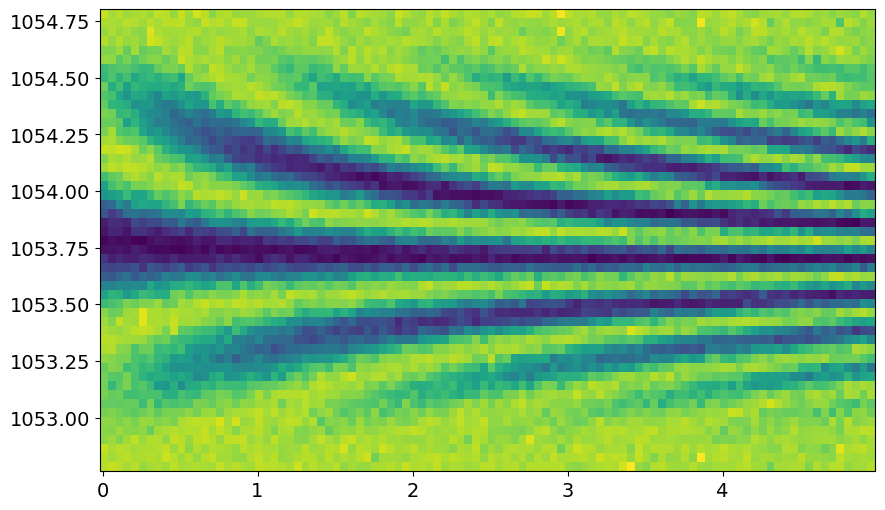

In [ ]:
plt.pcolormesh(sbr.data['xpts'], sbr.data['ypts'], sbr.data['avgi'])

## Sideband scramble

In [34]:
from multimode_expts.experiments.qsim.sideband_scramble import SidebandScrambleProgram

In [35]:
meas_stors = [2, 3, 7]

for update_phases in [True]: # [False, True]:
    for meas_stor in meas_stors:
        expt_params = dict(
            expts = 1,
            reps = 100,
            rounds = 1,
            qubits = [0],
            f0g1_cavity = 1,  #  name of manipulate cavity (1 or 2)
            init_stor = 0, # storage mode number to initialize to n=1 Fock state
            ro_stor = meas_stor, # storage mode number that gets read out in the end
            # if 0, this means to read out man instead
            floquet_cycles = list(range(0, 101)),
            detune=0,
            normalize = False,
            active_reset = False,
            man_reset = True, 
            storage_reset = True, 
            # advance_phase=3,
            # swept_params = ['advance_phase', 'floquet_cycle'],
            swept_params = ['floquet_cycle'],
            swap_stors = [2, 3, 7],
            floquet_dataset_filename = 'floquet_storage_2Derramp.csv',
            update_phases = update_phases, 
            echoes = [False, 0], # [on/off, number of echoes]
        )
    
        sbs = meas.QsimBaseExperiment(
            soccfg=soc,
            path=expt_path,
            prefix=f"SidebandScramble_S{expt_params['init_stor']}_to_S{expt_params['ro_stor']}",
            config_file=config_path,
            expt_params = expt_params,
            program = meas.SidebandScrambleProgram,
            progress=True)
    
        sbs.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
        sbs.go(analyze=False, display=True, progress=True, save=True)

  0%|          | 0/101 [00:00<?, ?it/s]

AttributeError: 'AttrDict' object has no attribute 'prepulse'

### Phase calibration using quantum walk

In [47]:
from multimode_expts.experiments.qsim.sideband_scramble import FloquetCalibrationProgram

  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00001_FloquetCalibration_S1_to_S3.h5


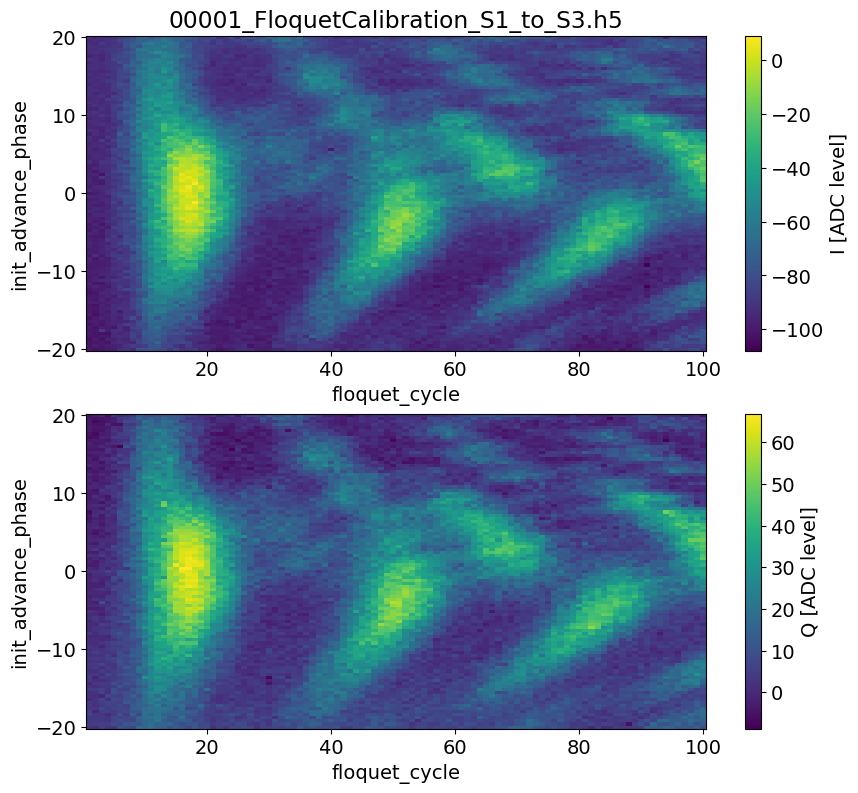

In [50]:
expt_params = dict(
    expts = 1,
    reps = 200,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = 1, # storage mode number to initialize to n=1 Fock state
    ro_stor = 3, # storage mode number that gets read out in the end
    # if 0, this means to read out man instead
    floquet_cycles = list(range(1,101)),
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    init_advance_phases = np.linspace(-20,20,101).tolist(), # advance phase of each successive pulse for the init mode[degrees]
    ro_advance_phase = 5,
    # ro_advance_phases = np.linspace(-10,10,101).tolist(), # advance phase of each successive pulse for the ro mode [degrees]
    swept_params = ['init_advance_phase', 'floquet_cycle'],
    # swept_params = ['floquet_cycle'],
    echoes = [False, 0], # [on/off, number of echoes]
)

fce = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"FloquetCalibration_S{expt_params['init_stor']}_to_S{expt_params['ro_stor']}",
    config_file=config_path,
    expt_params = expt_params,
    program = FloquetCalibrationProgram,
    progress=True)

fce.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
fce.go(analyze=False, display=True, progress=True, save=True)

  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00001_FloquetCalibration_S3_to_S1.h5


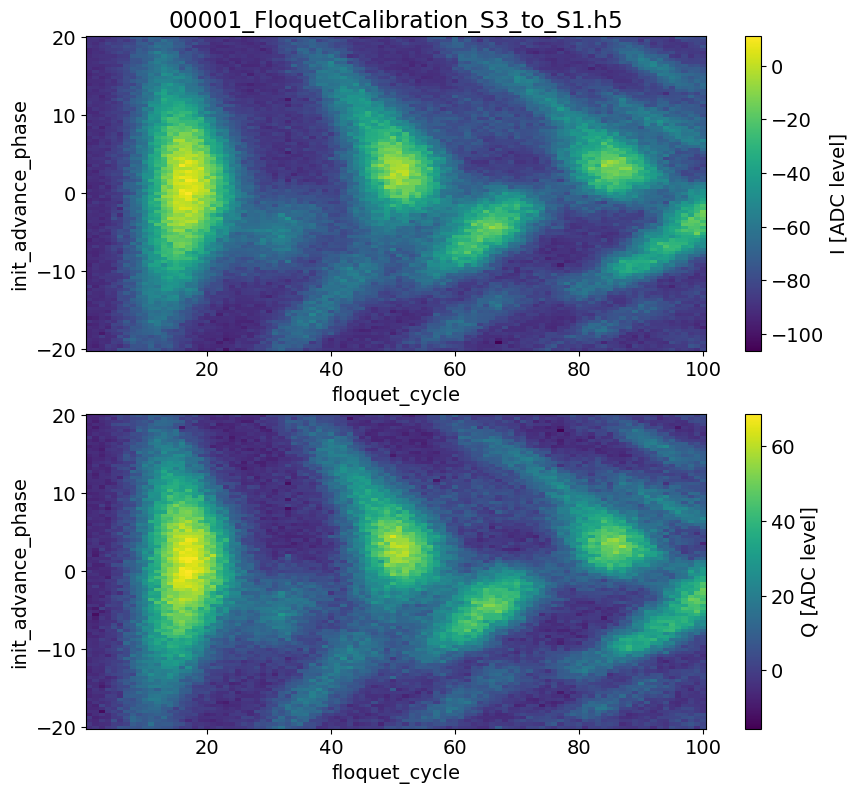

In [51]:
expt_params = dict(
    expts = 1,
    reps = 200,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = 3, # storage mode number to initialize to n=1 Fock state
    ro_stor = 1, # storage mode number that gets read out in the end
    # if 0, this means to read out man instead
    floquet_cycles = list(range(1,101)),
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    init_advance_phases = np.linspace(-20,20,101).tolist(), # advance phase of each successive pulse for the init mode[degrees]
    ro_advance_phase = -4,
    # ro_advance_phases = np.linspace(-10,10,101).tolist(), # advance phase of each successive pulse for the ro mode [degrees]
    swept_params = ['init_advance_phase', 'floquet_cycle'],
    # swept_params = ['floquet_cycle'],
    echoes = [False, 0], # [on/off, number of echoes]
)

fce = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"FloquetCalibration_S{expt_params['init_stor']}_to_S{expt_params['ro_stor']}",
    config_file=config_path,
    expt_params = expt_params,
    program = FloquetCalibrationProgram,
    progress=True)

fce.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
fce.go(analyze=False, display=True, progress=True, save=True)

  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00001_FloquetCalibration_S2_to_S3.h5


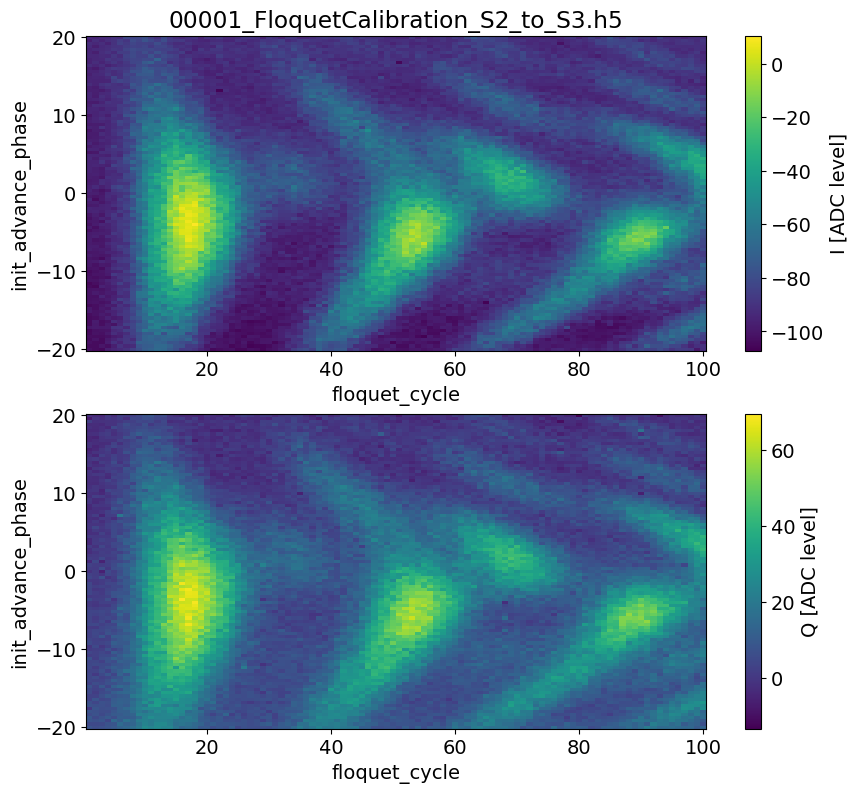

In [60]:
expt_params = dict(
    expts = 1,
    reps = 200,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = 2, # storage mode number to initialize to n=1 Fock state
    ro_stor = 3, # storage mode number that gets read out in the end
    # if 0, this means to read out man instead
    floquet_cycles = list(range(1,101)),
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    init_advance_phases = np.linspace(-20,20,101).tolist(), # advance phase of each successive pulse for the init mode[degrees]
    ro_advance_phase = 6,
    # ro_advance_phases = np.linspace(-10,10,101).tolist(), # advance phase of each successive pulse for the ro mode [degrees]
    swept_params = ['init_advance_phase', 'floquet_cycle'],
    # swept_params = ['floquet_cycle'],
    echoes = [False, 0], # [on/off, number of echoes]
)

fce = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"FloquetCalibration_S{expt_params['init_stor']}_to_S{expt_params['ro_stor']}",
    config_file=config_path,
    expt_params = expt_params,
    program = FloquetCalibrationProgram,
    progress=True)

fce.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
fce.go(analyze=False, display=True, progress=True, save=True)

  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00001_FloquetCalibration_S3_to_S2.h5


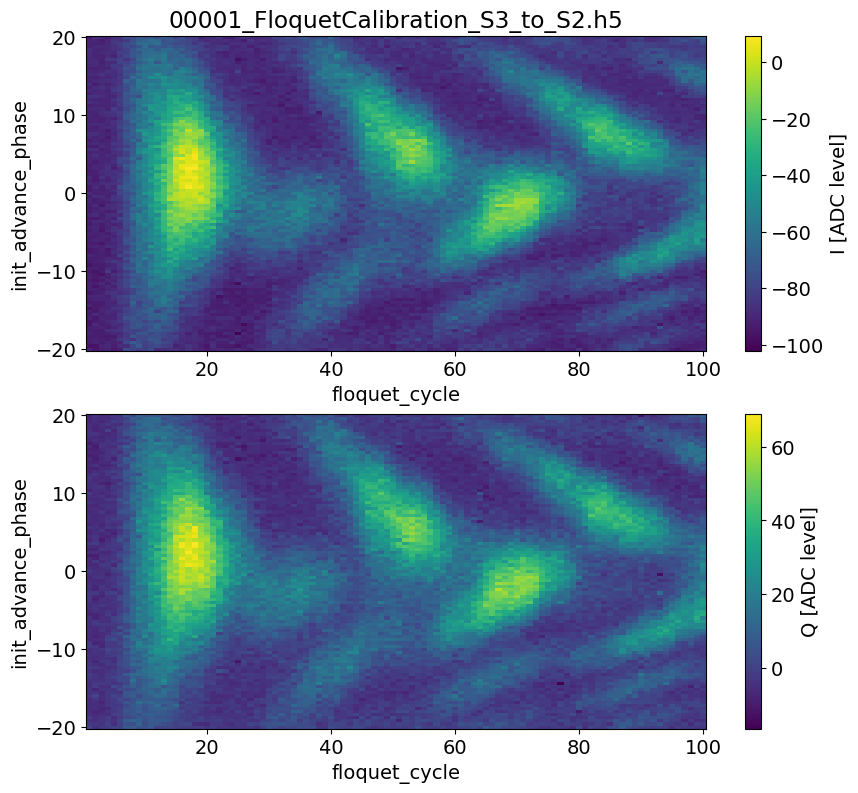

In [61]:
expt_params = dict(
    expts = 1,
    reps = 200,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = 3, # storage mode number to initialize to n=1 Fock state
    ro_stor = 2, # storage mode number that gets read out in the end
    # if 0, this means to read out man instead
    floquet_cycles = list(range(1,101)),
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    init_advance_phases = np.linspace(-20,20,101).tolist(), # advance phase of each successive pulse for the init mode[degrees]
    ro_advance_phase = -8,
    # ro_advance_phases = np.linspace(-10,10,101).tolist(), # advance phase of each successive pulse for the ro mode [degrees]
    swept_params = ['init_advance_phase', 'floquet_cycle'],
    # swept_params = ['floquet_cycle'],
    echoes = [False, 0], # [on/off, number of echoes]
)

fce = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"FloquetCalibration_S{expt_params['init_stor']}_to_S{expt_params['ro_stor']}",
    config_file=config_path,
    expt_params = expt_params,
    program = FloquetCalibrationProgram,
    progress=True)

fce.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
fce.go(analyze=False, display=True, progress=True, save=True)

  0%|          | 0/60 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00012_SidebandScramble_S1_to_S2.h5


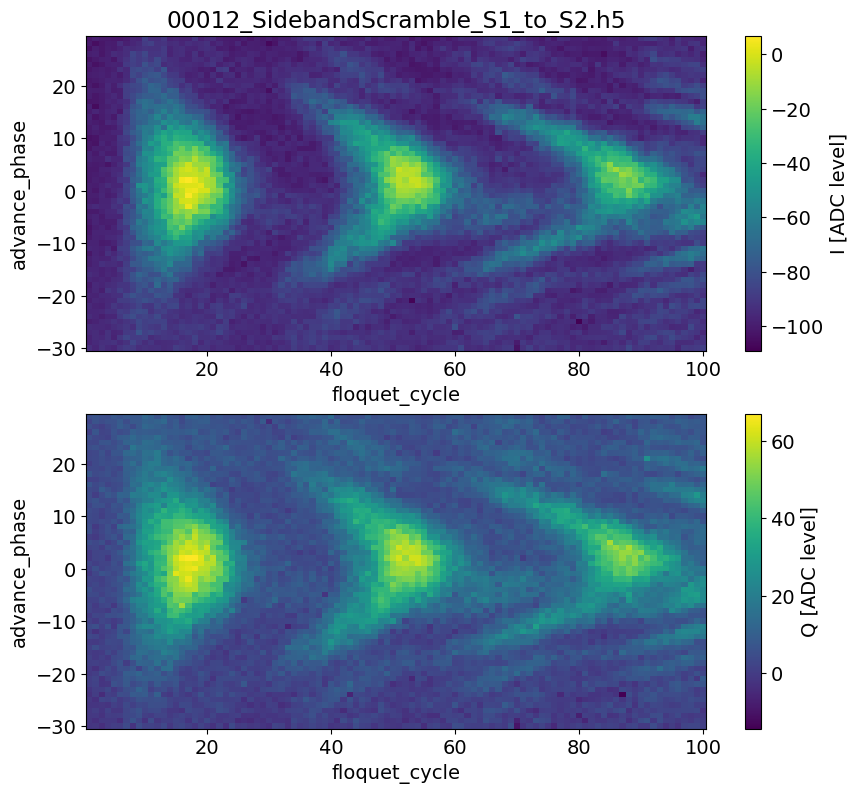

In [ ]:
expt_params = dict(
    expts = 1,
    reps = 200,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = 1, # storage mode number to initialize to n=1 Fock state
    ro_stor = 3, # storage mode number that gets read out in the end
    # if 0, this means to read out man instead
    floquet_cycles = list(range(1,101)),
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    init_advance_phases = list(range(-10,10,0.5)), # advance phase of each successive pulse [degrees]
    ro_advance_phases = list(range(-1k,30,1)), # advance phase of each successive pulse [degrees]
    # advance_phase=0,
    swept_params = ['advance_phase', 'floquet_cycle'],
    # swept_params = ['floquet_cycle'],
    # swap_stors = [1, 2],
    # update_phases = True, 
    echoes = [False, 0], # [on/off, number of echoes]
)

sbs = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"SidebandScramble_S{expt_params['init_stor']}_to_S{expt_params['ro_stor']}",
    config_file=config_path,
    expt_params = expt_params,
    program = SidebandScrambleProgram,
    progress=True)

sbs.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
sbs.go(analyze=False, display=True, progress=True, save=True)

  0%|          | 0/60 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00013_SidebandScramble_S1_to_S2.h5


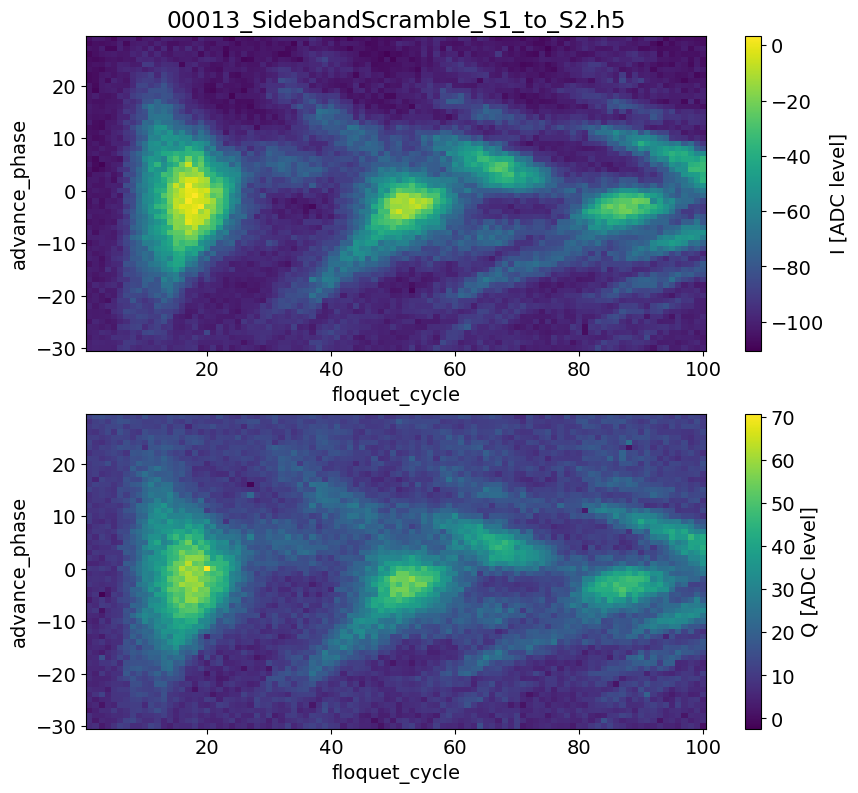

In [46]:
expt_params = dict(
    expts = 1,
    reps = 200,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = 1, # storage mode number to initialize to n=1 Fock state
    ro_stor = 2, # storage mode number that gets read out in the end
    # if 0, this means to read out man instead
    floquet_cycles = list(range(1,101)),
    # gain_div = 3,
    # length_div = 2,
    # detune=0,
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    advance_phases = list(range(-30,30,1)), # advance phase of each successive pulse [degrees]
    # advance_phase=0,
    swept_params = ['advance_phase', 'floquet_cycle'],
    # swept_params = ['floquet_cycle'],
    # swap_stors = [1, 2],
    # update_phases = True, 
    echoes = [False, 0], # [on/off, number of echoes]
)

sbs = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"SidebandScramble_S{expt_params['init_stor']}_to_S{expt_params['ro_stor']}",
    config_file=config_path,
    expt_params = expt_params,
    program = SidebandScrambleProgram,
    progress=True)

sbs.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
sbs.go(analyze=False, display=True, progress=True, save=True)

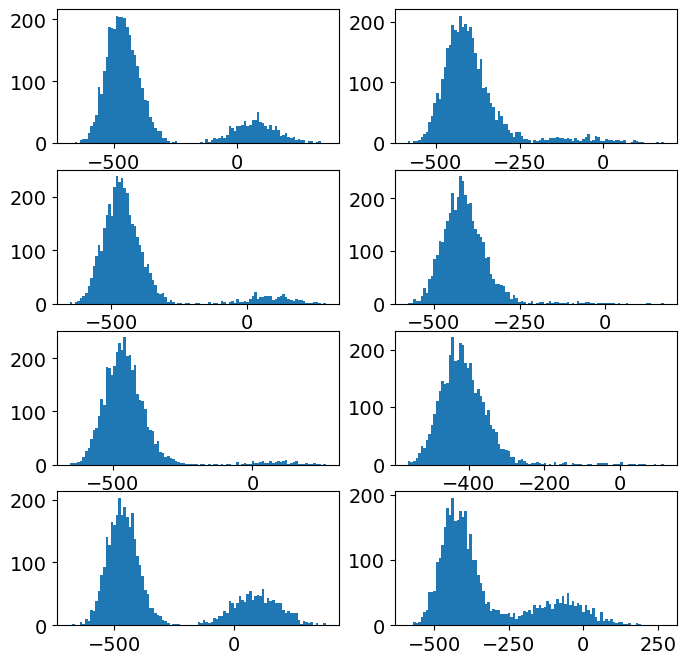

In [98]:
idata = np.array(sbs.data['idata']).ravel()
idata = idata.reshape((len(idata)//4,4))

qdata = np.array(sbs.data['qdata']).ravel()
qdata = qdata.reshape((len(qdata)//4,4))

fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(8,8))
for kk in range(4):
    axs[kk,0].hist(idata[:,kk], bins=100)
    axs[kk,1].hist(qdata[:,kk], bins=100)
None

In [263]:
for init_stor in range(3,8):
    # for ro_stor in range(8):
    ro_stor = 0
    for detune in np.linspace(-0.2,0.2,21):
        expt_params = dict(
            expts = 1,
            reps = 1000,
            rounds = 1,
            qubits = [0],
            f0g1_cavity = 1,  #  1/2 name of manipulate cavity
            init_stor = init_stor, # storage mode number to initialize to n=1 Fock state
            ro_stor = ro_stor, # storage mode number that gets read out in the end
            # if 0, this means to read out man instead
            floquet_cycles = list(range(1,101)),
            detune=detune,
            normalize = False,
            active_reset = True,
            man_reset = True, 
            storage_reset = True, 
            advance_phase = 0, # advance phase of second pi/2 by this much [degrees]
            echoes = [False, 0], # [on/off, number of echoes]
        )
        
        sbs = SidebandScrambleExperiment(
            soccfg=soc,
            path=expt_path,
            prefix=f"SidebandScramble_S{expt_params['init_stor']}_to_S{expt_params['ro_stor']}",
            config_file=config_path,
            expt_params = expt_params,
            progress=True)
        
        sbs.cfg.device.readout.relax_delay = [200]  # Wait time between experiments [us]
        sbs.go(analyze=False, display=False, progress=False, save=True)

Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00000_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00001_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00002_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00003_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00004_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00005_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00006_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00007_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00008_SidebandScramble_S3_to_S0.h5
Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00009_SidebandS

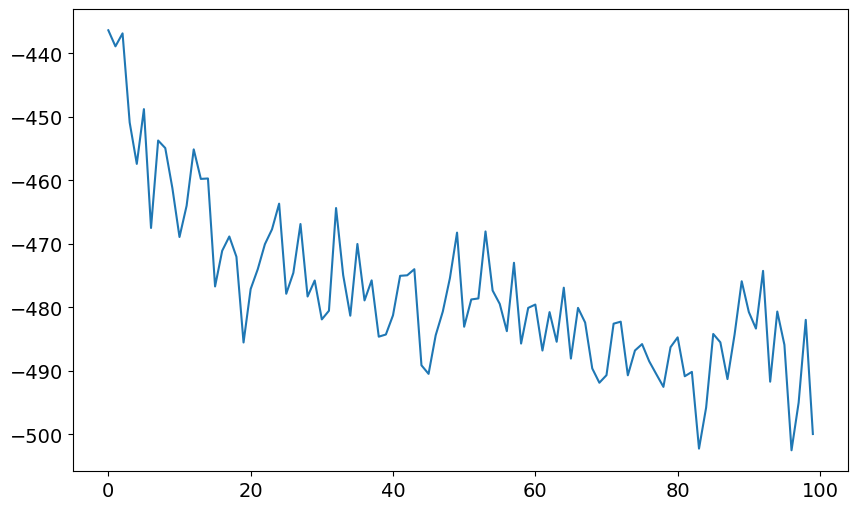

In [259]:
plt.plot(ss[9].data['avgi'])

## Amplitude Rabi

In [11]:
from multimode_expts.experiments.qsim.sideband_amp_rabi import SidebandAmpRabiExperiment

importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qsim
imported experiments.qsim.floquet_general
imported experiments.qsim.qsim_base
imported experiments.qsim.qsim_experiments
imported experiments.qsim.sideband_amp_rabi
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_ramsey_scramble
imported experiments.qsim.sideband_scramble
imported experiments.qsim.utils
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demoluti

In [47]:
for init_stor in range(1,8):
    ro_stor = 0
    expt_params = dict(
        expts = 1,
        reps = 500,
        rounds = 1,
        qubits = [0],
        f0g1_cavity = 1,  #  1/2 name of manipulate cavity
        init_stor = init_stor, # storage mode number to initialize to n=1 Fock state
        ro_stor = ro_stor, # storage mode number that gets read out in the end
        # if 0, this means to read out man instead
        detunes=np.linspace(-2,2,101).tolist(),
        gains=list(range(0,20000,100)),
        length=3, # us rabi pulse legnth
        normalize = False,
        active_reset = True,
        man_reset = True, 
        storage_reset = True, 
        advance_phase = 0, # advance phase of second pi/2 by this much [degrees]
        echoes = [False, 0], # [on/off, number of echoes]
    )
    
    sare = SidebandAmpRabiExperiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"SidebandAmpRabi_S{expt_params['init_stor']}",
        config_file=config_path,
        expt_params = expt_params,
        progress=True)
    
    sare.cfg.device.readout.relax_delay = [200]  # Wait time between experiments [us]
    sare.go(analyze=False, display=False, progress=True, save=True)

  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00000_SidebandAmpRabi_S1.h5


  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00000_SidebandAmpRabi_S2.h5


  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00000_SidebandAmpRabi_S3.h5


  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00000_SidebandAmpRabi_S4.h5


  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00000_SidebandAmpRabi_S5.h5


  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00000_SidebandAmpRabi_S6.h5


  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data\00000_SidebandAmpRabi_S7.h5


## Find phase offset for ramsey

In [14]:
from multimode_expts.experiments.qsim.sideband_stark import SidebandStarkExperiment, SidebandStarkProgram

In [15]:
# for init_stor in range(1, 8):
for init_stor in range(1, 3):
    ro_stor = 0
    expt_params = dict(
        expts = 1,
        reps = 100,
        rounds = 1,
        qubits = [0],
        f0g1_cavity = 1,  #  1/2 name of manipulate cavity
        init_stor = init_stor, # storage mode number to initialize to n=1 Fock state
        ro_stor = ro_stor, # storage mode number that gets read out in the end
        # if 0, this means to read out man instead
        # detunes=np.linspace(-0.1,0.1,101).tolist(),
        detune = 0,
        advance_phases=np.linspace(-90,90,31).tolist(),
        # wait=10, # wait time between two hpi pulses in us
        waits = np.linspace(0,30,31).tolist(),
        swept_params = ['advance_phase', 'wait'],
        # usage: if you want to sweep cfg.expt.paramName, 
        # include paramName here in this list 
        # AND include cfg.expt.paramNames (note the s) as a list of values to step thru.
        # (You want a list instead of numpy array for better yaml export.)
        # Currently handles 1D and 2D sweeps and plots only.
        # For 2D, order is [outer, inner].
        normalize = False,
        active_reset = False,
        man_reset = True, 
        storage_reset = True, 
        # advance_phase = 0, # advance phase of second pi/2 by this much [degrees]
        echoes = [False, 0], # [on/off, number of echoes]
    )
    
    sta = SidebandStarkExperiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"SidebandStark_S{expt_params['init_stor']}",
        config_file=config_path,
        expt_params = expt_params,
        program=SidebandStarkProgram,
        progress=True)
    
    sta.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
    sta.go(analyze=False, display=False, progress=True, save=True)

  0%|          | 0/31 [00:00<?, ?it/s]

pulse param ['ge', 'hpi', 0]
channel name qubit
pulse param ['ge', 'parity_M1', 0]
channel name qubit
pulse param ['ge', 'hpi', 180]
channel name qubit
pulse param ['ge', 'pi', 0]
channel name qubit
pulse param ['ef', 'pi', 0]
channel name qubit
pulse param ['M1', 'pi', 0]
channel name man
pulse param ['M1-S1', 'pi', 0]
channel name storage
pulse_data [[3571.6994214615424 3428.4457610447353 2011.6693654525284
  348.702401768369]
 [3429 2770 8000 3000]
 [0.0 0.0 0.5408883810926033 0.9174265564762912]
 [0 0 0 0]
 [2 2 0 1]
 ['gauss' 'gauss' 'flat_top' 'flat_top']
 [0.035 0.035 0.005 0.005]]
pulse param ['M1', 'pi', 0]
channel name man
pulse_data [[2011.6693654525284]
 [8000]
 [0.5408883810926033]
 [0]
 [0]
 ['flat_top']
 [0.005]]
pulse param ['ge', 'hpi', 0]
channel name qubit
pulse param ['ge', 'parity_M1', 0]
channel name qubit
pulse param ['ge', 'hpi', 180]
channel name qubit
pulse param ['ge', 'pi', 0]
channel name qubit
pulse param ['ef', 'pi', 0]
channel name qubit
pulse param ['M1

  0%|          | 0/31 [00:00<?, ?it/s]

pulse param ['ge', 'hpi', 0]
channel name qubit
pulse param ['ge', 'parity_M1', 0]
channel name qubit
pulse param ['ge', 'hpi', 180]
channel name qubit
pulse param ['ge', 'pi', 0]
channel name qubit
pulse param ['ef', 'pi', 0]
channel name qubit
pulse param ['M1', 'pi', 0]
channel name man
pulse param ['M1-S2', 'pi', 0]
channel name storage
pulse_data [[3571.6994214615424 3428.4457610447353 2011.6693654525284
  520.1370383281906]
 [3429 2770 8000 5000]
 [0.0 0.0 0.5408883810926033 1.084581933496189]
 [0 0 0 0]
 [2 2 0 1]
 ['gauss' 'gauss' 'flat_top' 'flat_top']
 [0.035 0.035 0.005 0.005]]
pulse param ['M1', 'pi', 0]
channel name man
pulse_data [[2011.6693654525284]
 [8000]
 [0.5408883810926033]
 [0]
 [0]
 ['flat_top']
 [0.005]]
pulse param ['ge', 'hpi', 0]
channel name qubit
pulse param ['ge', 'parity_M1', 0]
channel name qubit
pulse param ['ge', 'hpi', 180]
channel name qubit
pulse param ['ge', 'pi', 0]
channel name qubit
pulse param ['ef', 'pi', 0]
channel name qubit
pulse param ['M1

c:\Users\26049\.conda\envs\slab\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


AC Stark freq: 0.199627MHz


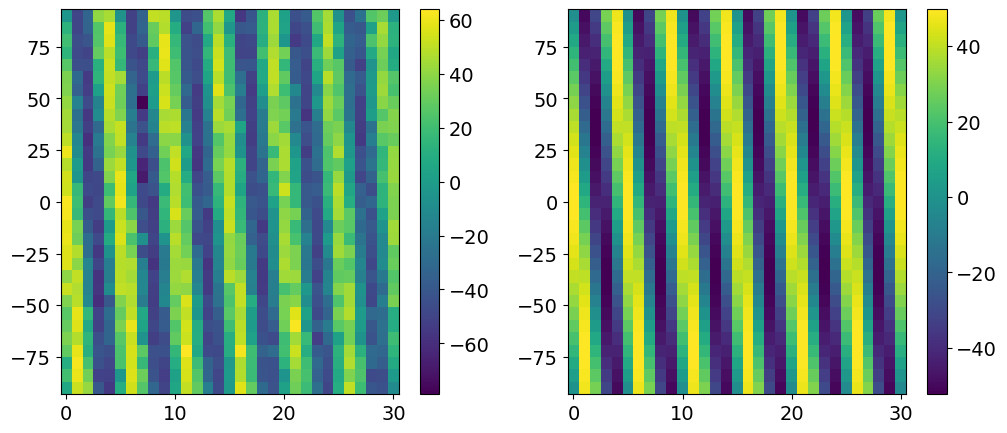

In [17]:
sta.analyze()

In [19]:
for init_stor in [1]: #range(1,8):
    ro_stor = 0
    expt_params = dict(
        expts = 1,
        reps = 500,
        rounds = 1,
        qubits = [0],
        f0g1_cavity = 1,  #  1/2 name of manipulate cavity
        init_stor = init_stor, # storage mode number to initialize to n=1 Fock state
        ro_stor = ro_stor, # storage mode number that gets read out in the end
        # if 0, this means to read out man instead
        # detunes=np.linspace(-0.1,0.1,101).tolist(),
        detune = 0,
        phases=np.linspace(-90,90,91).tolist(),
        # wait=10, # wait time between two hpi pulses in us
        waits = np.linspace(0,2,51).tolist(),
        swept_params = ['phase', 'wait'],
        # usage: if you want to sweep cfg.expt.paramName, 
        # include paramName here in this list 
        # AND include cfg.expt.paramNames (note the s) as a list of values to step thru.
        # (You want a list instead of numpy array for better yaml export.)
        # Currently handles 1D and 2D sweeps and plots only.
        # For 2D, order is [outer, inner].
        normalize = False,
        active_reset = True,
        man_reset = True, 
        storage_reset = True, 
        advance_phase = 0, # advance phase of second pi/2 by this much [degrees]
        echoes = [False, 0], # [on/off, number of echoes]
    )
    
    sta = SidebandStarkExperiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"SidebandStark_S{expt_params['init_stor']}",
        config_file=config_path,
        expt_params = expt_params,
        progress=True)
    
    sta.cfg.device.readout.relax_delay = [200]  # Wait time between experiments [us]
    sta.go(analyze=False, display=False, progress=True, save=True)

  0%|          | 0/91 [00:00<?, ?it/s]

KeyboardInterrupt: 

### new base class general 2D

In [20]:
from multimode_expts.experiments.qsim.sideband_stark import SidebandStarkProgram
from multimode_expts.experiments.qsim.qsim_base import QsimBaseExperiment

  0%|          | 0/101 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data\00002_SidebandStark_S2.h5


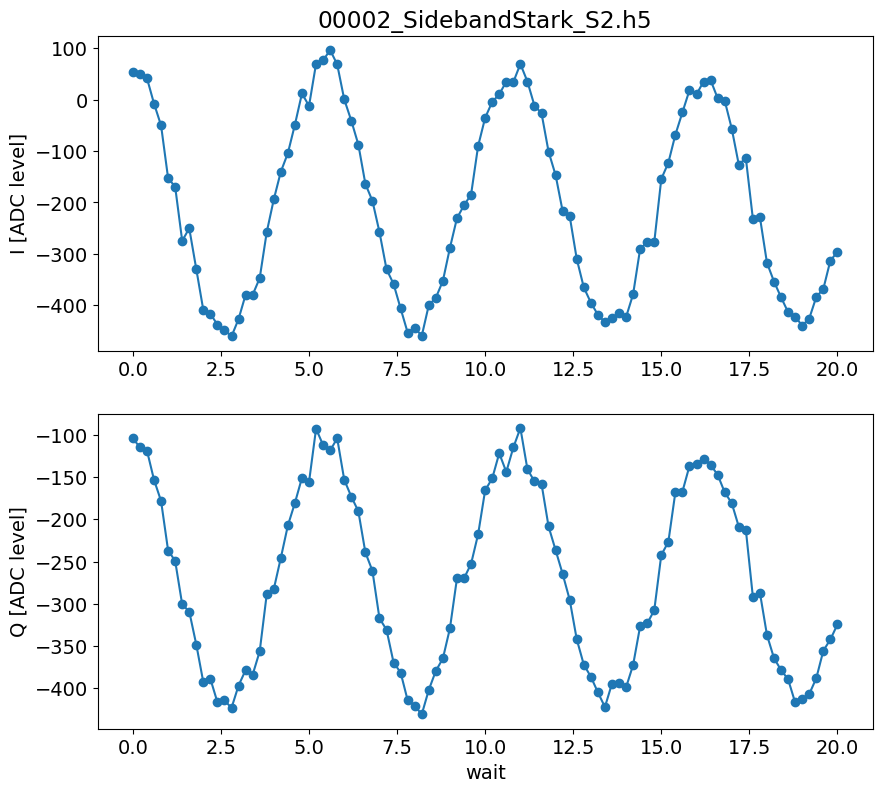

In [106]:
for init_stor in [2]: #range(1,8):
    ro_stor = 0
    expt_params = dict(
        expts = 1,
        reps = 100,
        rounds = 1,
        qubits = [0],
        f0g1_cavity = 1,  #  1/2 name of manipulate cavity
        init_stor = init_stor, # storage mode number to initialize to n=1 Fock state
        ro_stor = ro_stor, # storage mode number that gets read out in the end
        # if 0, this means to read out man instead
        detune = 0,
        # detunes=np.linspace(-0.1,0.1,101).tolist(),
        advance_phase = 0, # advance phase of second pi/2 by this much [degrees]
        # advance_phases=np.linspace(-90,90,91).tolist(),
        # wait=10, # wait time between two hpi pulses in us
        waits = np.linspace(0,20,101).tolist(),
        swept_params = ['wait'],
        # usage: if you want to sweep cfg.expt.paramName, 
        # include paramName here in this list 
        # AND include cfg.expt.paramNames (note the s) as a list of values to step thru.
        # (You want a list instead of numpy array for better yaml export.)
        # Currently handles 1D and 2D sweeps and plots only.
        # For 2D, order is [outer, inner].
        normalize = False,
        active_reset = False,
        man_reset = True, 
        storage_reset = True, 
        echoes = [False, 0], # [on/off, number of echoes]
    )
    
    qbe = QsimBaseExperiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"SidebandStark_S{expt_params['init_stor']}",
        config_file=config_path,
        expt_params=expt_params,
        program=SidebandStarkProgram,
        progress=True)
    
    qbe.cfg.device.readout.relax_delay = [8000]  # Wait time between experiments [us]
    qbe.go(analyze=False, display=True, progress=True, save=True)

### T1

In [ ]:
from multimode_expts.experiments.qsim.sideband_scramble import StorageT1Program

  0%|          | 0/51 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00003_StorageT1_S0.h5


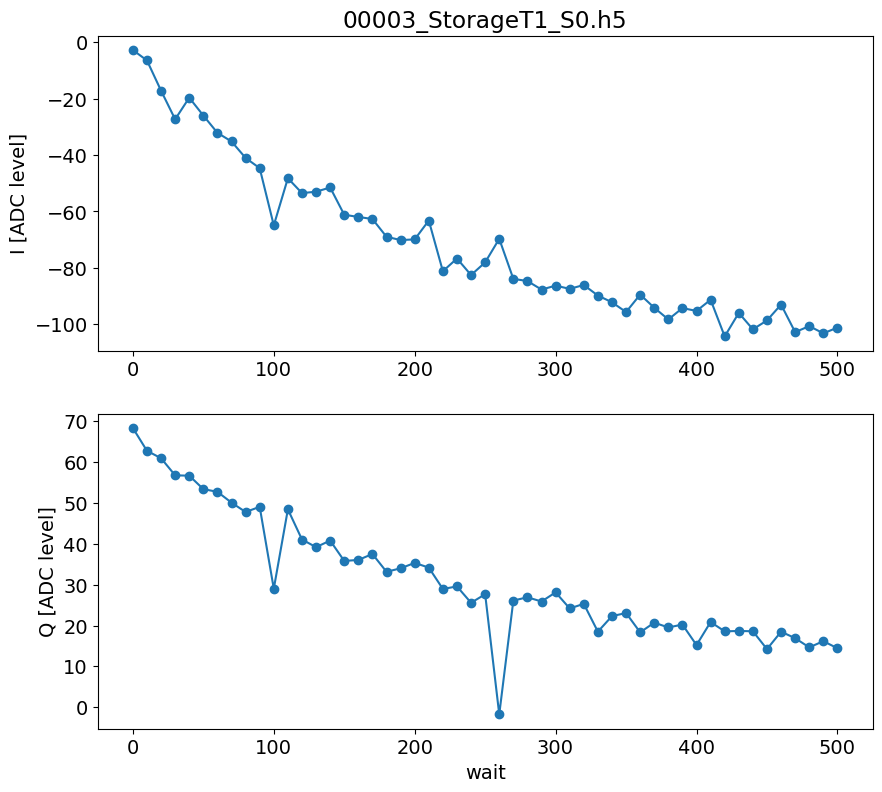

In [53]:
init_stor = 0
expt_params = dict(
    expts = 1,
    reps = 200,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = init_stor, # storage mode number to initialize to n=1 Fock state
    ro_stor = init_stor, # storage mode number that gets read out in the end
    # if 0, this means to read out man instead
    # wait=10, # wait time between two hpi pulses in us
    waits = np.linspace(0,500,51).tolist(),
    swept_params = ['wait'],
    # usage: if you want to sweep cfg.expt.paramName, 
    # include paramName here in this list 
    # AND include cfg.expt.paramNames (note the s) as a list of values to step thru.
    # (You want a list instead of numpy array for better yaml export.)
    # Currently handles 1D and 2D sweeps and plots only.
    # For 2D, order is [outer, inner].
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    prepulse = True,
    postpulse = True,
    echoes = [False, 0], # [on/off, number of echoes]
)

qbe = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"StorageT1_S{expt_params['init_stor']}",
    config_file=config_path,
    expt_params=expt_params,
    program=StorageT1Program,
    progress=True)

qbe.cfg.device.readout.relax_delay = [5000]  # Wait time between experiments [us]
qbe.go(analyze=False, display=True, progress=True, save=True)

# Kerr engineering

In [ ]:
from multimode_expts.experiments.qsim.kerr import KerrEngBaseProgram

  0%|          | 0/200 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00014_KerrQBHeating.h5


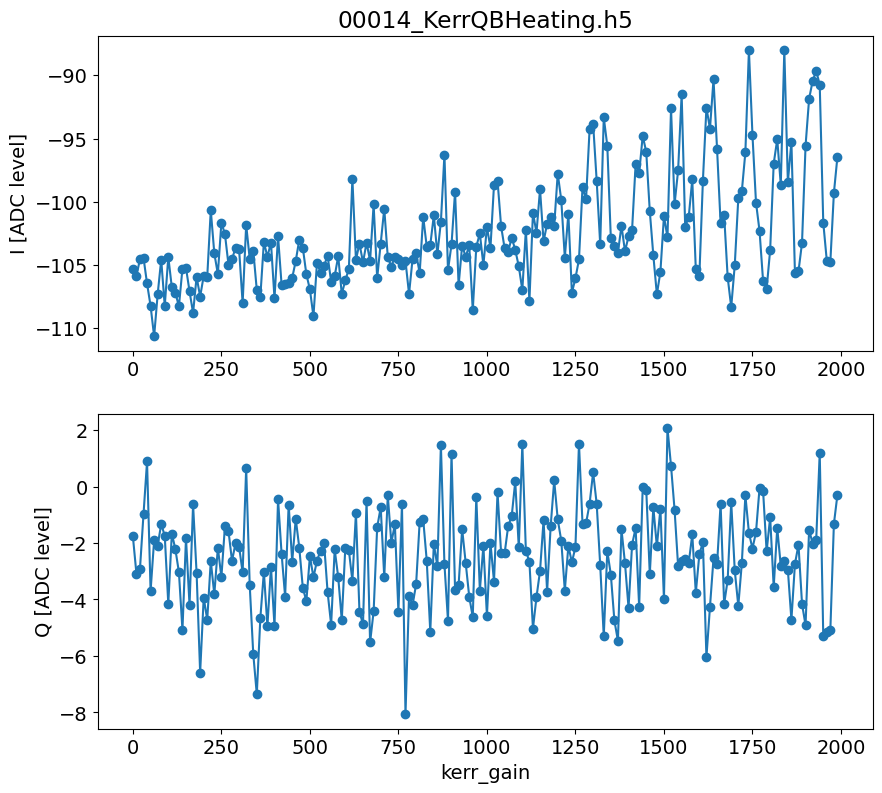

In [21]:
expt_params = dict(
    expts = 1,
    reps = 200,
    rounds = 1,
    qubits = [0],
    f0g1_cavity = 1,  #  1/2 name of manipulate cavity
    init_stor = 0, # storage mode number to initialize to n=1 Fock state
    ro_stor = 0, # storage mode number that gets read out in the end
    # if 0, this means to read out man instead
    normalize = False,
    active_reset = False,
    man_reset = True, 
    storage_reset = True, 
    echoes = [False, 0], # [on/off, number of echoes]
    # === new class
    # kerr_gain = 1000,
    kerr_detune = -10,
    kerr_length = 10,
    swept_params = ['kerr_gain'],
    # kerr_lengths = np.linspace(0.007,5,21).tolist(),
    kerr_gains = np.arange(0,2000,10).tolist(),
    prepulse = False,
    postpulse = False,
)

qbe = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"KerrQBHeating",
    config_file=config_path,
    expt_params=expt_params,
    program=KerrEngBaseProgram,
    progress=True)

qbe.cfg.device.readout.relax_delay = [2000]  # Wait time between experiments [us]
qbe.go(analyze=False, display=True, progress=True, save=True)

## Cavity Ramsey 

This is to find out $\chi$, $\chi'$, $\Delta$ and $K_c$

In [34]:
def do_cavity_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,           # start delay
    step=0.05,            # step size
    expts=200,            # number of experiments
    ramsey_freq=3.7,      # Ramsey frequency
    reps=100,              # repetitions
    rounds=1,             # rounds
    qubits=[0],           # qubits
    checkEF=False,        # check EF
    f0g1_cavity=0,        # f0g1 cavity
    init_gf=False,        # initialize gf
    active_reset=False,   # active reset
    man_reset=True,       # manipulate reset
    storage_reset=True,   # storage reset
    user_defined_pulse=None, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
    parity_meas=True,     # parity measurement
    man_mode_no=1,            
    storage_ramsey=[False, 2, True], # storage Ramsey
    man_ramsey=None,      # manipulate Ramsey
    coupler_ramsey=False, # coupler Ramsey
    custom_coupler_pulse=None, # custom coupler pulse
    echoes=[False, 0],    # echoes
    prepulse=False,       # prepulse
    postpulse=False,      # postpulse
    gate_based=False,     # gate based
    pre_sweep_pulse=None, # pre sweep pulse
    post_sweep_pulse=None,# post sweep pulse
    prep_e_first = True,
    relax_delay=2500      # relax delay
):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    if user_defined_pulse is None:
        user_defined_pulse = [True, config_thisrun.device.manipulate.f_ge[man_mode_no-1], 10, 
                                config_thisrun.device.manipulate.displace_sigma[man_mode_no-1], 0,
                                  4]
        
    #[on/off, freq, gain, sigma (mus), phase, channel] 
    if man_ramsey is None:
        man_ramsey = [False, man_mode_no -1]
    if custom_coupler_pulse is None:
        custom_coupler_pulse = [[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]]
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []
    if post_sweep_pulse is None:
        post_sweep_pulse = []

    cavity_ramsey = meas.single_qubit.t2_cavity.CavityRamseyExperiment(
        soccfg=soc, path=expt_path, prefix='CavityRamseyExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    cavity_ramsey.cfg.expt = dict(
        start=start,                    # start delay
        step=step,                      # step size
        expts=expts,                    # number of experiments
        ramsey_freq=ramsey_freq,        # Ramsey frequency
        reps=reps,                      # repetitions
        rounds=rounds,                  # rounds
        qubits=qubits,                  # qubits
        checkEF=checkEF,                # check EF
        f0g1_cavity=f0g1_cavity,        # f0g1 cavity
        init_gf=init_gf,                # initialize gf
        active_reset=active_reset,      # active reset
        man_reset=man_reset,            # manipulate reset
        storage_reset=storage_reset,    # storage reset
        user_defined_pulse=user_defined_pulse, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
        parity_meas=parity_meas,        # parity measurement
        man_mode_no=man_mode_no,                # manipulate index
        storage_ramsey=storage_ramsey,  # storage Ramsey
        man_ramsey=man_ramsey,          # manipulate Ramsey
        coupler_ramsey=coupler_ramsey,  # coupler Ramsey
        custom_coupler_pulse=custom_coupler_pulse, # custom coupler pulse
        echoes=echoes,                  # echoes
        prepulse=prepulse,              # prepulse
        postpulse=postpulse,            # postpulse
        gate_based=gate_based,          # gate based
        pre_sweep_pulse=pre_sweep_pulse,# pre sweep pulse
        post_sweep_pulse=post_sweep_pulse, # post sweep pulse
        prep_e_first=prep_e_first,  # prepare e first
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [relax_delay]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey

In [ ]:
cavity_ramsey = do_cavity_ramsey(
    config_thisrun=config_thisrun,
    expt_path=expt_path,
    config_path=config_file,
    man_mode_no=1, 
    ramsey_freq=1,
    step = 0.02, 
    expts = 100, 
    reps = 100,
    prep_e_first = False,
    # user_defined_pulse=[True, expts_base_inst.config_thisrun.device.manipulate.f_ge[0], 1500, 
    #                             expts_base_inst.config_thisrun.device.manipulate.displace_sigma[0],
    #                               0, 4])
    user_defined_pulse=[True, config_thisrun.device.manipulate.f_ge[0], 2000, 
                                config_thisrun.device.manipulate.displace_sigma[0],
                                  0, 4])


    #user defined pulse [on/off, freq, gain, sigma (mus), phase, channel] )

100


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00035_CavityRamseyExperiment.h5


No echoes in the data
Attempted to init fitparam 4 to -39.526406277056275, which is out of bounds -8.151926406926407 to 5.25439393939394. Instead init to -1.4487662337662335
Using user defined frequency: 4984.619558610203 MHz
Current pi pulse frequency: 4984.619558610203
Fit frequency from I [MHz]: 0.36424401901754655 +/- 0.0011338325591566745
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.655314591186
 	4985.383802629221
T2 Ramsey from fit I [us]: 68.42134499725387
Fit frequency from Q [MHz]: 0.35470452184700024 +/- 0.011681988196307986
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.664854088356
 	4985.37426313205
T2 Ramsey from fit Q [us]: 6.467222310401915


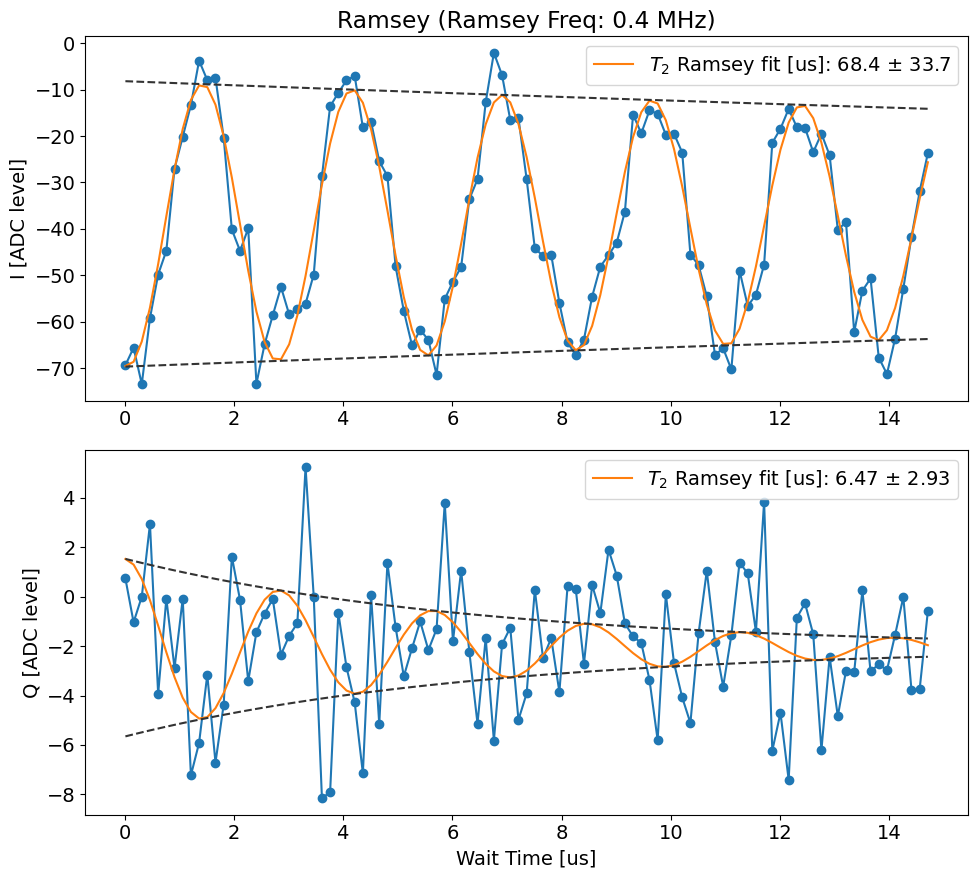

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-07_14-36-00_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-07.md


In [40]:
cavity_ramsey.analyze()
cavity_ramsey.display()

### vs gain

In [25]:
def do_cavity_ramsey_gain_sweep(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,           # start delay
    step=0.05,            # step size
    expts=200,            # number of experiments
    ramsey_freq=3.7,      # Ramsey frequency
    gain_start = 1000,  # start gain
    gain_step = 1000,      # step size for gain
    gain_expts = 5,        # number of experiments for gain
    reps=100,              # repetitions
    rounds=1,             # rounds
    qubits=[0],           # qubits
    checkEF=False,        # check EF
    f0g1_cavity=0,        # f0g1 cavity
    init_gf=False,        # initialize gf
    active_reset=False,   # active reset
    man_reset=True,       # manipulate reset
    storage_reset=True,   # storage reset
    user_defined_pulse=None, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
    parity_meas=True,     # parity measurement
    man_mode_no=1,            
    storage_ramsey=[False, 2, True], # storage Ramsey
    man_ramsey=None,      # manipulate Ramsey
    coupler_ramsey=False, # coupler Ramsey
    custom_coupler_pulse=None, # custom coupler pulse
    echoes=[False, 0],    # echoes
    prepulse=False,       # prepulse
    postpulse=False,      # postpulse
    gate_based=False,     # gate based
    pre_sweep_pulse=None, # pre sweep pulse
    post_sweep_pulse=None,# post sweep pulse
    relax_delay=2500,      # relax delay
    do_g_and_e=False, # do e-f first
):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    if user_defined_pulse is None:
        user_defined_pulse = [True,
                              config_thisrun.device.manipulate.f_ge[man_mode_no-1], 
                              1000, 
                              config_thisrun.device.manipulate.displace_sigma[man_mode_no-1], 
                              0,
                              4]
    #[on/off, freq, gain, sigma (mus), length, channel] 
    if man_ramsey is None:
        man_ramsey = [False, man_mode_no -1]
    if custom_coupler_pulse is None:
        custom_coupler_pulse = [[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]]
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []
    if post_sweep_pulse is None:
        post_sweep_pulse = []

    cavity_ramsey = meas.single_qubit.t2_cavity.CavityRamseyGainSweepExperiment(
        soccfg=soc, path=expt_path, prefix='CavityRamseyGainSweepExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    cavity_ramsey.cfg.expt = dict(
        start=start,                    # start delay
        step=step,                      # step size
        expts=expts,                    # number of experiments
        ramsey_freq=ramsey_freq,        # Ramsey frequency
        gain_start=gain_start,          # start gain
        gain_step=gain_step,            # step size for gain
        gain_expts=gain_expts,          # number of experiments for gain
        reps=reps,                      # repetitions
        rounds=rounds,                  # rounds
        qubits=qubits,                  # qubits
        checkEF=checkEF,                # check EF
        f0g1_cavity=f0g1_cavity,        # f0g1 cavity
        init_gf=init_gf,                # initialize gf
        active_reset=active_reset,      # active reset
        man_reset=man_reset,            # manipulate reset
        storage_reset=storage_reset,    # storage reset
        user_defined_pulse=user_defined_pulse, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
        parity_meas=parity_meas,        # parity measurement
        man_mode_no=man_mode_no,                # manipulate index
        storage_ramsey=storage_ramsey,  # storage Ramsey
        man_ramsey=man_ramsey,          # manipulate Ramsey
        coupler_ramsey=coupler_ramsey,  # coupler Ramsey
        custom_coupler_pulse=custom_coupler_pulse, # custom coupler pulse
        echoes=echoes,                  # echoes
        prepulse=prepulse,              # prepulse
        postpulse=postpulse,            # postpulse
        gate_based=gate_based,          # gate based
        pre_sweep_pulse=pre_sweep_pulse,# pre sweep pulse
        post_sweep_pulse=post_sweep_pulse, # post sweep pulse
        do_g_and_e=do_g_and_e,  # do e-f first

        qubit_drive_pulse=[True],
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [relax_delay]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey



In [29]:
gain_start = 1000
gain_stop = 7000
gain_step = 1000
gain_expts = int((gain_stop - gain_start) / gain_step) + 1
print(f'Gain start: {gain_start}, Gain stop: {gain_stop}, Gain step: {gain_step}, Gain expts: {gain_expts}')

Gain start: 1000, Gain stop: 7000, Gain step: 1000, Gain expts: 7


In [41]:
cavity_ramsey_sweep = do_cavity_ramsey_gain_sweep(
    config_thisrun=config_thisrun,
    expt_path=expt_path,
    config_path=config_file,
    gain_start=gain_start,  # start gain
    gain_step=gain_step,      # step size for gain
    gain_expts=gain_expts,        # number of experiments for gain
    ramsey_freq=0.8,
    step = 0.05, 
    expts = 100, 
    reps = 100,
    do_g_and_e=False,
)

  0%|          | 0/7 [00:00<?, ?it/s]

{(0, '0'): (0, 0), (0, 'freq'): (0, 22), (0, 'phase'): (0, 23), (0, 'addr'): (0, 24), (0, 'gain'): (0, 25), (0, 'mode'): (0, 26), (0, 't'): (0, 27), (0, 'addr2'): (0, 28), (0, 'gain2'): (0, 29), (0, 'mode2'): (0, 30), (0, 'mode3'): (0, 31), (1, '0'): (1, 0), (1, 'freq'): (1, 12), (1, 'phase'): (1, 13), (1, 'addr'): (1, 14), (1, 'gain'): (1, 15), (1, 'mode'): (1, 16), (1, 't'): (1, 17), (1, 'addr2'): (1, 18), (1, 'gain2'): (1, 19), (1, 'mode2'): (1, 20), (1, 'mode3'): (1, 21), (2, '0'): (1, 0), (2, 'freq'): (1, 22), (2, 'phase'): (1, 23), (2, 'addr'): (1, 24), (2, 'gain'): (1, 25), (2, 'mode'): (1, 26), (2, 't'): (1, 27), (2, 'addr2'): (1, 28), (2, 'gain2'): (1, 29), (2, 'mode2'): (1, 30), (2, 'mode3'): (1, 31), (3, '0'): (2, 0), (3, 'freq'): (2, 12), (3, 'phase'): (2, 13), (3, 'addr'): (2, 14), (3, 'gain'): (2, 15), (3, 'mode'): (2, 16), (3, 't'): (2, 17), (3, 'addr2'): (2, 18), (3, 'gain2'): (2, 19), (3, 'mode2'): (2, 20), (3, 'mode3'): (2, 21), (4, '0'): (2, 0), (4, 'freq'): (2, 22),

 14%|█▍        | 1/7 [00:25<02:31, 25.29s/it]

{(0, '0'): (0, 0), (0, 'freq'): (0, 22), (0, 'phase'): (0, 23), (0, 'addr'): (0, 24), (0, 'gain'): (0, 25), (0, 'mode'): (0, 26), (0, 't'): (0, 27), (0, 'addr2'): (0, 28), (0, 'gain2'): (0, 29), (0, 'mode2'): (0, 30), (0, 'mode3'): (0, 31), (1, '0'): (1, 0), (1, 'freq'): (1, 12), (1, 'phase'): (1, 13), (1, 'addr'): (1, 14), (1, 'gain'): (1, 15), (1, 'mode'): (1, 16), (1, 't'): (1, 17), (1, 'addr2'): (1, 18), (1, 'gain2'): (1, 19), (1, 'mode2'): (1, 20), (1, 'mode3'): (1, 21), (2, '0'): (1, 0), (2, 'freq'): (1, 22), (2, 'phase'): (1, 23), (2, 'addr'): (1, 24), (2, 'gain'): (1, 25), (2, 'mode'): (1, 26), (2, 't'): (1, 27), (2, 'addr2'): (1, 28), (2, 'gain2'): (1, 29), (2, 'mode2'): (1, 30), (2, 'mode3'): (1, 31), (3, '0'): (2, 0), (3, 'freq'): (2, 12), (3, 'phase'): (2, 13), (3, 'addr'): (2, 14), (3, 'gain'): (2, 15), (3, 'mode'): (2, 16), (3, 't'): (2, 17), (3, 'addr2'): (2, 18), (3, 'gain2'): (2, 19), (3, 'mode2'): (2, 20), (3, 'mode3'): (2, 21), (4, '0'): (2, 0), (4, 'freq'): (2, 22),

 29%|██▊       | 2/7 [00:50<02:06, 25.29s/it]

{(0, '0'): (0, 0), (0, 'freq'): (0, 22), (0, 'phase'): (0, 23), (0, 'addr'): (0, 24), (0, 'gain'): (0, 25), (0, 'mode'): (0, 26), (0, 't'): (0, 27), (0, 'addr2'): (0, 28), (0, 'gain2'): (0, 29), (0, 'mode2'): (0, 30), (0, 'mode3'): (0, 31), (1, '0'): (1, 0), (1, 'freq'): (1, 12), (1, 'phase'): (1, 13), (1, 'addr'): (1, 14), (1, 'gain'): (1, 15), (1, 'mode'): (1, 16), (1, 't'): (1, 17), (1, 'addr2'): (1, 18), (1, 'gain2'): (1, 19), (1, 'mode2'): (1, 20), (1, 'mode3'): (1, 21), (2, '0'): (1, 0), (2, 'freq'): (1, 22), (2, 'phase'): (1, 23), (2, 'addr'): (1, 24), (2, 'gain'): (1, 25), (2, 'mode'): (1, 26), (2, 't'): (1, 27), (2, 'addr2'): (1, 28), (2, 'gain2'): (1, 29), (2, 'mode2'): (1, 30), (2, 'mode3'): (1, 31), (3, '0'): (2, 0), (3, 'freq'): (2, 12), (3, 'phase'): (2, 13), (3, 'addr'): (2, 14), (3, 'gain'): (2, 15), (3, 'mode'): (2, 16), (3, 't'): (2, 17), (3, 'addr2'): (2, 18), (3, 'gain2'): (2, 19), (3, 'mode2'): (2, 20), (3, 'mode3'): (2, 21), (4, '0'): (2, 0), (4, 'freq'): (2, 22),

 43%|████▎     | 3/7 [01:15<01:41, 25.29s/it]

{(0, '0'): (0, 0), (0, 'freq'): (0, 22), (0, 'phase'): (0, 23), (0, 'addr'): (0, 24), (0, 'gain'): (0, 25), (0, 'mode'): (0, 26), (0, 't'): (0, 27), (0, 'addr2'): (0, 28), (0, 'gain2'): (0, 29), (0, 'mode2'): (0, 30), (0, 'mode3'): (0, 31), (1, '0'): (1, 0), (1, 'freq'): (1, 12), (1, 'phase'): (1, 13), (1, 'addr'): (1, 14), (1, 'gain'): (1, 15), (1, 'mode'): (1, 16), (1, 't'): (1, 17), (1, 'addr2'): (1, 18), (1, 'gain2'): (1, 19), (1, 'mode2'): (1, 20), (1, 'mode3'): (1, 21), (2, '0'): (1, 0), (2, 'freq'): (1, 22), (2, 'phase'): (1, 23), (2, 'addr'): (1, 24), (2, 'gain'): (1, 25), (2, 'mode'): (1, 26), (2, 't'): (1, 27), (2, 'addr2'): (1, 28), (2, 'gain2'): (1, 29), (2, 'mode2'): (1, 30), (2, 'mode3'): (1, 31), (3, '0'): (2, 0), (3, 'freq'): (2, 12), (3, 'phase'): (2, 13), (3, 'addr'): (2, 14), (3, 'gain'): (2, 15), (3, 'mode'): (2, 16), (3, 't'): (2, 17), (3, 'addr2'): (2, 18), (3, 'gain2'): (2, 19), (3, 'mode2'): (2, 20), (3, 'mode3'): (2, 21), (4, '0'): (2, 0), (4, 'freq'): (2, 22),

 57%|█████▋    | 4/7 [01:41<01:15, 25.28s/it]

{(0, '0'): (0, 0), (0, 'freq'): (0, 22), (0, 'phase'): (0, 23), (0, 'addr'): (0, 24), (0, 'gain'): (0, 25), (0, 'mode'): (0, 26), (0, 't'): (0, 27), (0, 'addr2'): (0, 28), (0, 'gain2'): (0, 29), (0, 'mode2'): (0, 30), (0, 'mode3'): (0, 31), (1, '0'): (1, 0), (1, 'freq'): (1, 12), (1, 'phase'): (1, 13), (1, 'addr'): (1, 14), (1, 'gain'): (1, 15), (1, 'mode'): (1, 16), (1, 't'): (1, 17), (1, 'addr2'): (1, 18), (1, 'gain2'): (1, 19), (1, 'mode2'): (1, 20), (1, 'mode3'): (1, 21), (2, '0'): (1, 0), (2, 'freq'): (1, 22), (2, 'phase'): (1, 23), (2, 'addr'): (1, 24), (2, 'gain'): (1, 25), (2, 'mode'): (1, 26), (2, 't'): (1, 27), (2, 'addr2'): (1, 28), (2, 'gain2'): (1, 29), (2, 'mode2'): (1, 30), (2, 'mode3'): (1, 31), (3, '0'): (2, 0), (3, 'freq'): (2, 12), (3, 'phase'): (2, 13), (3, 'addr'): (2, 14), (3, 'gain'): (2, 15), (3, 'mode'): (2, 16), (3, 't'): (2, 17), (3, 'addr2'): (2, 18), (3, 'gain2'): (2, 19), (3, 'mode2'): (2, 20), (3, 'mode3'): (2, 21), (4, '0'): (2, 0), (4, 'freq'): (2, 22),

 71%|███████▏  | 5/7 [02:06<00:50, 25.28s/it]

{(0, '0'): (0, 0), (0, 'freq'): (0, 22), (0, 'phase'): (0, 23), (0, 'addr'): (0, 24), (0, 'gain'): (0, 25), (0, 'mode'): (0, 26), (0, 't'): (0, 27), (0, 'addr2'): (0, 28), (0, 'gain2'): (0, 29), (0, 'mode2'): (0, 30), (0, 'mode3'): (0, 31), (1, '0'): (1, 0), (1, 'freq'): (1, 12), (1, 'phase'): (1, 13), (1, 'addr'): (1, 14), (1, 'gain'): (1, 15), (1, 'mode'): (1, 16), (1, 't'): (1, 17), (1, 'addr2'): (1, 18), (1, 'gain2'): (1, 19), (1, 'mode2'): (1, 20), (1, 'mode3'): (1, 21), (2, '0'): (1, 0), (2, 'freq'): (1, 22), (2, 'phase'): (1, 23), (2, 'addr'): (1, 24), (2, 'gain'): (1, 25), (2, 'mode'): (1, 26), (2, 't'): (1, 27), (2, 'addr2'): (1, 28), (2, 'gain2'): (1, 29), (2, 'mode2'): (1, 30), (2, 'mode3'): (1, 31), (3, '0'): (2, 0), (3, 'freq'): (2, 12), (3, 'phase'): (2, 13), (3, 'addr'): (2, 14), (3, 'gain'): (2, 15), (3, 'mode'): (2, 16), (3, 't'): (2, 17), (3, 'addr2'): (2, 18), (3, 'gain2'): (2, 19), (3, 'mode2'): (2, 20), (3, 'mode3'): (2, 21), (4, '0'): (2, 0), (4, 'freq'): (2, 22),

 86%|████████▌ | 6/7 [02:31<00:25, 25.29s/it]

{(0, '0'): (0, 0), (0, 'freq'): (0, 22), (0, 'phase'): (0, 23), (0, 'addr'): (0, 24), (0, 'gain'): (0, 25), (0, 'mode'): (0, 26), (0, 't'): (0, 27), (0, 'addr2'): (0, 28), (0, 'gain2'): (0, 29), (0, 'mode2'): (0, 30), (0, 'mode3'): (0, 31), (1, '0'): (1, 0), (1, 'freq'): (1, 12), (1, 'phase'): (1, 13), (1, 'addr'): (1, 14), (1, 'gain'): (1, 15), (1, 'mode'): (1, 16), (1, 't'): (1, 17), (1, 'addr2'): (1, 18), (1, 'gain2'): (1, 19), (1, 'mode2'): (1, 20), (1, 'mode3'): (1, 21), (2, '0'): (1, 0), (2, 'freq'): (1, 22), (2, 'phase'): (1, 23), (2, 'addr'): (1, 24), (2, 'gain'): (1, 25), (2, 'mode'): (1, 26), (2, 't'): (1, 27), (2, 'addr2'): (1, 28), (2, 'gain2'): (1, 29), (2, 'mode2'): (1, 30), (2, 'mode3'): (1, 31), (3, '0'): (2, 0), (3, 'freq'): (2, 12), (3, 'phase'): (2, 13), (3, 'addr'): (2, 14), (3, 'gain'): (2, 15), (3, 'mode'): (2, 16), (3, 't'): (2, 17), (3, 'addr2'): (2, 18), (3, 'gain2'): (2, 19), (3, 'mode2'): (2, 20), (3, 'mode3'): (2, 21), (4, '0'): (2, 0), (4, 'freq'): (2, 22),

100%|██████████| 7/7 [02:56<00:00, 25.29s/it]

Saving D:\experiments\251031_qsim\data\00011_CavityRamseyGainSweepExperiment.h5


C:\_Lib\python\multimode_expts\fit_display_classes.py:494: RuntimeWarning: invalid value encountered in divide
  _pop_norm = (_pop - np.max(_pop)) / (np.min(_pop) - np.max(_pop))


gain_to_alpha 0.0002459735289304684
kwargs {}
Kerr : -14.092 +/- 4.863 kHz
detuning Ground State: -52.443 +/- 7.605 kHz


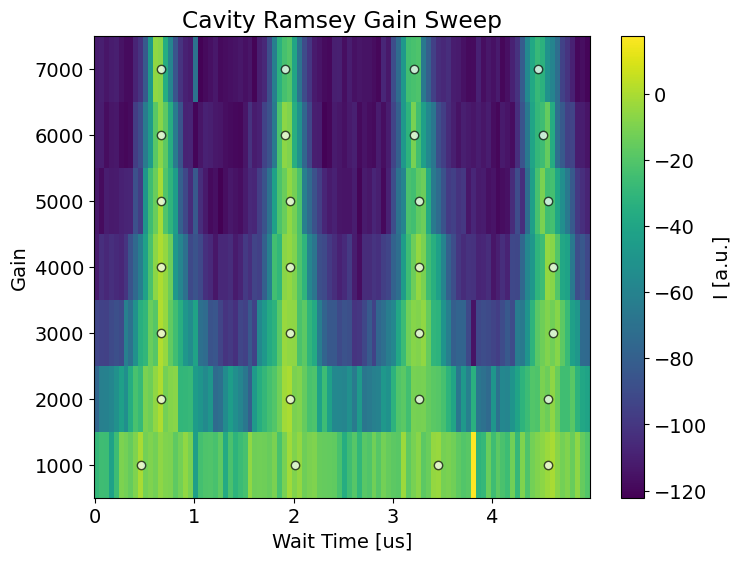

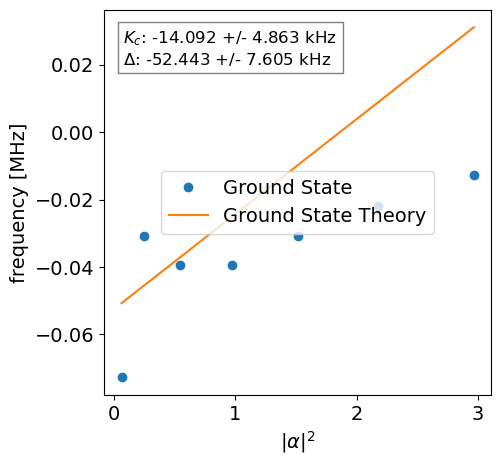

In [42]:
cavity_ramsey_sweep.analyze()
cavity_ramsey_sweep.display()
delta_g = cavity_ramsey_sweep.data['detuning_g']

# config_thisrun.device.manipulate.f_ge[0] -= delta_g
# print(f"Updated f_ge frequency: {config_thisrun.device.manipulate.f_ge[0]} MHz")

## with kerr

In [20]:
from multimode_expts.experiments.qsim.kerr import KerrCavityRamseyProgram

In [21]:
def do_kerr_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,           # start delay
    step=0.02,            # step size
    expts=100,            # number of experiments
    ramsey_freq=3.7,      # Ramsey frequency
    kerr_gain=2000,
    kerr_detune=-10,
    reps=100,              # repetitions
    rounds=1,             # rounds
    qubits=[0],           # qubits
    checkEF=False,        # check EF
    f0g1_cavity=0,        # f0g1 cavity
    init_gf=False,        # initialize gf
    active_reset=False,   # active reset
    man_reset=True,       # manipulate reset
    storage_reset=True,   # storage reset
    user_defined_pulse=None, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
    parity_meas=True,     # parity measurement
    man_mode_no=1,            
    storage_ramsey=[False, 2, True], # storage Ramsey
    man_ramsey=None,      # manipulate Ramsey
    coupler_ramsey=False, # coupler Ramsey
    custom_coupler_pulse=None, # custom coupler pulse
    echoes=[False, 0],    # echoes
    prepulse=False,       # prepulse
    postpulse=False,      # postpulse
    gate_based=False,     # gate based
    pre_sweep_pulse=None, # pre sweep pulse
    post_sweep_pulse=None,# post sweep pulse
    prep_e_first = True,
    relax_delay=2500      # relax delay
):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    if user_defined_pulse is None:
        user_defined_pulse = [True,
                              config_thisrun.device.manipulate.f_ge[man_mode_no-1], 
                              2000, # will be overridden if expt_params.displace_gain is set! 
                              config_thisrun.device.manipulate.displace_sigma[man_mode_no-1], 
                              0,
                              4]
        
    #[on/off, freq, gain, sigma (mus), length, channel] 
    if man_ramsey is None:
        man_ramsey = [False, man_mode_no -1]
    if custom_coupler_pulse is None:
        custom_coupler_pulse = [[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]]
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []
    if post_sweep_pulse is None:
        post_sweep_pulse = []

    expt_params = dict(
        start=start,                    # start delay
        step=step,                      # step size
        expts=expts,                    # number of experiments
        ramsey_freq=ramsey_freq,        # Ramsey frequency
        reps=reps,                      # repetitions
        rounds=rounds,                  # rounds
        qubits=qubits,                  # qubits
        checkEF=checkEF,                # check EF
        f0g1_cavity=f0g1_cavity,        # f0g1 cavity
        init_gf=init_gf,                # initialize gf
        active_reset=active_reset,      # active reset
        man_reset=man_reset,            # manipulate reset
        storage_reset=storage_reset,    # storage reset
        user_defined_pulse=user_defined_pulse, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
        parity_meas=parity_meas,        # parity measurement
        man_mode_no=man_mode_no,                # manipulate index
        storage_ramsey=storage_ramsey,  # storage Ramsey
        man_ramsey=man_ramsey,          # manipulate Ramsey
        coupler_ramsey=coupler_ramsey,  # coupler Ramsey
        custom_coupler_pulse=custom_coupler_pulse, # custom coupler pulse
        echoes=echoes,                  # echoes
        prepulse=prepulse,              # prepulse
        postpulse=postpulse,            # postpulse
        gate_based=gate_based,          # gate based
        pre_sweep_pulse=pre_sweep_pulse,# pre sweep pulse
        post_sweep_pulse=post_sweep_pulse, # post sweep pulse
        prep_e_first=prep_e_first,  # prepare e first
        normalize = False,
        kerr_gain = kerr_gain,
        kerr_detune = kerr_detune,
        # kerr_length = 10,
        # swept_params = ['kerr_length'],
        swept_params = ['displace_gain', 'kerr_length'],
        kerr_lengths = np.linspace(0.007,3,101).tolist(),
        displace_gains = np.arange(2000,8001,1000).tolist(),
        # displace_gain = 5000,
        drive_coupler=True,
        ds_thisrun = ds_storage,
    )

    cavity_ramsey = QsimBaseExperiment(
    soccfg=soc,
    path=expt_path,
    prefix=f"KerrRamseyExperiment",
    config_file=config_path,
    expt_params=expt_params,
    program=KerrCavityRamseyProgram,
    progress=True)

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    cavity_ramsey.cfg.expt = expt_params

    cavity_ramsey.cfg.device.readout.relax_delay = [relax_delay]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey


In [22]:
kerr_ramsey = do_kerr_ramsey(
    config_thisrun=config_thisrun,
    expt_path=expt_path,
    config_path=config_file,
    ramsey_freq=1,
    kerr_gain=0,
    kerr_detune=-30,
    # step = 0.04, 
    # expts = 150, 
    reps = 100,
    prep_e_first=False,
    # active_reset=True,
    # man_reset=True,
    # relax_delay=300,
)

  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00362_KerrRamseyExperiment.h5


In [35]:
for kerr_detune in [-30,-20,-10,-5,0,5,10,20,30]:
    print(f'detune {kerr_detune}')
    for kerr_gain in range(200,2901,300):
        # print(f"Running Kerr Ramsey with kerr_gain = {kerr_gain}")
        kerr_ramsey = do_kerr_ramsey(
            config_thisrun=config_thisrun,
            expt_path=expt_path,
            config_path=config_file,
            ramsey_freq=1.5,
            kerr_gain=kerr_gain,
            kerr_detune=kerr_detune,
            # step = 0.04, 
            # expts = 150, 
            reps = 100,
            prep_e_first=False,
            # active_reset=True,
            # man_reset=True,
            # relax_delay=300,
        )

detune -30


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00272_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00273_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00274_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00275_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00276_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00277_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00278_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00279_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00280_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00281_KerrRamseyExperiment.h5
detune -20


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00282_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00283_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00284_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00285_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00286_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00287_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00288_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00289_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00290_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00291_KerrRamseyExperiment.h5
detune -10


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00292_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00293_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00294_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00295_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00296_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00297_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00298_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00299_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00300_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00301_KerrRamseyExperiment.h5
detune -5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00302_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00303_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00304_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00305_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00306_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00307_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00308_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00309_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00310_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00311_KerrRamseyExperiment.h5
detune 0


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00312_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00313_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00314_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00315_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00316_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00317_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00318_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00319_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00320_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00321_KerrRamseyExperiment.h5
detune 5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00322_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00323_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00324_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00325_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00326_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00327_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00328_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00329_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00330_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00331_KerrRamseyExperiment.h5
detune 10


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00332_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00333_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00334_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00335_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00336_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00337_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00338_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00339_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00340_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00341_KerrRamseyExperiment.h5
detune 20


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00342_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00343_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00344_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00345_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00346_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00347_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00348_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00349_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00350_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00351_KerrRamseyExperiment.h5
detune 30


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00352_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00353_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00354_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00355_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00356_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00357_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00358_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00359_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00360_KerrRamseyExperiment.h5


  0%|          | 0/7 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00361_KerrRamseyExperiment.h5


In [36]:
def get_dump_mode_parameters(ds_thisrun, config_thisrun, man_mode_no, dump_mode_no):
    """
    Get pulse parameters for a given storage mode. 
    Also returns prepulse and postpulse (single photon prep and meas for ge meas)

    Args:
        ds_thisrun: Dataset object for managing frequency data.
        config_thisrun: Configuration dictionary for the current run.
        man_mode_no: Manipulation mode number.
        dump_mode_no: Dump mode number.

    Returns:
        A tuple containing freq, gain, ch, prepulse, and postpulse.
    """
    stor_name = 'M' + str(man_mode_no) + '-D' + str(dump_mode_no)
    freq = ds_thisrun.get_freq(stor_name)
    gain = ds_thisrun.get_gain(stor_name)
    pi_len = ds_thisrun.get_pi(stor_name)
    h_pi_len = ds_thisrun.get_h_pi(stor_name)
    ch = 'low' if freq < 1000 else 'high'

    from MM_dual_rail_base import MM_dual_rail_base
    mm_base_dummy = MM_dual_rail_base(config_thisrun, soccfg=soc)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    prepulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()
    postpulse = mm_base_dummy.get_prepulse_creator(prep_man_pi[-1:-3:-1]).pulse.tolist() # for ge meas, only do f0g1 and ef pi

    prepulse_overwrite = [['multiphoton', 'g0-e0', 'pi', 0],
                            ['multiphoton', 'e0-f0', 'pi', 0],
                            ['multiphoton', 'f0-g1', 'pi', 0]
                        ]
    postpulse_overwrite = [ ['multiphoton', 'f0-g1', 'pi', 0],
                            ['multiphoton', 'e0-f0', 'pi', 0]]
    prepulse = mm_base_dummy.get_prepulse_creator(prepulse_overwrite).pulse.tolist()
    postpulse = mm_base_dummy.get_prepulse_creator(postpulse_overwrite).pulse.tolist()

    return freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse


def do_dump_spectroscopy(config_thisrun, 
                         ds_thisrun, 
                         expt_path, 
                         config_path, 
                         man_mode_no = 1, 
                         dump_no = 1,
                         flux_gain = 5000,
                         flux_length = 1):
    """
    Run the Flux Spectroscopy F0g1 Experiment.

    This function performs a flux spectroscopy experiment to measure the transition frequency
    between the f0 and g1 states of a qubit. It configures the experiment parameters, executes
    the experiment, and saves the results.

    Args:
        config_thisrun (AttrDict): Configuration dictionary for the current run.
        ds_thisrun (dataset.storage_man_swap_dataset): Dataset object for managing frequency data.
        expt_path (str): Path to save the experiment results.
        config_path (str): Path to the configuration file.
        man_mode_no (int, optional): Manipulation mode number (default is 1).
        dump_no (int, optional): Storage mode number (default is 1).

    Returns:
        FluxSpectroscopyF0g1Experiment: The experiment object containing the results.
    """
    flux_spec = meas.single_qubit.rf_flux_spectroscopy_f0g1.FluxSpectroscopyF0g1Experiment(
        soccfg=soc, path=expt_path, prefix='FluxSpectroscopyF0g1Experiment', config_file=config_path
    )

    flux_spec.cfg = AttrDict(deepcopy(config_thisrun))

    freq, gain, pi_len, h_pi_len, ch, prepulse, postpulse = get_dump_mode_parameters(ds_thisrun, config_thisrun,
                                                                      man_mode_no, dump_no)

    freq_start = 650 #2350 
    freq_stop = 950 #2400
    bw = freq_stop - freq_start
    expts = 600
    step = bw/expts

    flux_spec.cfg.expt = dict(
        # start=freq - 100,  # Start RF frequency [MHz]
        start=freq_start,  # Start RF frequency [MHz]
        step=step,  # Step size [MHz]
        expts=expts,  # Number of experiments
        reps=200,  # Number of averages per point
        qubit=[0],
        flux_drive=[ch, 1, flux_gain, flux_length],  # RF flux modulation parameters [low/high (ch), freq (will be overwritten), gain, length(us)]
        prepulse=True,
        postpulse=True,
        active_reset=True,
        man_reset=False,
        storage_reset=False,
        pre_sweep_pulse= prepulse,
        post_sweep_pulse= postpulse,
    )

    flux_spec.cfg.device.readout.relax_delay = [200]  # Wait time between experiments [us]
    flux_spec.go(analyze=False, display=False, progress=True, save=True)
    return flux_spec


def update_dump_spectroscopy(flux_spec, ds_thisrun, man_mode_no = 1, dump_no = 1):
    """Update the configuration based on Flux Spectroscopy F0g1 experiment results."""
    # Update the dataset with the new frequency
    ds_thisrun.update_freq('M' + str(man_mode_no) + '-D' + str(dump_no), flux_spec.data['fit'][2])
    print(f"Updated frequency for M{man_mode_no}-D{dump_no}: {flux_spec.data['fit'][2]}")


In [37]:
spec = do_dump_spectroscopy(config_thisrun, ds_thisrun, expt_path, config_path, 
                            man_mode_no=1, dump_no=1,
                            flux_gain=200, flux_length=10)
spec = do_dump_spectroscopy(config_thisrun, ds_thisrun, expt_path, config_path, 
                            man_mode_no=1, dump_no=1,
                            flux_gain=100, flux_length=10)
spec = do_dump_spectroscopy(config_thisrun, ds_thisrun, expt_path, config_path, 
                            man_mode_no=1, dump_no=1,
                            flux_gain=2000, flux_length=10)
# analyze_and_display_stor_spectroscopy(spec)
# update_dump_spectroscopy(spec, ds_thisrun, 1, 1)
spec.analyze(fit=True)
spec.display()

IndexError: index 0 is out of bounds for axis 0 with size 0

## Qubit rabi

In [20]:
from multimode_expts.experiments.single_qubit.amplitude_rabi import AmplitudeRabiExperiment, AmplitudeRabiChevronExperiment
from multimode_expts.experiments.single_qubit.length_rabi import LengthRabiExperiment

  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00003_LengthRabiExperiment.h5
Decay from avgi [us] 6.2438527410153455
Pi length from avgi data [us]: 0.031232802297960428
	Pi/2 length from avgi data [us]: 0.015616401148980214

Decay from avgq [us] 2.236423934894977
Pi length from avgq data [us]: 0.030617603252438664
Pi/2 length from avgq data [us]: 0.015308801626219332


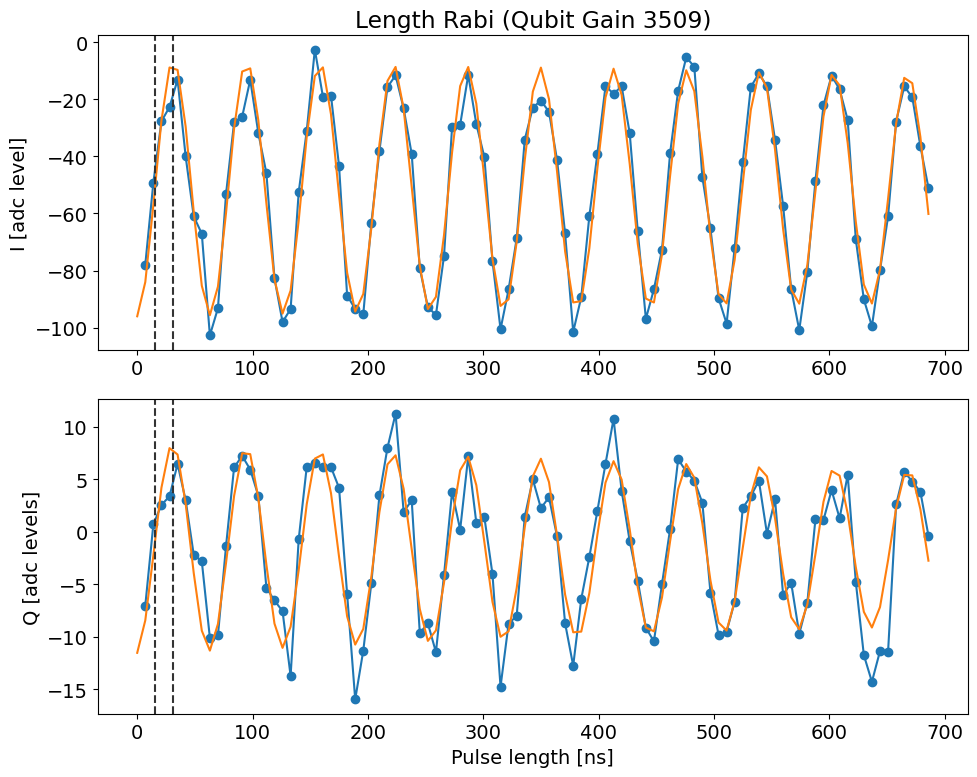

In [21]:
rabi = LengthRabiExperiment(
        soccfg=soc, 
        path=expt_path, 
        prefix='LengthRabiExperiment', 
        config_file=config_path
    )

rabi.cfg = AttrDict(deepcopy(config_thisrun))
rabi.cfg.expt = dict(
    start=0,                    # start delay
    step=0.007,                      # step size
    expts=100,                    # number of experiments
    reps=100,                      # repetitions
    rounds=1,                  # rounds
    qubits=[0],                  # qubits
    checkEF=False,                # check EF
    checkZZ=False,               # check ZZ
    pulse_type='const',        # pulse type
    repeat_time = 1,
    pre_pulse=False,       # pre pulse
    post_pulse=False,            # post pulse
)

rabi.cfg.device.readout.relax_delay = [500]
rabi.go(analyze=True, display=True, progress=True, save=True)

  0%|          | 0/21 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250812_qsim\data\00002_AmplitudeRabiChevronExperiment.h5


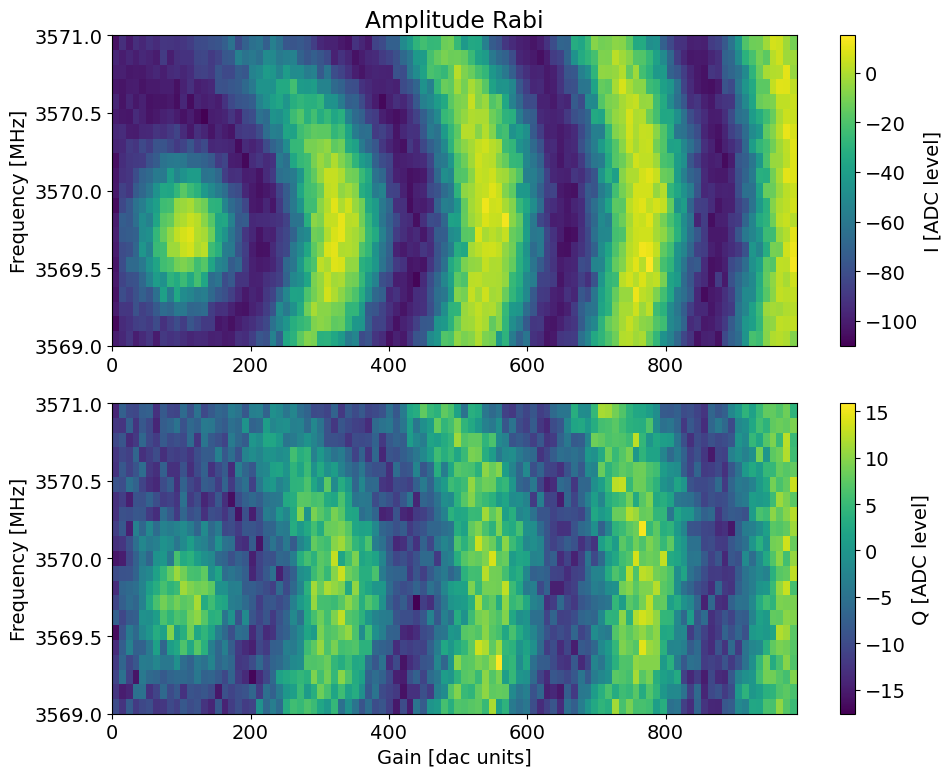

In [37]:
rabi = AmplitudeRabiChevronExperiment(
        soccfg=soc, 
        path=expt_path, 
        prefix='AmplitudeRabiChevronExperiment', 
        config_file=config_path
    )

rabi.cfg = AttrDict(deepcopy(config_thisrun))
rabi.cfg.expt = dict(
    start_f=3569,                # start frequency
    step_f=0.1,                 # f step size
    expts_f=21,                 # number of experiments
    start_gain=0,                    # start delay
    step_gain=10,                      # step size
    expts_gain=100,                    # number of experiments
    reps=100,                      # repetitions
    rounds=1,                  # rounds
    flat_length=0,
    sigma_test=1,
    user_defined_freq=[False,0],  # [on/off, freq]
    qubits=[0],                  # qubits
    checkEF=False,                # check EF
    checkZZ=False,                # check ZZ
    pulse_type='const',        # pulse type
    prepulse=False,       # pre pulse
    postpulse=False,            # post pulse
    pulse_ge_init=False,
    pulse_ge_after=False,
)

rabi.cfg.device.readout.relax_delay = [1500]
rabi.go(analyze=True, display=True, progress=True, save=True)

# Ramp current

In [ ]:
# coupler
dcflux = YokogawaGS200(address="192.168.137.148")
dcflux.set_output(True)
dcflux.set_mode('current')
dcflux.ramp_current(0.00032, sweeprate=0.0001)

In [ ]:
# jpa
dcflux = YokogawaGS200(address="192.168.137.149")
dcflux.set_output(True)
dcflux.set_mode('current')
dcflux.ramp_current(0.000, sweeprate=0.002)

In [36]:
# jpa
dcflux = YokogawaGS200(address="192.168.137.149")
dcflux.ramp_current(-0.00454, sweeprate=0.002)

In [48]:
dcflux = YokogawaGS200(address="192.168.137.148")
dcflux.ramp_current(0.28e-3, sweeprate=1e-4)

## Manipulate parity spectroscopy


In [23]:
def do_parity_freq_experiment(
    start=4960,
    stop=5020,
    step=0.60,
    reps=100,
    rounds=1,
    qubit=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=20,
    manipulate_no=1,
    displace=(True, 0.1, 1000),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500
):
    """
    Run the Parity Frequency Experiment with configurable parameters.
    """
    
    expt_cfg = {
        'start': start,
        'stop': stop,
        'step': step,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubit,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'span': span,
        'manipulate': manipulate_no,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }
    # Example usage of relax_delay in experiment config:
    parity_freq_exp = meas.single_qubit.parity_freq.ParityFreqExperiment(
        soccfg=soc, path=expt_path, 
        prefix='ParityFreqExperiment', config_file=config_file
    )
    parity_freq_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_freq_exp.cfg.expt = expt_cfg
    parity_freq_exp.cfg.device.readout.relax_delay = [relax_delay]
    parity_freq_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_freq_exp


In [24]:
parity_freq_exp = do_parity_freq_experiment()

  0%|          | 0/100 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00095_ParityFreqExperiment.h5


Found peak in amps at [MHz] 4979.615462461978, HWHM 1.5240490397392101
Found peak in I at [MHz] 4979.549216957419, HWHM 2.2344682216010305
Found peak in Q at [MHz] 4983.343914390137, HWHM 13.55073301977434


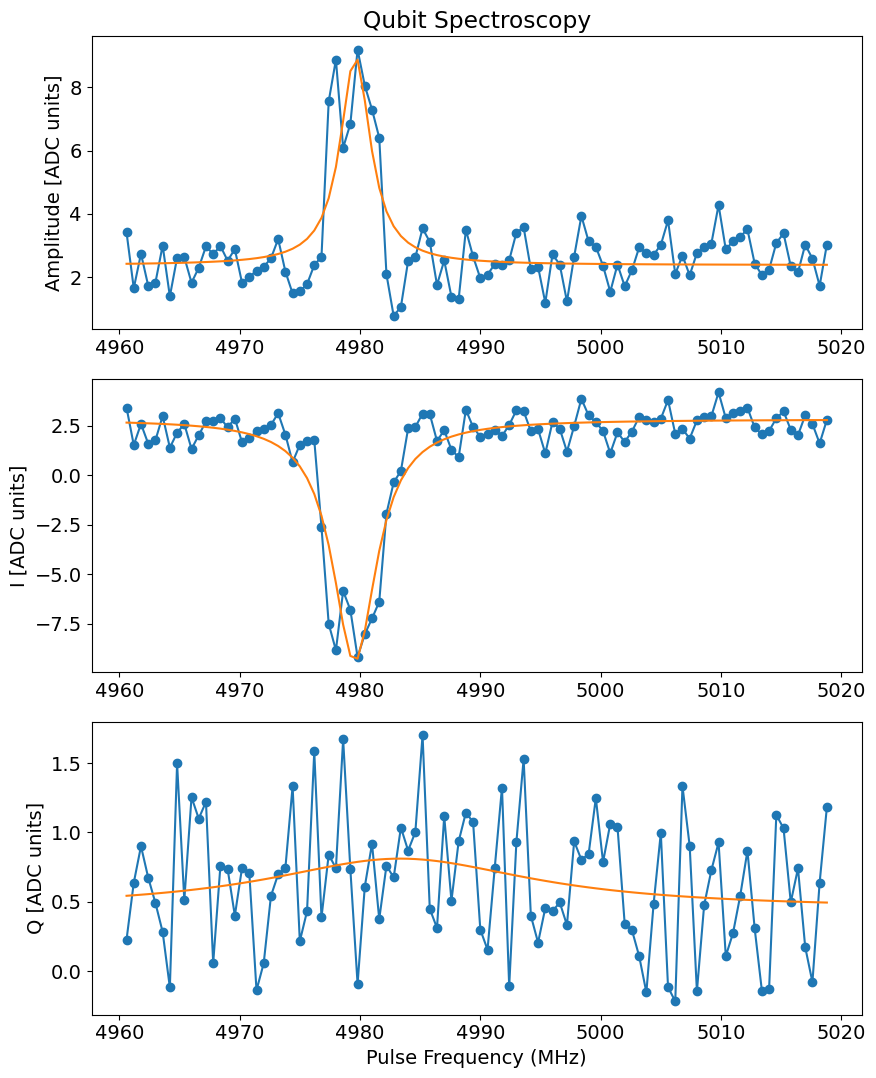

In [28]:
from fit_display_classes import Spectroscopy
spec = Spectroscopy(parity_freq_exp.data, config=parity_freq_exp.cfg)
spec.analyze()
spec.display()

In [23]:
config_thisrun.device.manipulate.f_ge[0] = spec.data['fit_avgi'][2]

## Gain to alpha

In [29]:
def do_parity_gain_experiment(
    config_thisrun,
    expt_path,
    config_path,
    start=0,
    step=100,
    expts=40,
    reps=250,
    rounds=1,
    qubit=0,
    qubits=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=1000,
    singleshot_active_reset=False,
    singleshot_man_reset=True,
    singleshot_storage_reset=True,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    span=1000,
    prep_e=False,
    manipulate=1,
    displace=(True, 0.05), # [enable, sigma] (gaussian length is 4sigma)
    const_pulse=(False, 1), # [enable, length]
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500, 
    pulse_correction=False
):
    """
    Run the Parity Gain Experiment with configurable parameters.
    """
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubit': qubit,
        'qubits': qubits,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'singleshot_active_reset': singleshot_active_reset,
        'singleshot_man_reset': singleshot_man_reset,
        'singleshot_storage_reset': singleshot_storage_reset,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'span': span,
        'prep_e': prep_e,
        'manipulate': manipulate,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pulse_correction': pulse_correction
    }
    parity_gain_exp = meas.single_qubit.parity_gain.ParityGainExperiment(
        soccfg=soc, path=expt_path, prefix='ParityGainExperiment', config_file=config_path
    )
    parity_gain_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_gain_exp.cfg.expt = expt_cfg
    parity_gain_exp.cfg.device.readout.relax_delay = [relax_delay]
    
    parity_gain_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_gain_exp


4979.50248109926
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

4979.50248109926
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00331_ParityGainExperiment.h5
Gain to Alpha Conversion Factor: 0.0006606564470537082


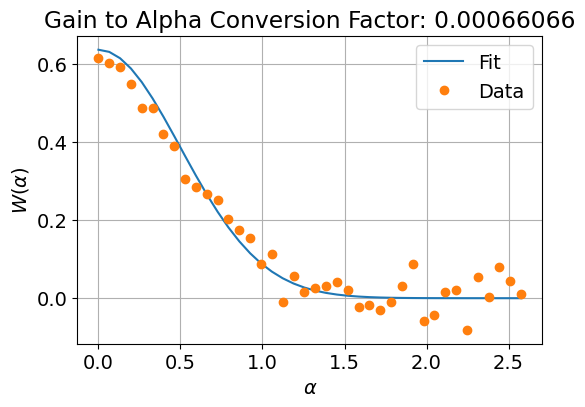

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-21_14-06-49_Gain_to_Alpha_Conversion_Factor_0.00066066.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-21.md
alpha = 1 requires gain of : 1513.64601747


{'xpts': array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
        2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
        3300, 3400, 3500, 3600, 3700, 3800, 3900,    0,  100,  200,  300,
         400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400,
        1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500,
        2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600,
        3700, 3800, 3900]),
 'avgi': array([-19.67612554, -19.27963203, -19.61218615, -18.78654762,
        -17.2320671 , -16.32030303, -16.19962121, -16.01557359,
        -13.90439394, -13.85480519, -13.16258658, -13.53778139,
        -12.42669913, -11.36353896, -11.75844156, -10.27902597,
         -9.75880952,  -8.60227273,  -9.52790043,  -8.37634199,
         -9.70314935,  -9.29048701,  -9.54634199,  -7.76404762,
         -6.67811688,  -9.18925325,  -7.50772727,  -8.

In [30]:
parity_gain_expt = do_parity_gain_experiment(
    config_thisrun=config_thisrun,
    expt_path=expt_path,
    config_path=config_file,
    pulse_correction=True,
    reps=200,
)

parity_gain_expt.analyze()

In [26]:
#update device
gain_to_alpha = parity_gain_expt.data['gain_to_alpha']
print(f'Gain to alpha: {gain_to_alpha}')
config_thisrun.device.manipulate.gain_to_alpha[0] = gain_to_alpha

Gain to alpha: 0.00026453214215320896


### monitoring

Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00228_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00026365685319433124
alpha = 1 requires gain of : 3792.80867493
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00229_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002451014481497251
alpha = 1 requires gain of : 4079.94325431
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00230_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002530172611243222
alpha = 1 requires gain of : 3952.29952121
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00231_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002573498371861702
alpha = 1 requires gain of : 3885.76115273
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00232_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002507914340076773
alpha = 1 requires gain of : 3987.37701691
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00233_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002595156748112894
alpha = 1 requires gain of : 3853.33179095
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00234_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025722770563805413
alpha = 1 requires gain of : 3887.60610961
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00235_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002486333068686133
alpha = 1 requires gain of : 4021.98728961
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00236_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024314762692875184
alpha = 1 requires gain of : 4112.72778037
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00237_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002476416699132558
alpha = 1 requires gain of : 4038.09262129
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00238_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024391739563501652
alpha = 1 requires gain of : 4099.74859479
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00239_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00026330412675771474
alpha = 1 requires gain of : 3797.88958234
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00240_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025144816709965224
alpha = 1 requires gain of : 3976.96277342
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00241_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024580419693645626
alpha = 1 requires gain of : 4068.27878638
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00242_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002586429857247679
alpha = 1 requires gain of : 3866.33334439
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00243_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024816249407045806
alpha = 1 requires gain of : 4029.61778630
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00244_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024126394534227473
alpha = 1 requires gain of : 4144.83812980
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00245_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002572327710270661
alpha = 1 requires gain of : 3887.52955546
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00246_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002626375860256172
alpha = 1 requires gain of : 3807.52814223
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00247_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00023598038813486908
alpha = 1 requires gain of : 4237.64028826
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00248_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002490609162189629
alpha = 1 requires gain of : 4015.08199352
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00249_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024906714481459744
alpha = 1 requires gain of : 4014.98158557
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00250_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002649615453324124
alpha = 1 requires gain of : 3774.13257741
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00251_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002519337604669183
alpha = 1 requires gain of : 3969.29731905
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00252_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024747491935698775
alpha = 1 requires gain of : 4040.81352001
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00253_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002606288325304501
alpha = 1 requires gain of : 3836.87403382
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00254_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002488583161988746
alpha = 1 requires gain of : 4018.35074381
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00255_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024826432411174747
alpha = 1 requires gain of : 4027.96496669
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00256_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002450498525768496
alpha = 1 requires gain of : 4080.80229180
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00257_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002566933059655394
alpha = 1 requires gain of : 3895.69956349
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00258_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.000253512853785232
alpha = 1 requires gain of : 3944.57316491
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00259_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002595155034724477
alpha = 1 requires gain of : 3853.33433502
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00260_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.000245755077366849
alpha = 1 requires gain of : 4069.09192158
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00261_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002631301176088885
alpha = 1 requires gain of : 3800.40114407
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00262_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002545491808734575
alpha = 1 requires gain of : 3928.51391848
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00263_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002595105875388502
alpha = 1 requires gain of : 3853.40732910
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00264_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002623776358398284
alpha = 1 requires gain of : 3811.30044411
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00265_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025723221981019476
alpha = 1 requires gain of : 3887.53788595
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00266_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00023829754455974357
alpha = 1 requires gain of : 4196.43434366
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00267_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002531773055593601
alpha = 1 requires gain of : 3949.80110003
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00268_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024763257920545163
alpha = 1 requires gain of : 4038.24086156
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00269_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024885595716331164
alpha = 1 requires gain of : 4018.38883585
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00270_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002517878930290656
alpha = 1 requires gain of : 3971.59683879
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00271_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024501342545987196
alpha = 1 requires gain of : 4081.40900085
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00272_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025549138291831045
alpha = 1 requires gain of : 3914.02633066
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00273_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024993461869218705
alpha = 1 requires gain of : 4001.04637458
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00274_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002457993427686567
alpha = 1 requires gain of : 4068.35912878
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00275_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002613167809507376
alpha = 1 requires gain of : 3826.77299315
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00276_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025804216887231874
alpha = 1 requires gain of : 3875.33558709
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00277_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002603572056234406
alpha = 1 requires gain of : 3840.87698900
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00278_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002517889479507536
alpha = 1 requires gain of : 3971.58019897
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00279_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002450541328050775
alpha = 1 requires gain of : 4080.73101463
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00280_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002631273754086596
alpha = 1 requires gain of : 3800.44075021
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00281_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002511707119875751
alpha = 1 requires gain of : 3981.35591561
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00282_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024381927587200966
alpha = 1 requires gain of : 4101.39844942
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00283_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002612758099517713
alpha = 1 requires gain of : 3827.37307439
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00284_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025666407611901927
alpha = 1 requires gain of : 3896.14322004
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00285_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002535141295923207
alpha = 1 requires gain of : 3944.55331388
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00286_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002474257987119814
alpha = 1 requires gain of : 4041.61572967
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00287_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002504427511707361
alpha = 1 requires gain of : 3992.92850492
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00288_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025266529575512705
alpha = 1 requires gain of : 3957.80511531
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00289_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00026718984493774475
alpha = 1 requires gain of : 3742.65721152
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00290_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002529038481644684
alpha = 1 requires gain of : 3954.07190226
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00291_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002514461985416554
alpha = 1 requires gain of : 3976.99390884
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00292_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024974105630986096
alpha = 1 requires gain of : 4004.14739481
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00293_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025050603531397923
alpha = 1 requires gain of : 3991.91979046
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00294_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002438379733486951
alpha = 1 requires gain of : 4101.08395451
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00295_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002469798604620594
alpha = 1 requires gain of : 4048.91313052
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00296_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024510921113173896
alpha = 1 requires gain of : 4079.81403629
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00297_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024953576648808297
alpha = 1 requires gain of : 4007.44155467
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00298_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024371304456412325
alpha = 1 requires gain of : 4103.18619501
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00299_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002488837247091169
alpha = 1 requires gain of : 4017.94051085
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00300_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002609748984797691
alpha = 1 requires gain of : 3831.78614428
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00301_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00026901763505753805
alpha = 1 requires gain of : 3717.22842551
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00302_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024815551762711273
alpha = 1 requires gain of : 4029.73107172
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00303_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024816302386944193
alpha = 1 requires gain of : 4029.60918354
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00304_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002431086713694711
alpha = 1 requires gain of : 4113.38680092
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00305_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024570750031592943
alpha = 1 requires gain of : 4069.87983156
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00306_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00026526127726883716
alpha = 1 requires gain of : 3769.86799693
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00307_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024645392902359286
alpha = 1 requires gain of : 4057.55349067
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00308_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00026130809226449533
alpha = 1 requires gain of : 3826.90023617
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00309_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002486315755564302
alpha = 1 requires gain of : 4022.01529617
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00310_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025722853638113495
alpha = 1 requires gain of : 3887.59355423
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00311_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025454626687297166
alpha = 1 requires gain of : 3928.55889141
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00312_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002526655688536352
alpha = 1 requires gain of : 3957.80083744
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00313_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.000253392885945428
alpha = 1 requires gain of : 3946.44070716
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00314_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002530138281383116
alpha = 1 requires gain of : 3952.35314749
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00315_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002524158568583021
alpha = 1 requires gain of : 3961.71624258
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00316_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002687293655916602
alpha = 1 requires gain of : 3721.21594452
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00317_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024517483936255594
alpha = 1 requires gain of : 4078.72195450
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00318_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002675046575476996
alpha = 1 requires gain of : 3738.25266882
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00319_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002590589176662893
alpha = 1 requires gain of : 3860.12575444
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00320_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00025028017830490824
alpha = 1 requires gain of : 3995.52216549
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00321_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002419796575820243
alpha = 1 requires gain of : 4132.57878779
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00322_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00026063085690658673
alpha = 1 requires gain of : 3836.84423199
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00323_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00024232036725030354
alpha = 1 requires gain of : 4126.76825868
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00324_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002514412938187236
alpha = 1 requires gain of : 3977.07148580
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00325_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00027496666720841007
alpha = 1 requires gain of : 3636.80445398
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00326_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002491632312560154
alpha = 1 requires gain of : 4013.43326204
Pulse correction is applied
4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

4984.619558610203
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 200


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00327_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00026881234012999963
alpha = 1 requires gain of : 3720.06731356


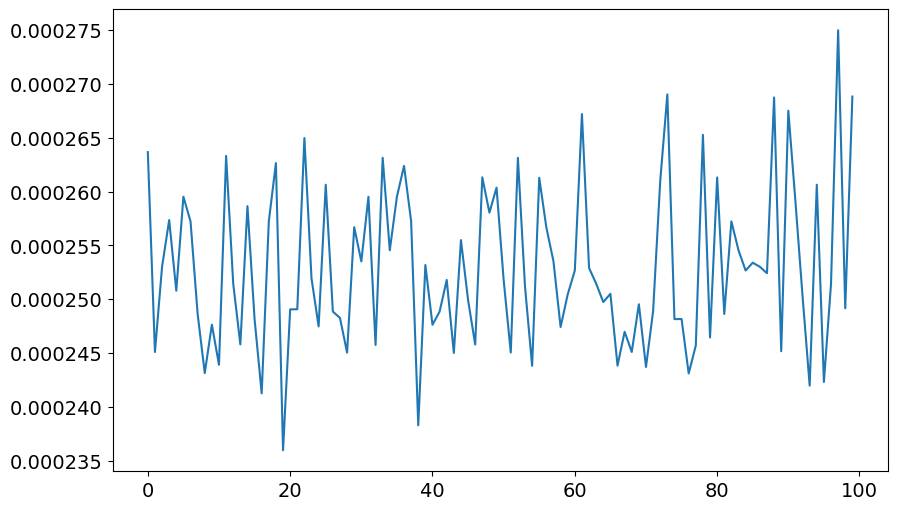

In [70]:
from time import sleep

all_gtas = []

for i in range(100):
    parity_gain_expt = do_parity_gain_experiment(
        config_thisrun=config_thisrun,
        expt_path=expt_path,
        config_path=config_file,
        pulse_correction=True,
        reps=200,
    )

    parity_gain_expt.analyze(plot=False)
    gain_to_alpha = parity_gain_expt.data['gain_to_alpha']
    all_gtas.append(gain_to_alpha)
    sleep(300)

plt.plot(all_gtas)

## nonlinearity vs flux bias

In [24]:
np.linspace(0.75e-3, 0.1e-3, 66)[:40]

array([0.00075, 0.00074, 0.00073, 0.00072, 0.00071, 0.0007 , 0.00069,
       0.00068, 0.00067, 0.00066, 0.00065, 0.00064, 0.00063, 0.00062,
       0.00061, 0.0006 , 0.00059, 0.00058, 0.00057, 0.00056, 0.00055,
       0.00054, 0.00053, 0.00052, 0.00051, 0.0005 , 0.00049, 0.00048,
       0.00047, 0.00046, 0.00045, 0.00044, 0.00043, 0.00042, 0.00041,
       0.0004 , 0.00039, 0.00038, 0.00037, 0.00036])

  0%|          | 0/100 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00075_ParityFreqExperiment.h5
Pulse correction is applied
5005.112257677008
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

5005.112257677008
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00002_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002949515473738482


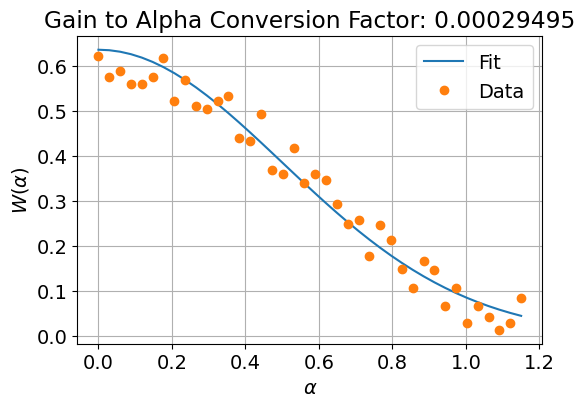

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-04_23-36-42_Gain_to_Alpha_Conversion_Factor_0.00029495.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-04.md
alpha = 1 requires gain of : 3390.38736668
Gain to alpha: 0.0002949515473738482


  0%|          | 0/16 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00123_KerrRamseyExperiment.h5


  0%|          | 0/100 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00076_ParityFreqExperiment.h5
Pulse correction is applied
5003.048330496247
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

5003.048330496247
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00003_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0003011569859539486


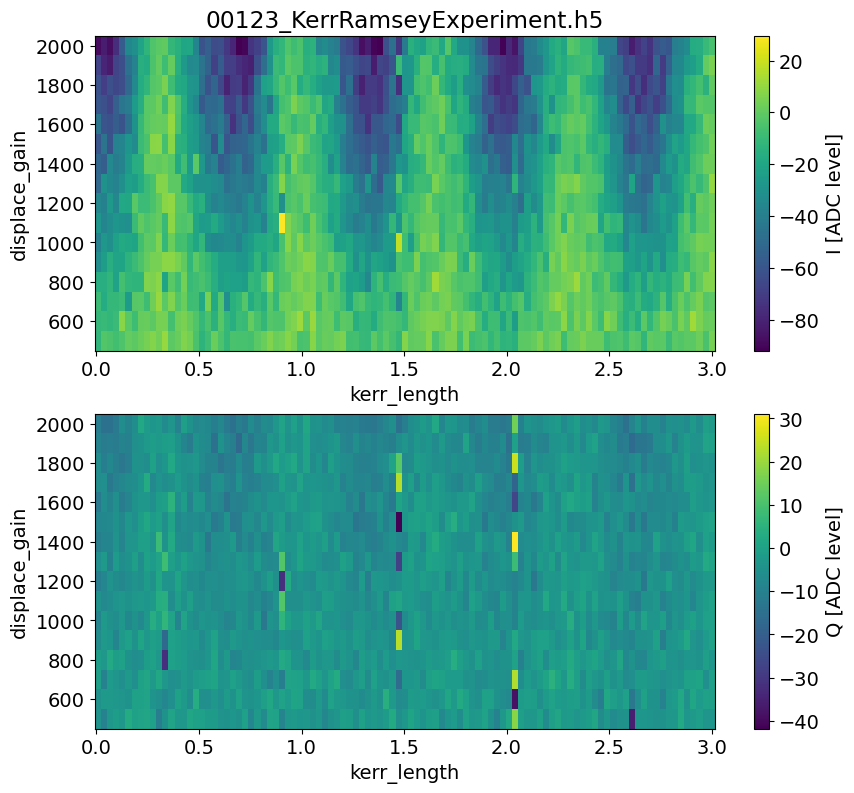

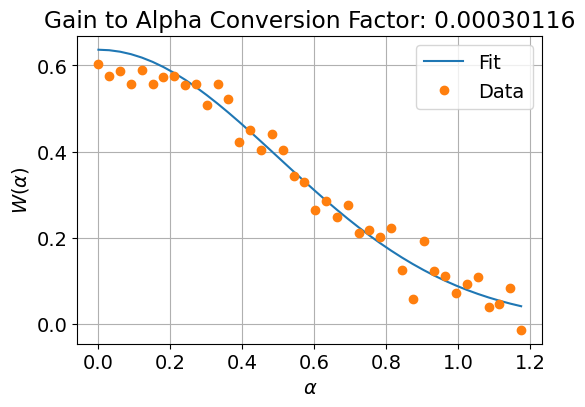

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-04_23-50-48_Gain_to_Alpha_Conversion_Factor_0.00030116.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-04.md
alpha = 1 requires gain of : 3320.52732176
Gain to alpha: 0.0003011569859539486


  0%|          | 0/16 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00124_KerrRamseyExperiment.h5


  0%|          | 0/100 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00077_ParityFreqExperiment.h5
Pulse correction is applied
5000.478613968114
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

5000.478613968114
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00004_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002814281053857867


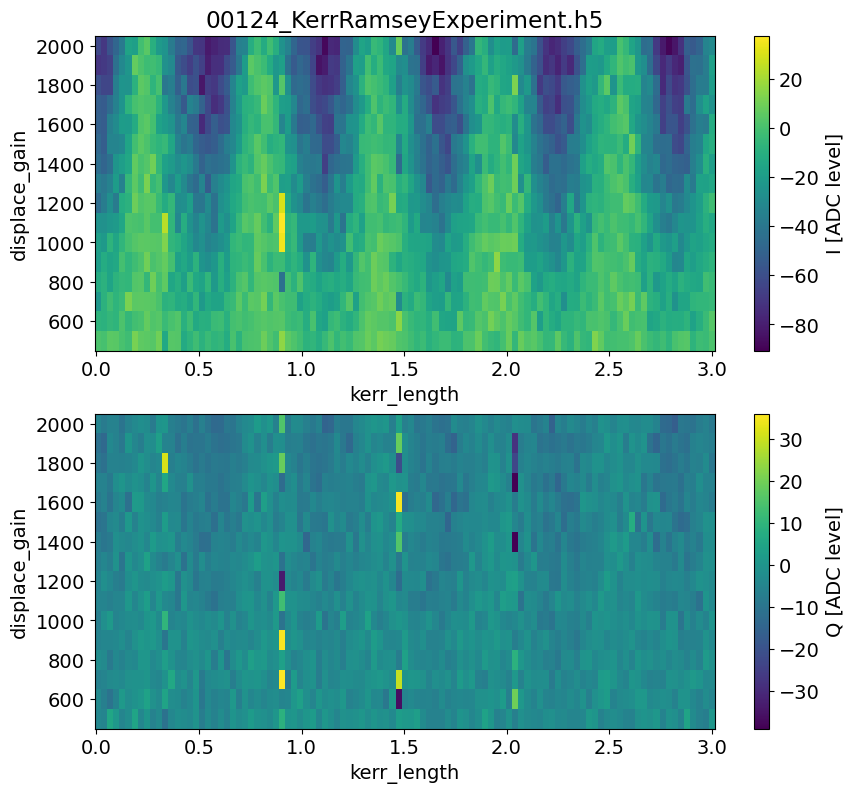

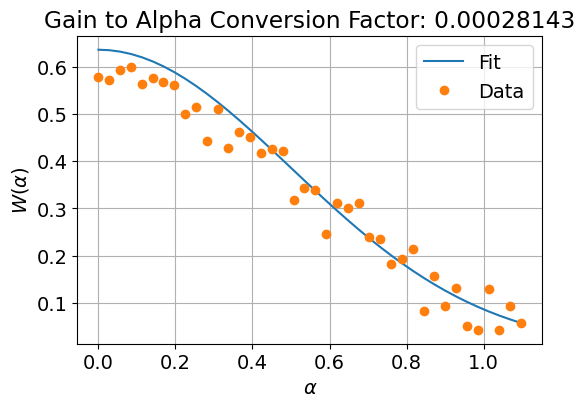

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-05_00-05-17_Gain_to_Alpha_Conversion_Factor_0.00028143.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-05.md
alpha = 1 requires gain of : 3553.30537662
Gain to alpha: 0.0002814281053857867


  0%|          | 0/16 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00125_KerrRamseyExperiment.h5


  0%|          | 0/100 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00078_ParityFreqExperiment.h5
Pulse correction is applied
4998.478183853273
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

4998.478183853273
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00005_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.000272831170696058


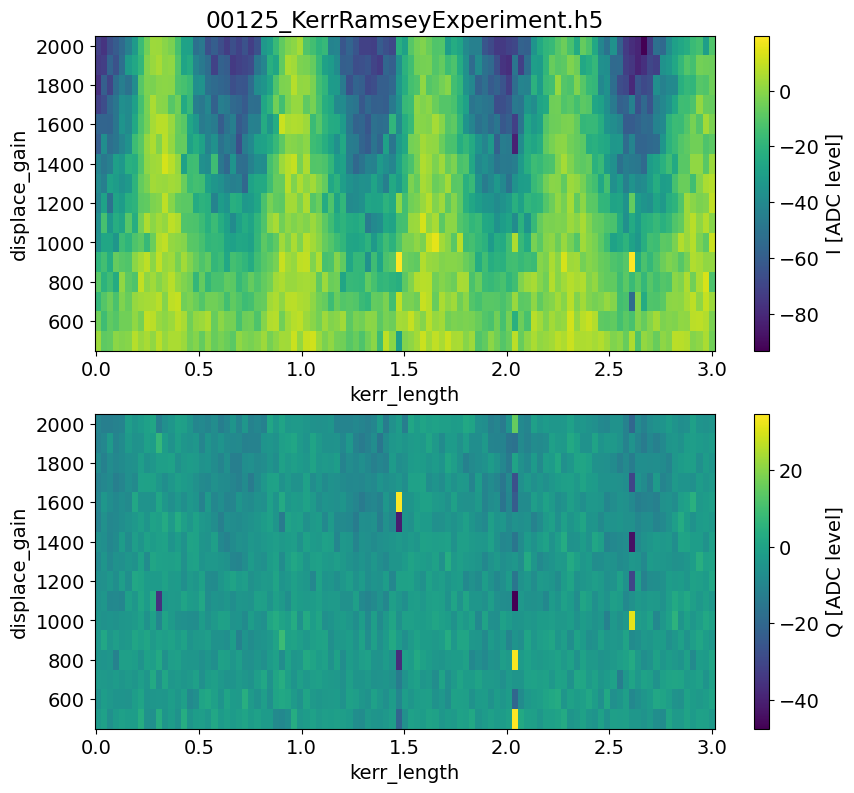

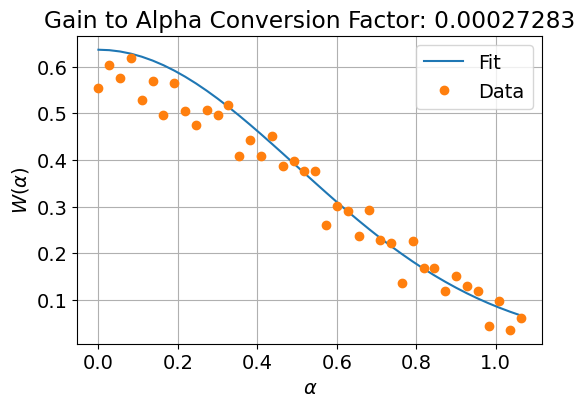

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-05_00-19-48_Gain_to_Alpha_Conversion_Factor_0.00027283.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-05.md
alpha = 1 requires gain of : 3665.27034814
Gain to alpha: 0.000272831170696058


  0%|          | 0/16 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00126_KerrRamseyExperiment.h5


  0%|          | 0/100 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00079_ParityFreqExperiment.h5
Pulse correction is applied
4995.866772755788
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

4995.866772755788
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00006_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.0002859405023926809


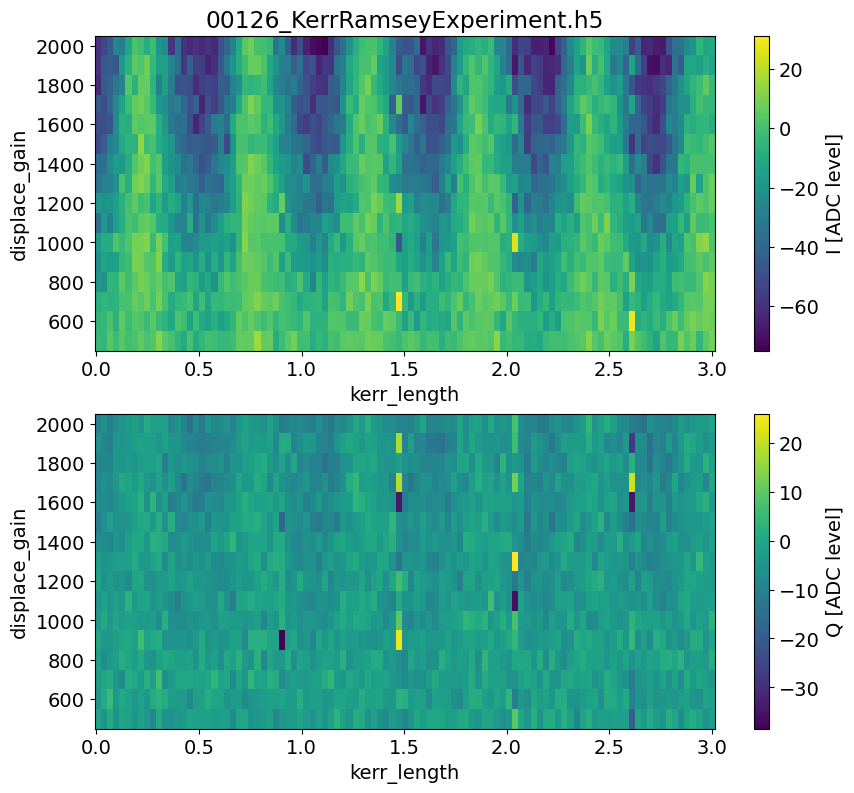

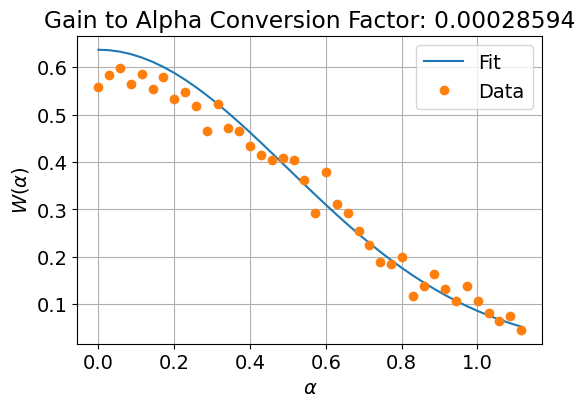

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-05_00-34-17_Gain_to_Alpha_Conversion_Factor_0.00028594.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-05.md
alpha = 1 requires gain of : 3497.23103804
Gain to alpha: 0.0002859405023926809


  0%|          | 0/16 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00127_KerrRamseyExperiment.h5


  0%|          | 0/100 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00080_ParityFreqExperiment.h5
Pulse correction is applied
4993.86402893229
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 180], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

4993.86402893229
parity pulse: [[3569.7124052990084, 3569.7124052990084, 3569.7124052990084], [1714, 0, 1714], [0.0, 1.6251210080098948, 0.0], [0, 0, 0], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.035, 0.0, 0.035]]
Updating gain register 100


  0%|          | 0/8000 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00007_ParityGainExperiment.h5
(200, 40)
(200, 40)
Gain to Alpha Conversion Factor: 0.00030102387737308194


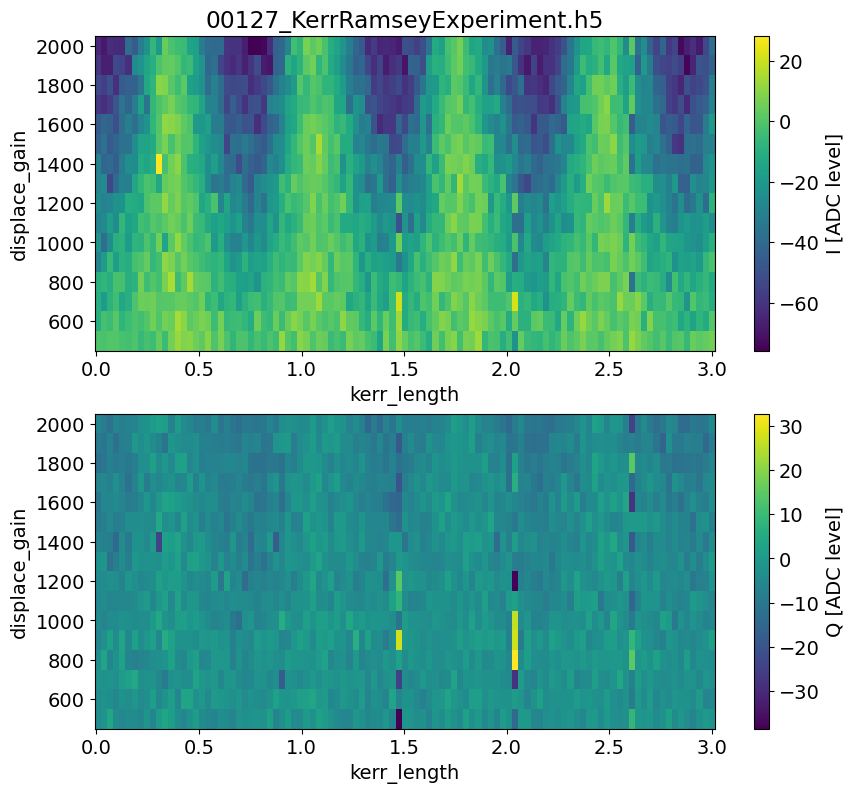

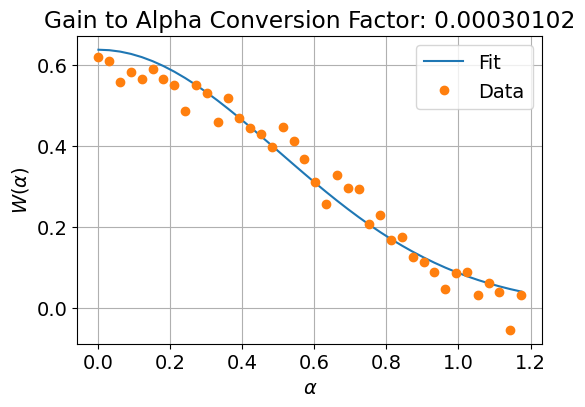

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-11-05_00-48-49_Gain_to_Alpha_Conversion_Factor_0.00030102.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-11-05.md
alpha = 1 requires gain of : 3321.99561286
Gain to alpha: 0.00030102387737308194


  0%|          | 0/16 [00:00<?, ?it/s]

Saving D:\experiments\251031_qsim\data\00128_KerrRamseyExperiment.h5


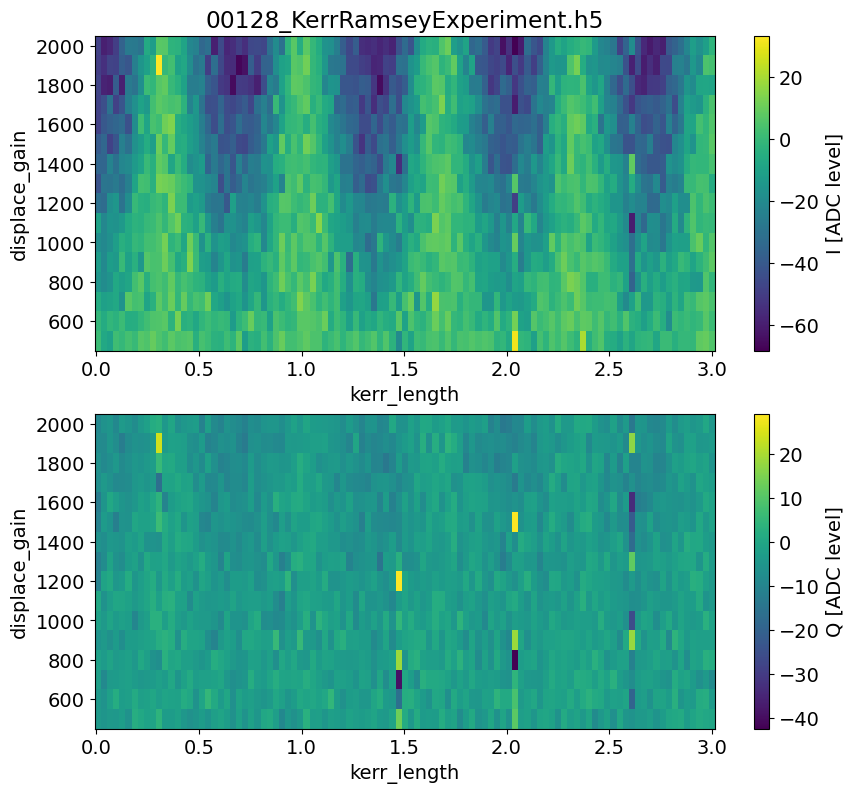

In [30]:
flux_currents = np.linspace(0, 0.15e-3, 6)
for flux_current in flux_currents:
    # set current
    dcflux.ramp_current(flux_current, sweeprate=1e-4)
    parity_freq_exp = do_parity_freq_experiment()

    # find manipulate f_ge
    spec = Spectroscopy(parity_freq_exp.data, config=parity_freq_exp.cfg)
    spec.analyze()
    config_thisrun.device.manipulate.f_ge[0] = spec.data['fit_avgi'][2]

    # calibrate parity to gain
    parity_gain_expt = do_parity_gain_experiment(
        config_thisrun=config_thisrun,
        expt_path=expt_path,
        config_path=config_file,
        pulse_correction=True,
        reps=200,
    )
    parity_gain_expt.analyze()
    gain_to_alpha = parity_gain_expt.data['gain_to_alpha']
    print(f'Gain to alpha: {gain_to_alpha}')
    config_thisrun.device.manipulate.gain_to_alpha[0] = gain_to_alpha
    
    # do cavity ramsey
    kerr_ramsey = do_kerr_ramsey(
        config_thisrun=config_thisrun,
        expt_path=expt_path,
        config_path=config_file,
        ramsey_freq=1.5,
        kerr_gain=0,
        # step = 0.04, 
        # expts = 150, 
        reps = 100,
        prep_e_first=False,
        # active_reset=True,
        # man_reset=True,
        # relax_delay=300,
    )